In [91]:
import numpy as np
from math import pi 
import scipy
from scipy import signal
from matplotlib import pyplot as plt
from scipy.io.wavfile import write

# Question 1

In [92]:
f1 = 900 #formant frequency
b1 = 200 #bandwith
fs = 16000 #sampling frequency
T = 1.0/fs #samples

## Computing the filter parameters

In [93]:
r = np.exp(-b1*pi*T)
r

0.9614911598014075

In [94]:
theta = 2*pi*f1*T
theta

0.3534291735288517

## Pole zero plot of H(z)

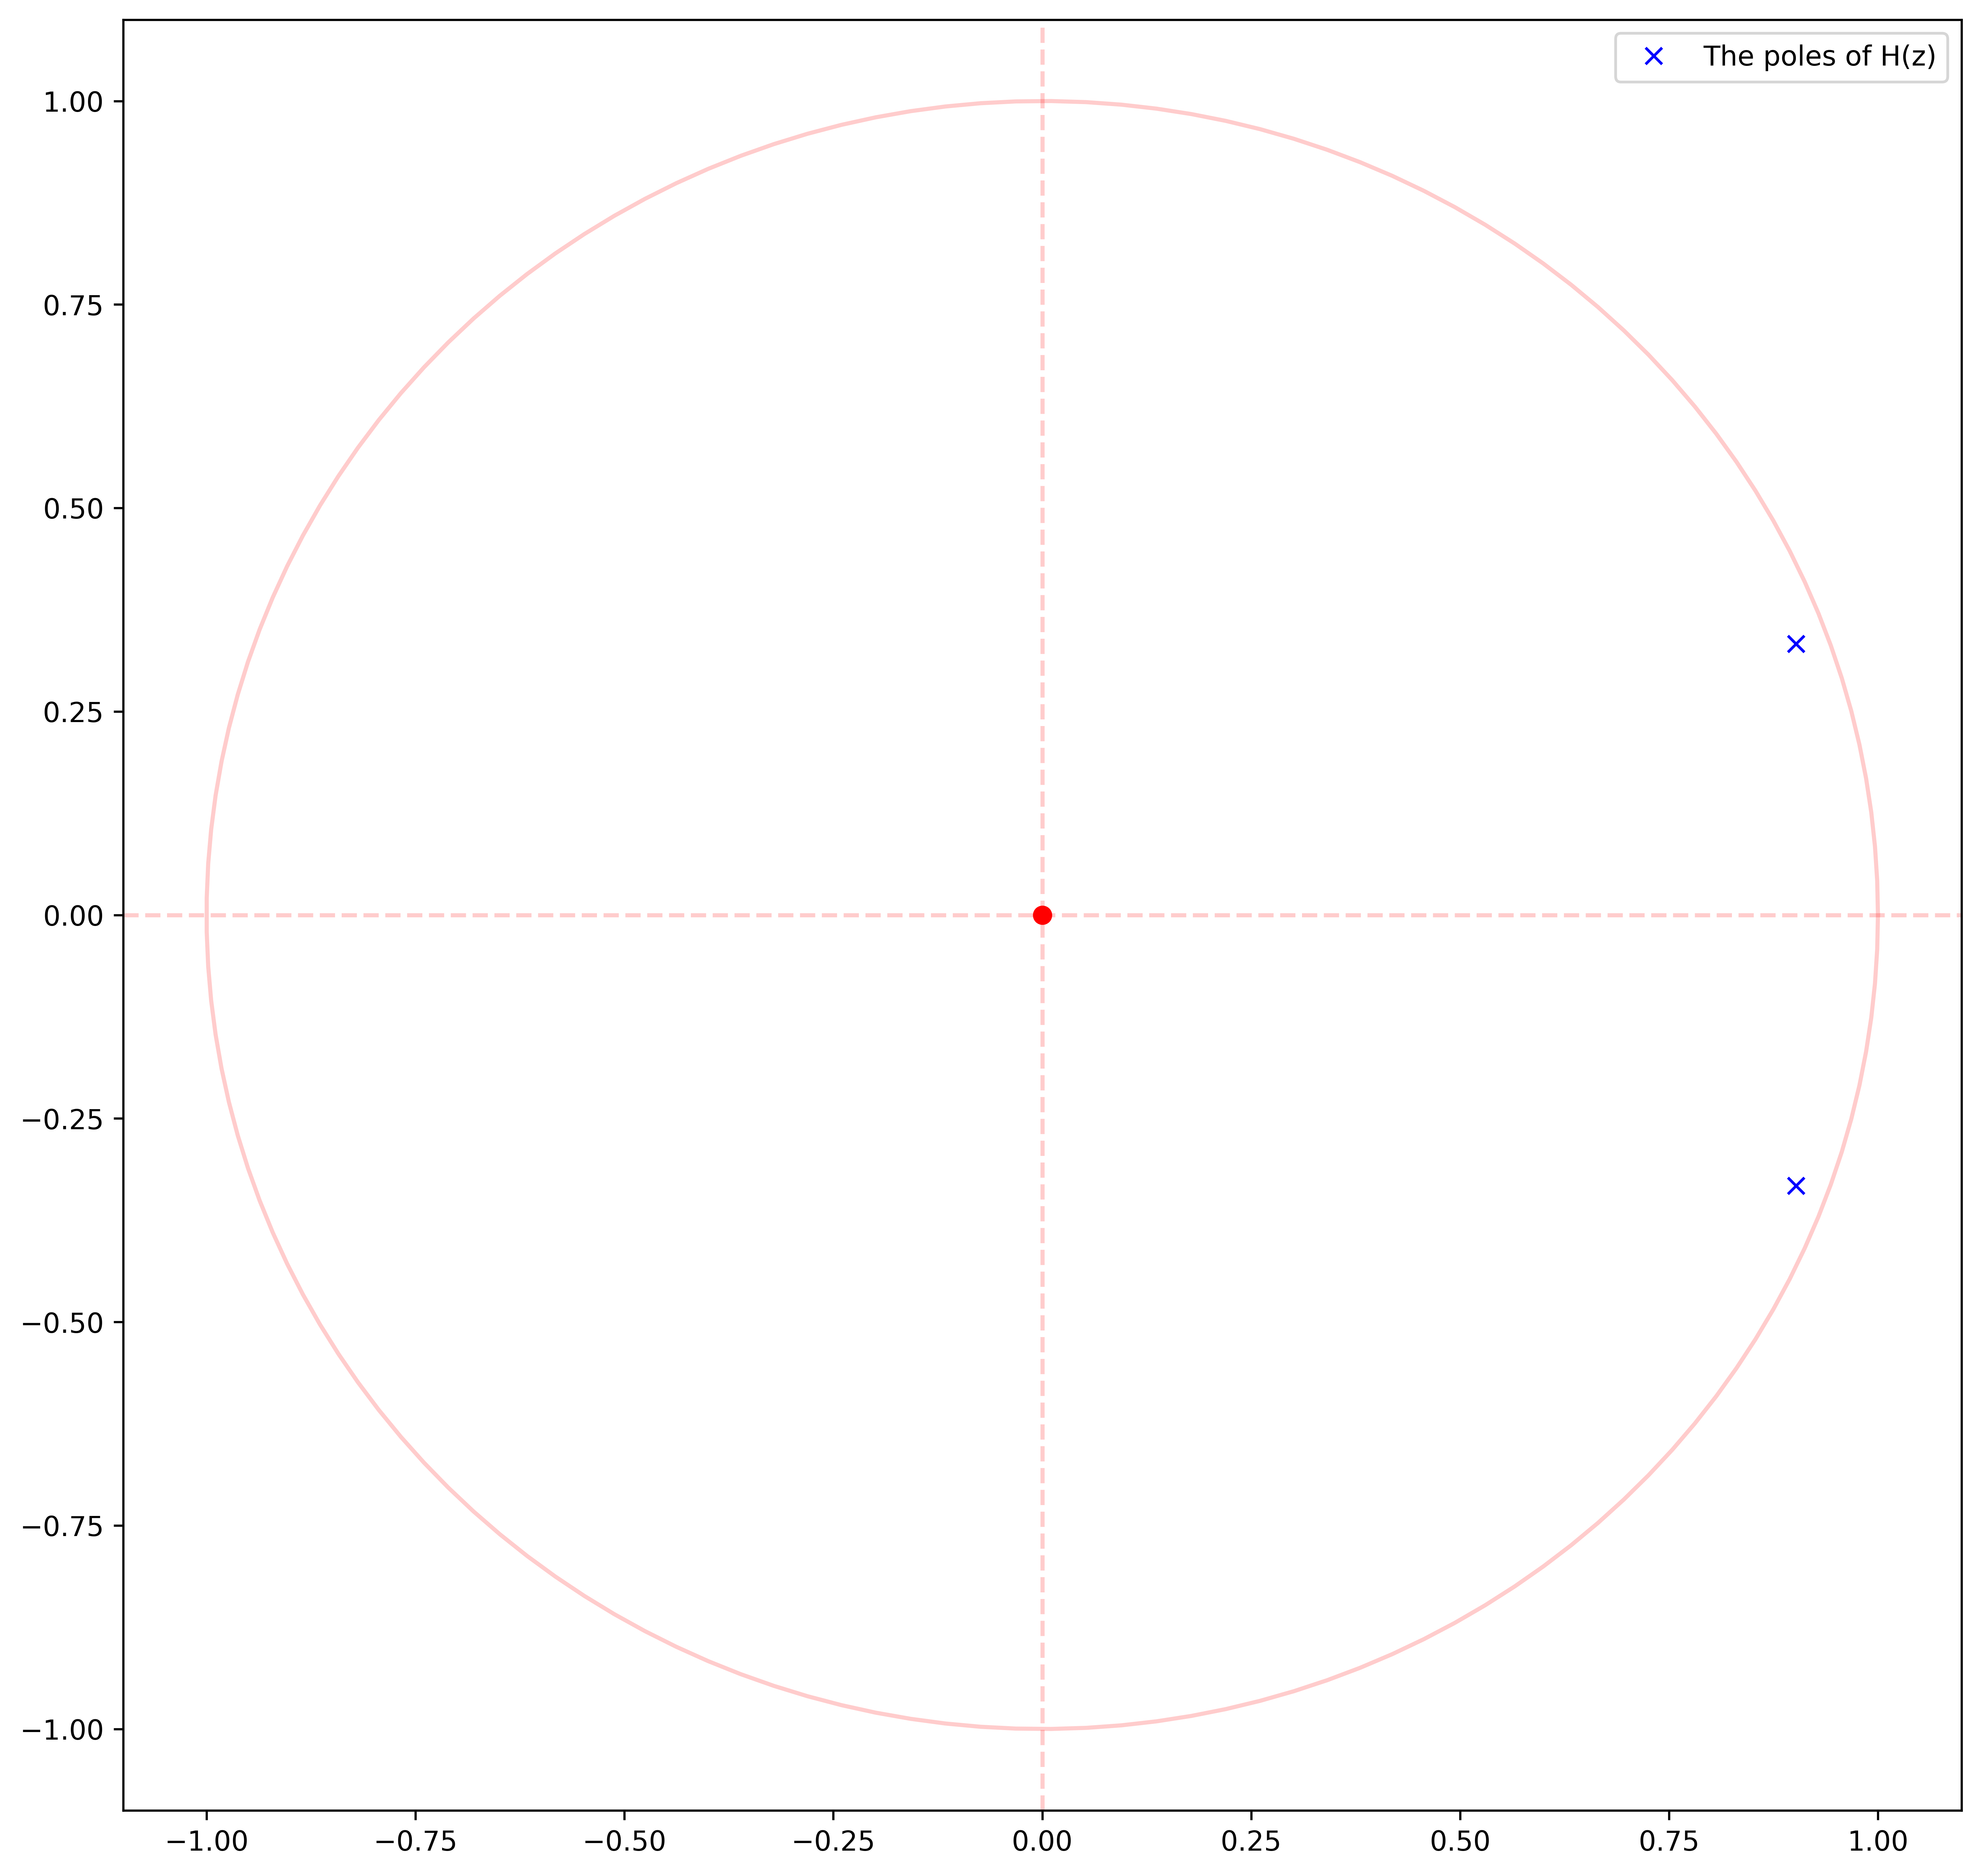

In [95]:
plt.rcParams['figure.dpi'] = 600
plt.figure(figsize=(12, 12))
plt.plot(r*np.cos(theta), r*np.sin(theta), 'bx')
plt.plot(r*np.cos(-theta), r*np.sin(-theta), 'bx')
angle = np.linspace( 0 , 2 * np.pi , 150 ) 

radius = 1

x = radius * np.cos( angle ) 
y = radius * np.sin( angle ) 
plt.plot(x, y, 'r', alpha = 0.2)

plt.axvline(0, c = 'r', ls='--', alpha=0.2)
plt.axhline(0, c = 'r', ls='--', alpha=0.2)
plt.plot(0, 0, 'ro')
plt.legend(["The poles of H(z)"])

## H(z)

In [96]:
def getFilterDenCoef(F1, B1, Fs):
    r, theta = np.exp(-b1*pi*T), 2*pi*f1*T
    return np.array([1, -2*r*np.cos(theta), r*r])

In [97]:
num = np.array([1])
den = getFilterDenCoef(f1, b1, fs)

### Displaying H(z)

In [98]:
s = "{a0} + {a1} z^-1 + {a2} z^-2".format(a0 = den[0], a1 = den[1], a2 = den[2])
print("H(z) = \n")
print(" "*(len(s)//2) + "1\n" + "-"*len(s)+"\n"+s)

H(z) = 

                            1
--------------------------------------------------------
1.0 + -1.8041253513834825 z^-1 + 0.9244652503762558 z^-2


In [99]:
w, h = scipy.signal.freqz(b=num, a=den, fs = fs)

## Magnitude (dB vs Frequency)

### From formula

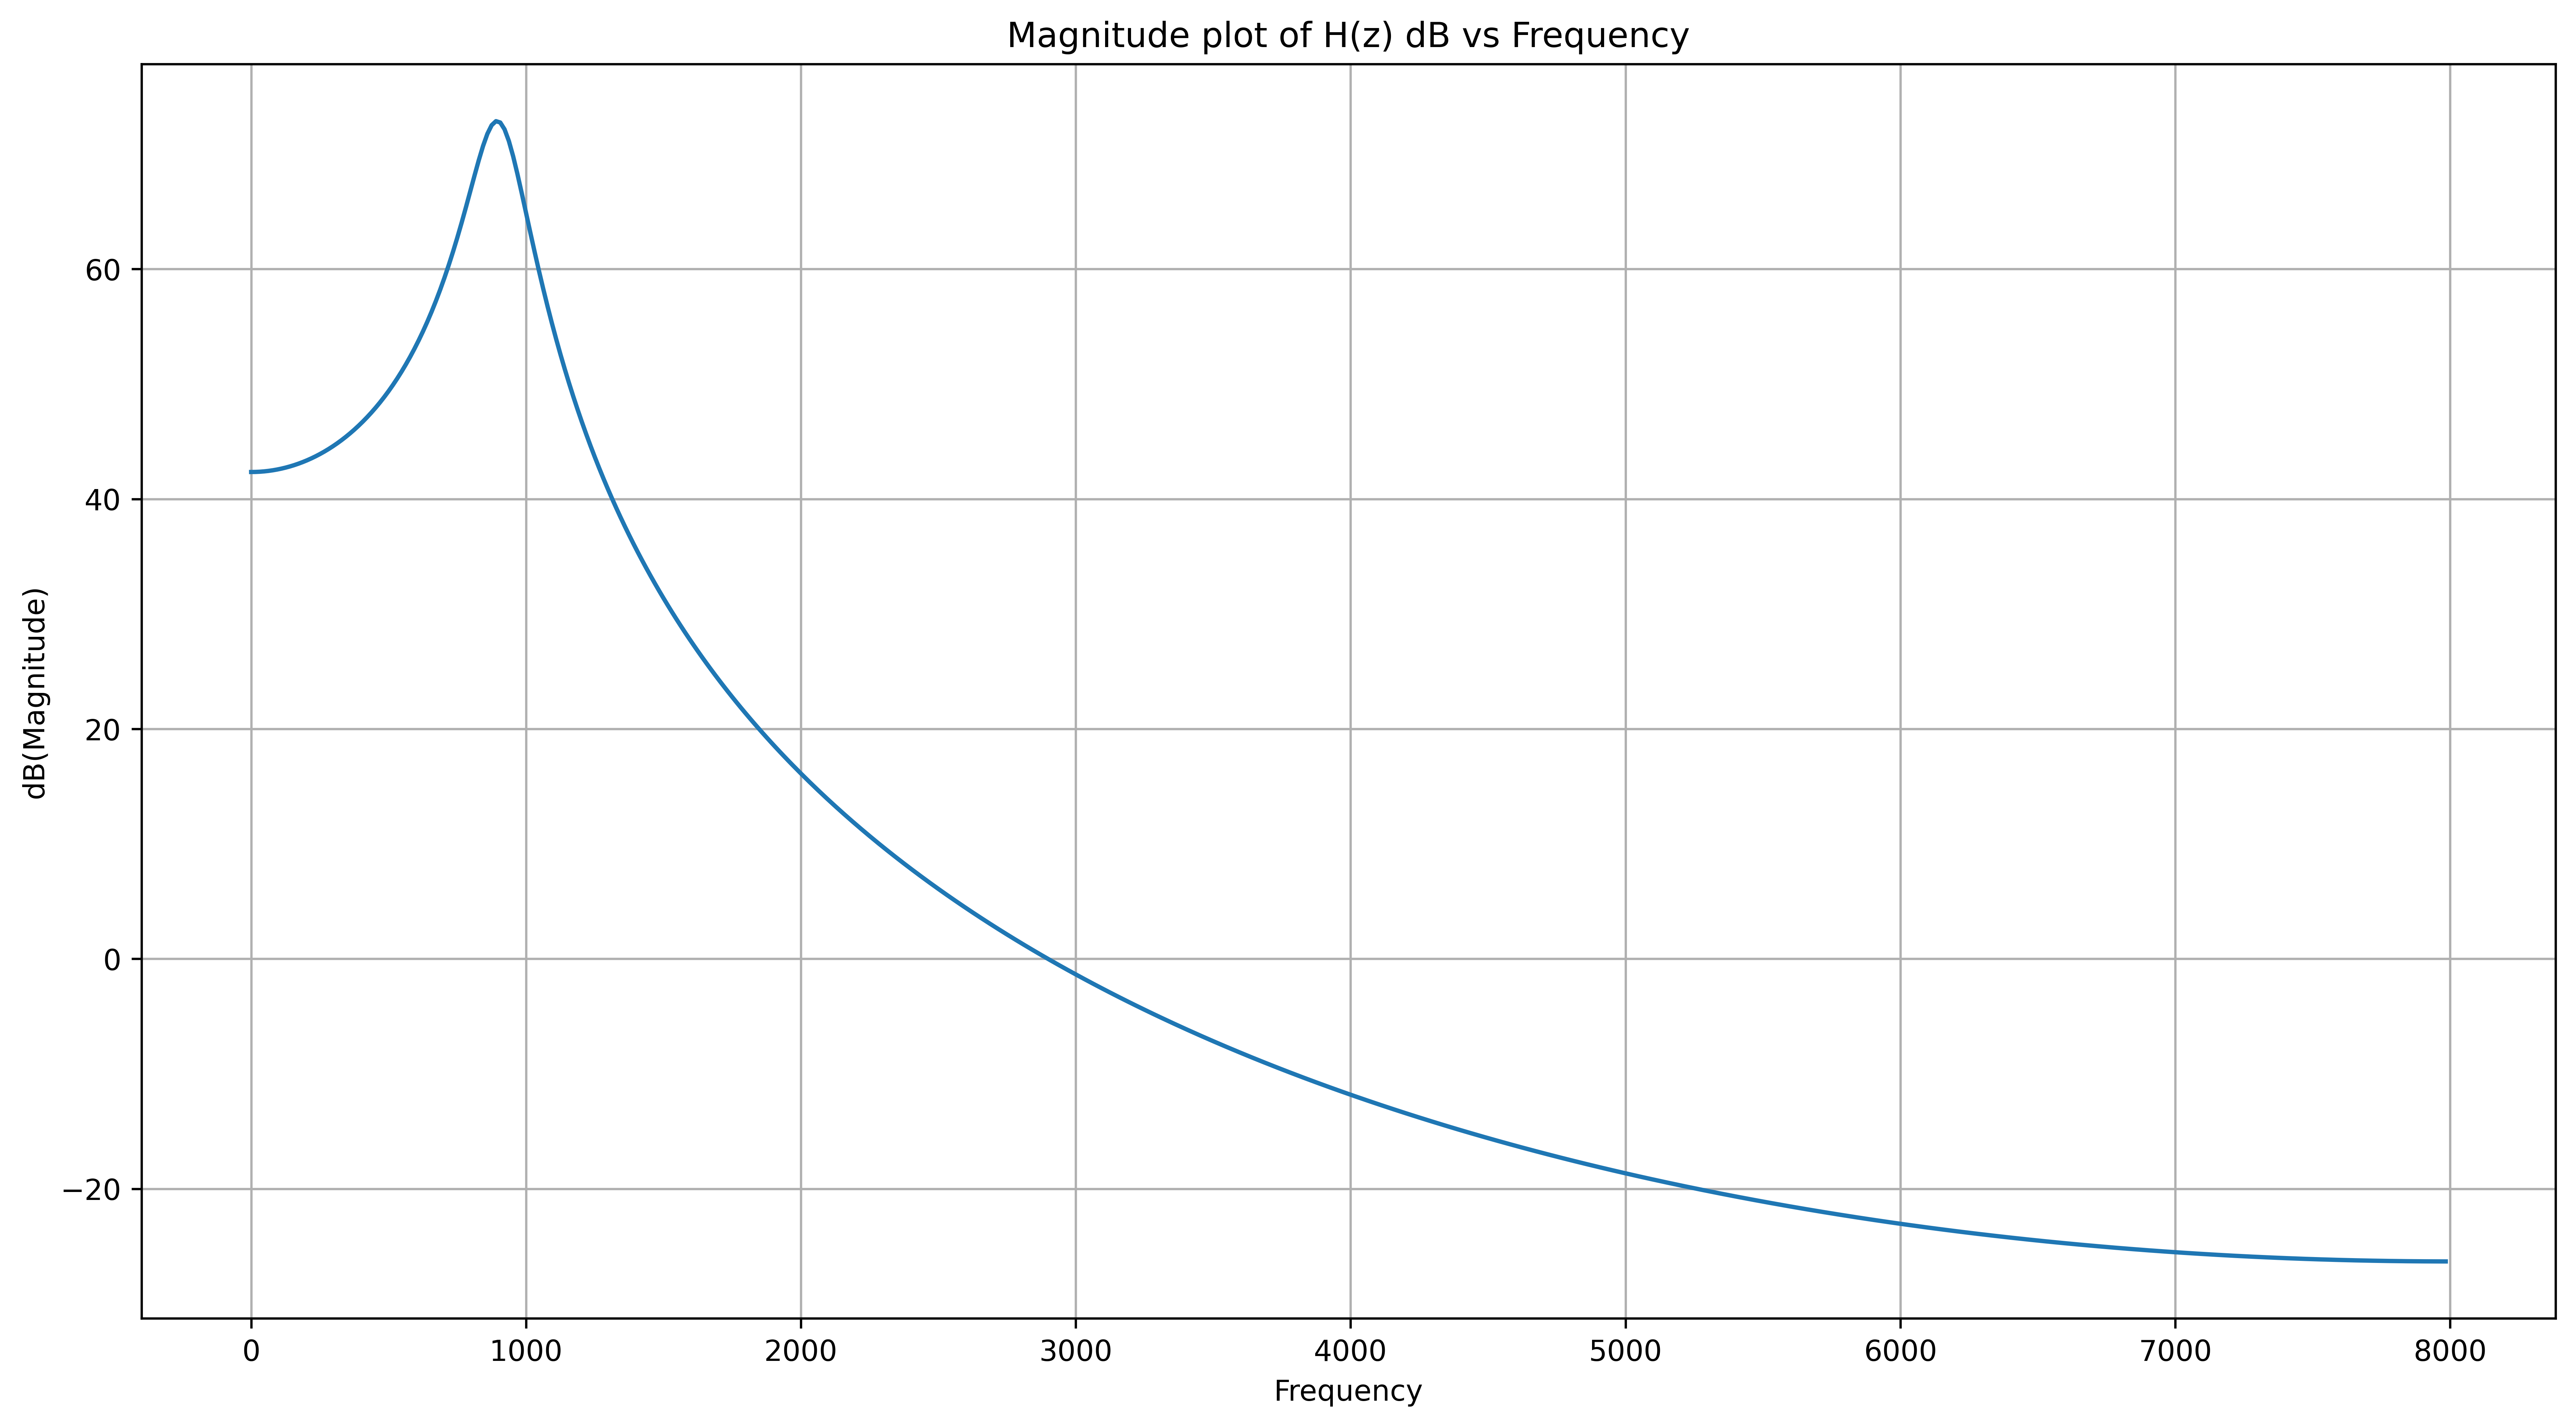

In [100]:
plt.figure(figsize=(15, 8))
plt.plot(w, 20*np.log(np.sqrt(h*np.conjugate(h))))
plt.xlabel("Frequency")
plt.ylabel("dB(Magnitude)")
plt.title("Magnitude plot of H(z) dB vs Frequency")
plt.grid(True)

### Using the scipy functions for magnitude response

In [101]:
w, mag, phase = scipy.signal.dbode((num, den, 1))

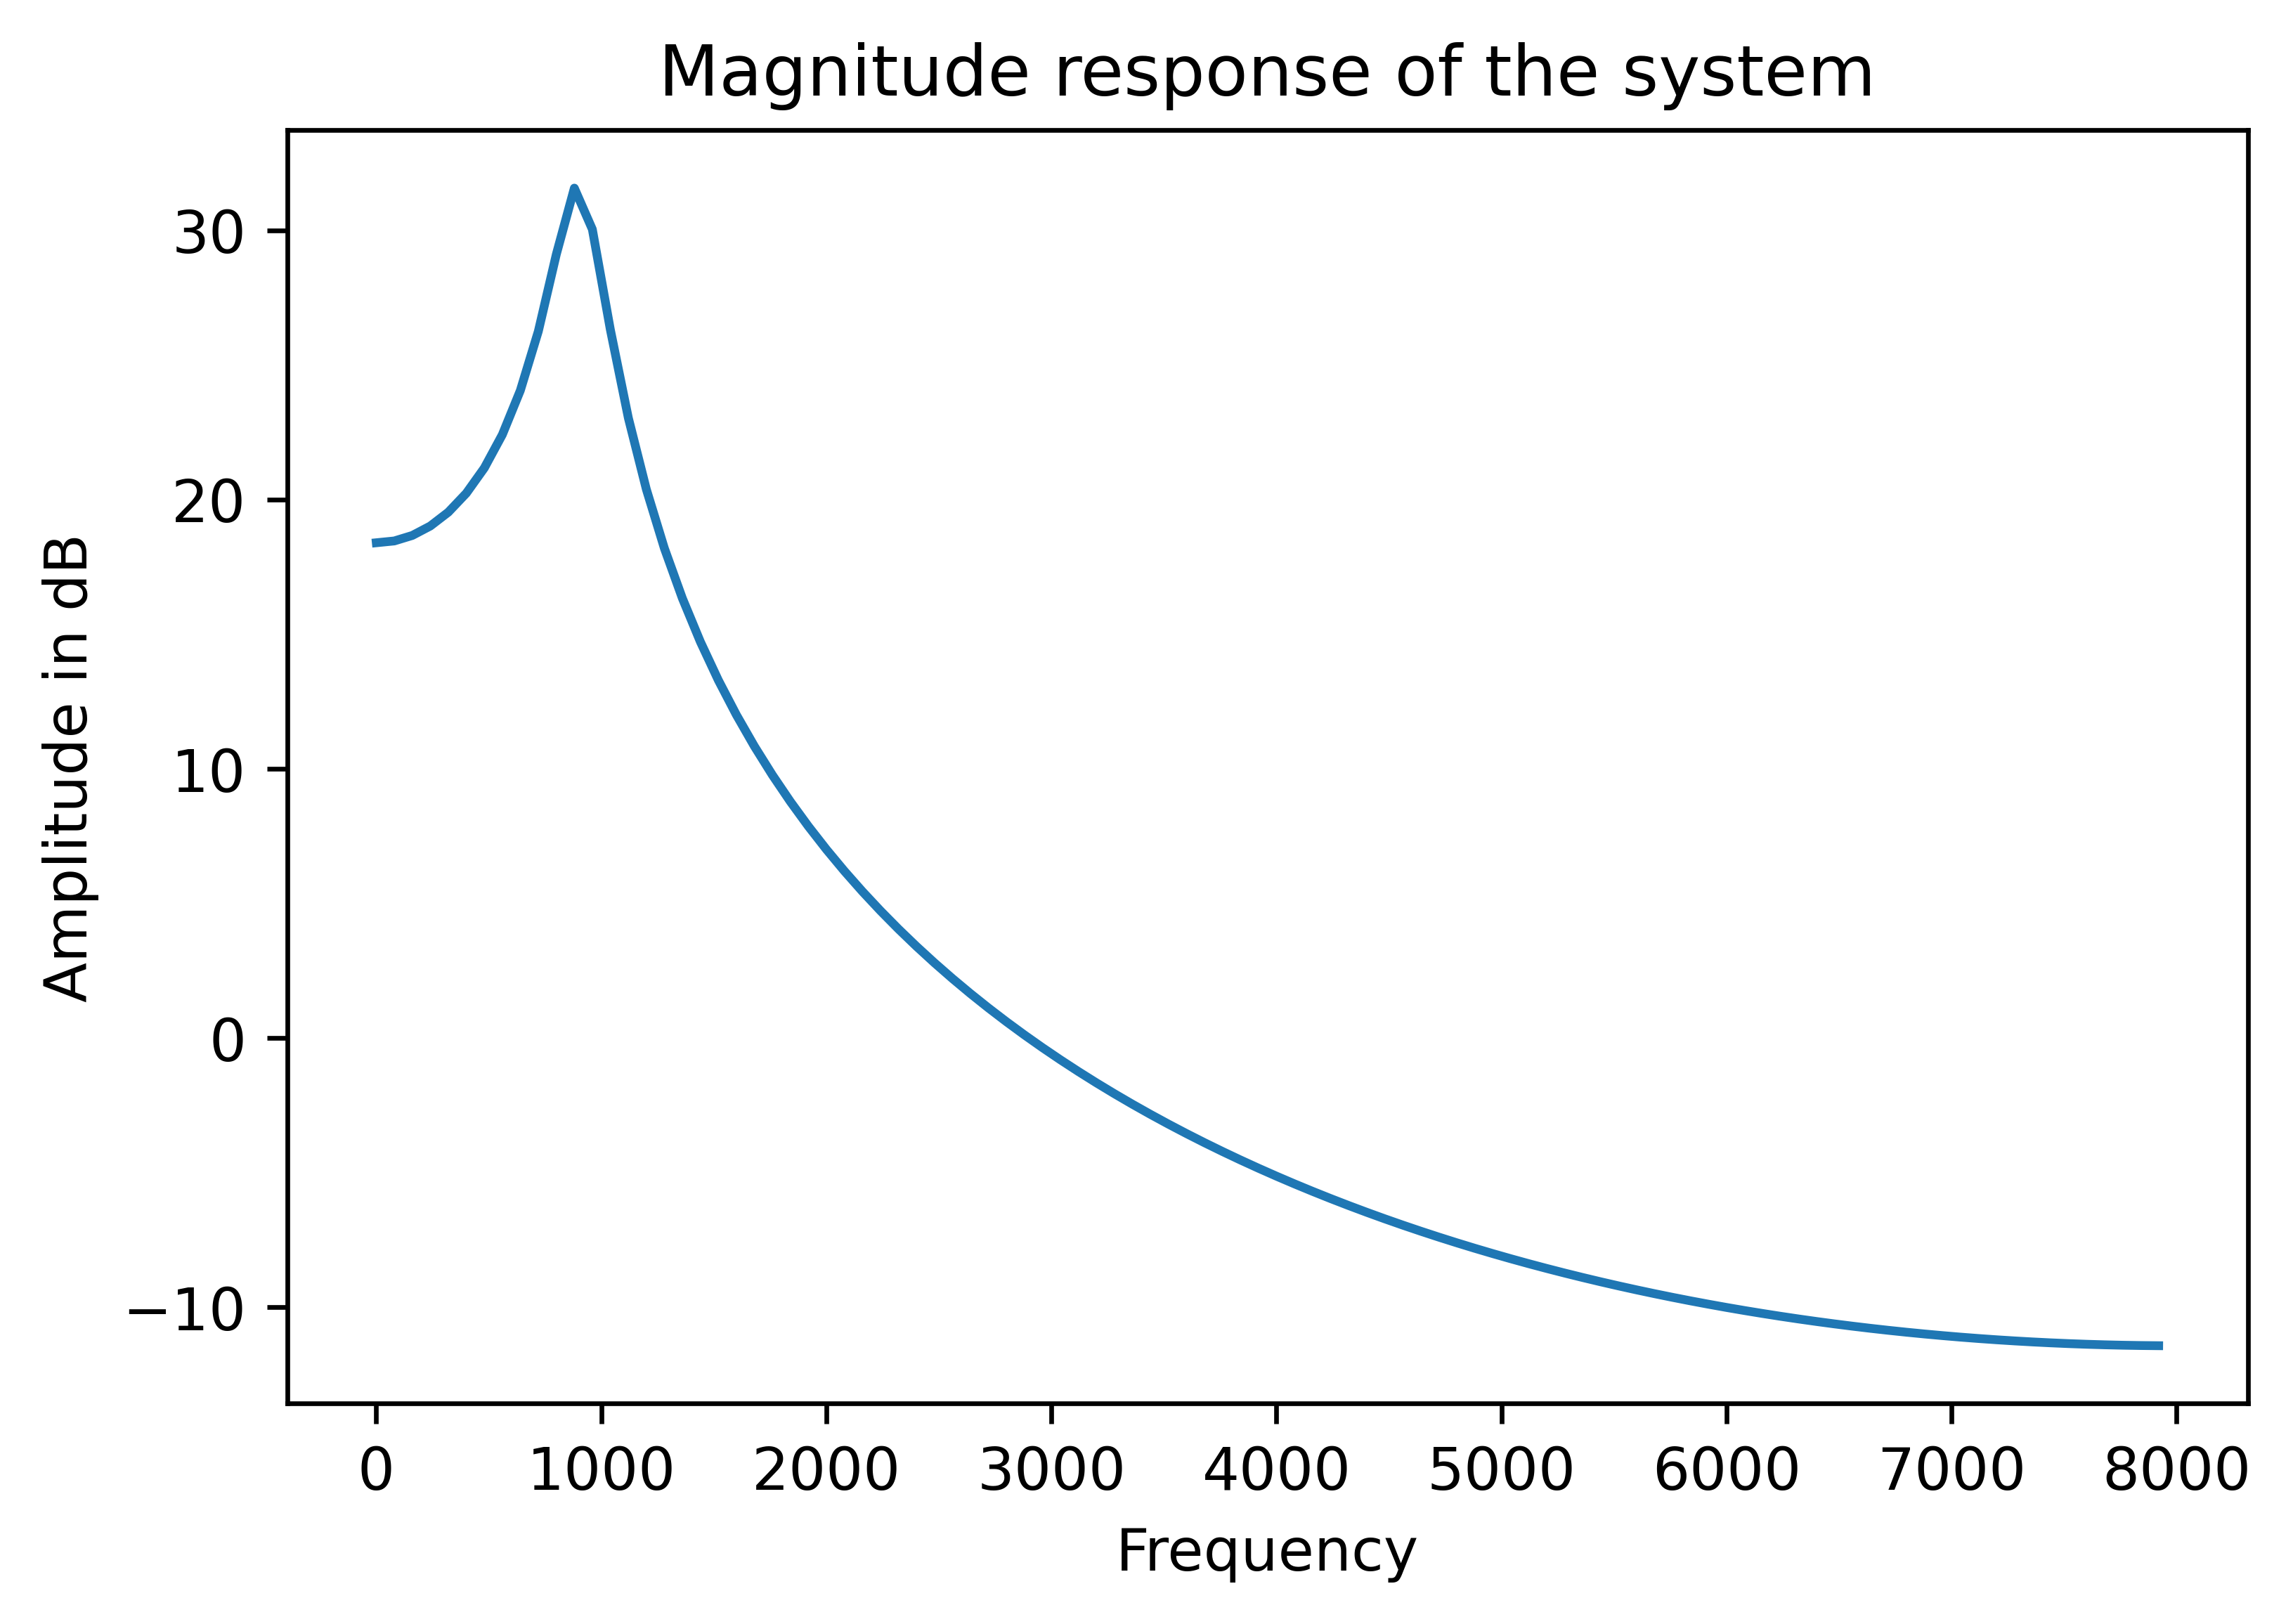

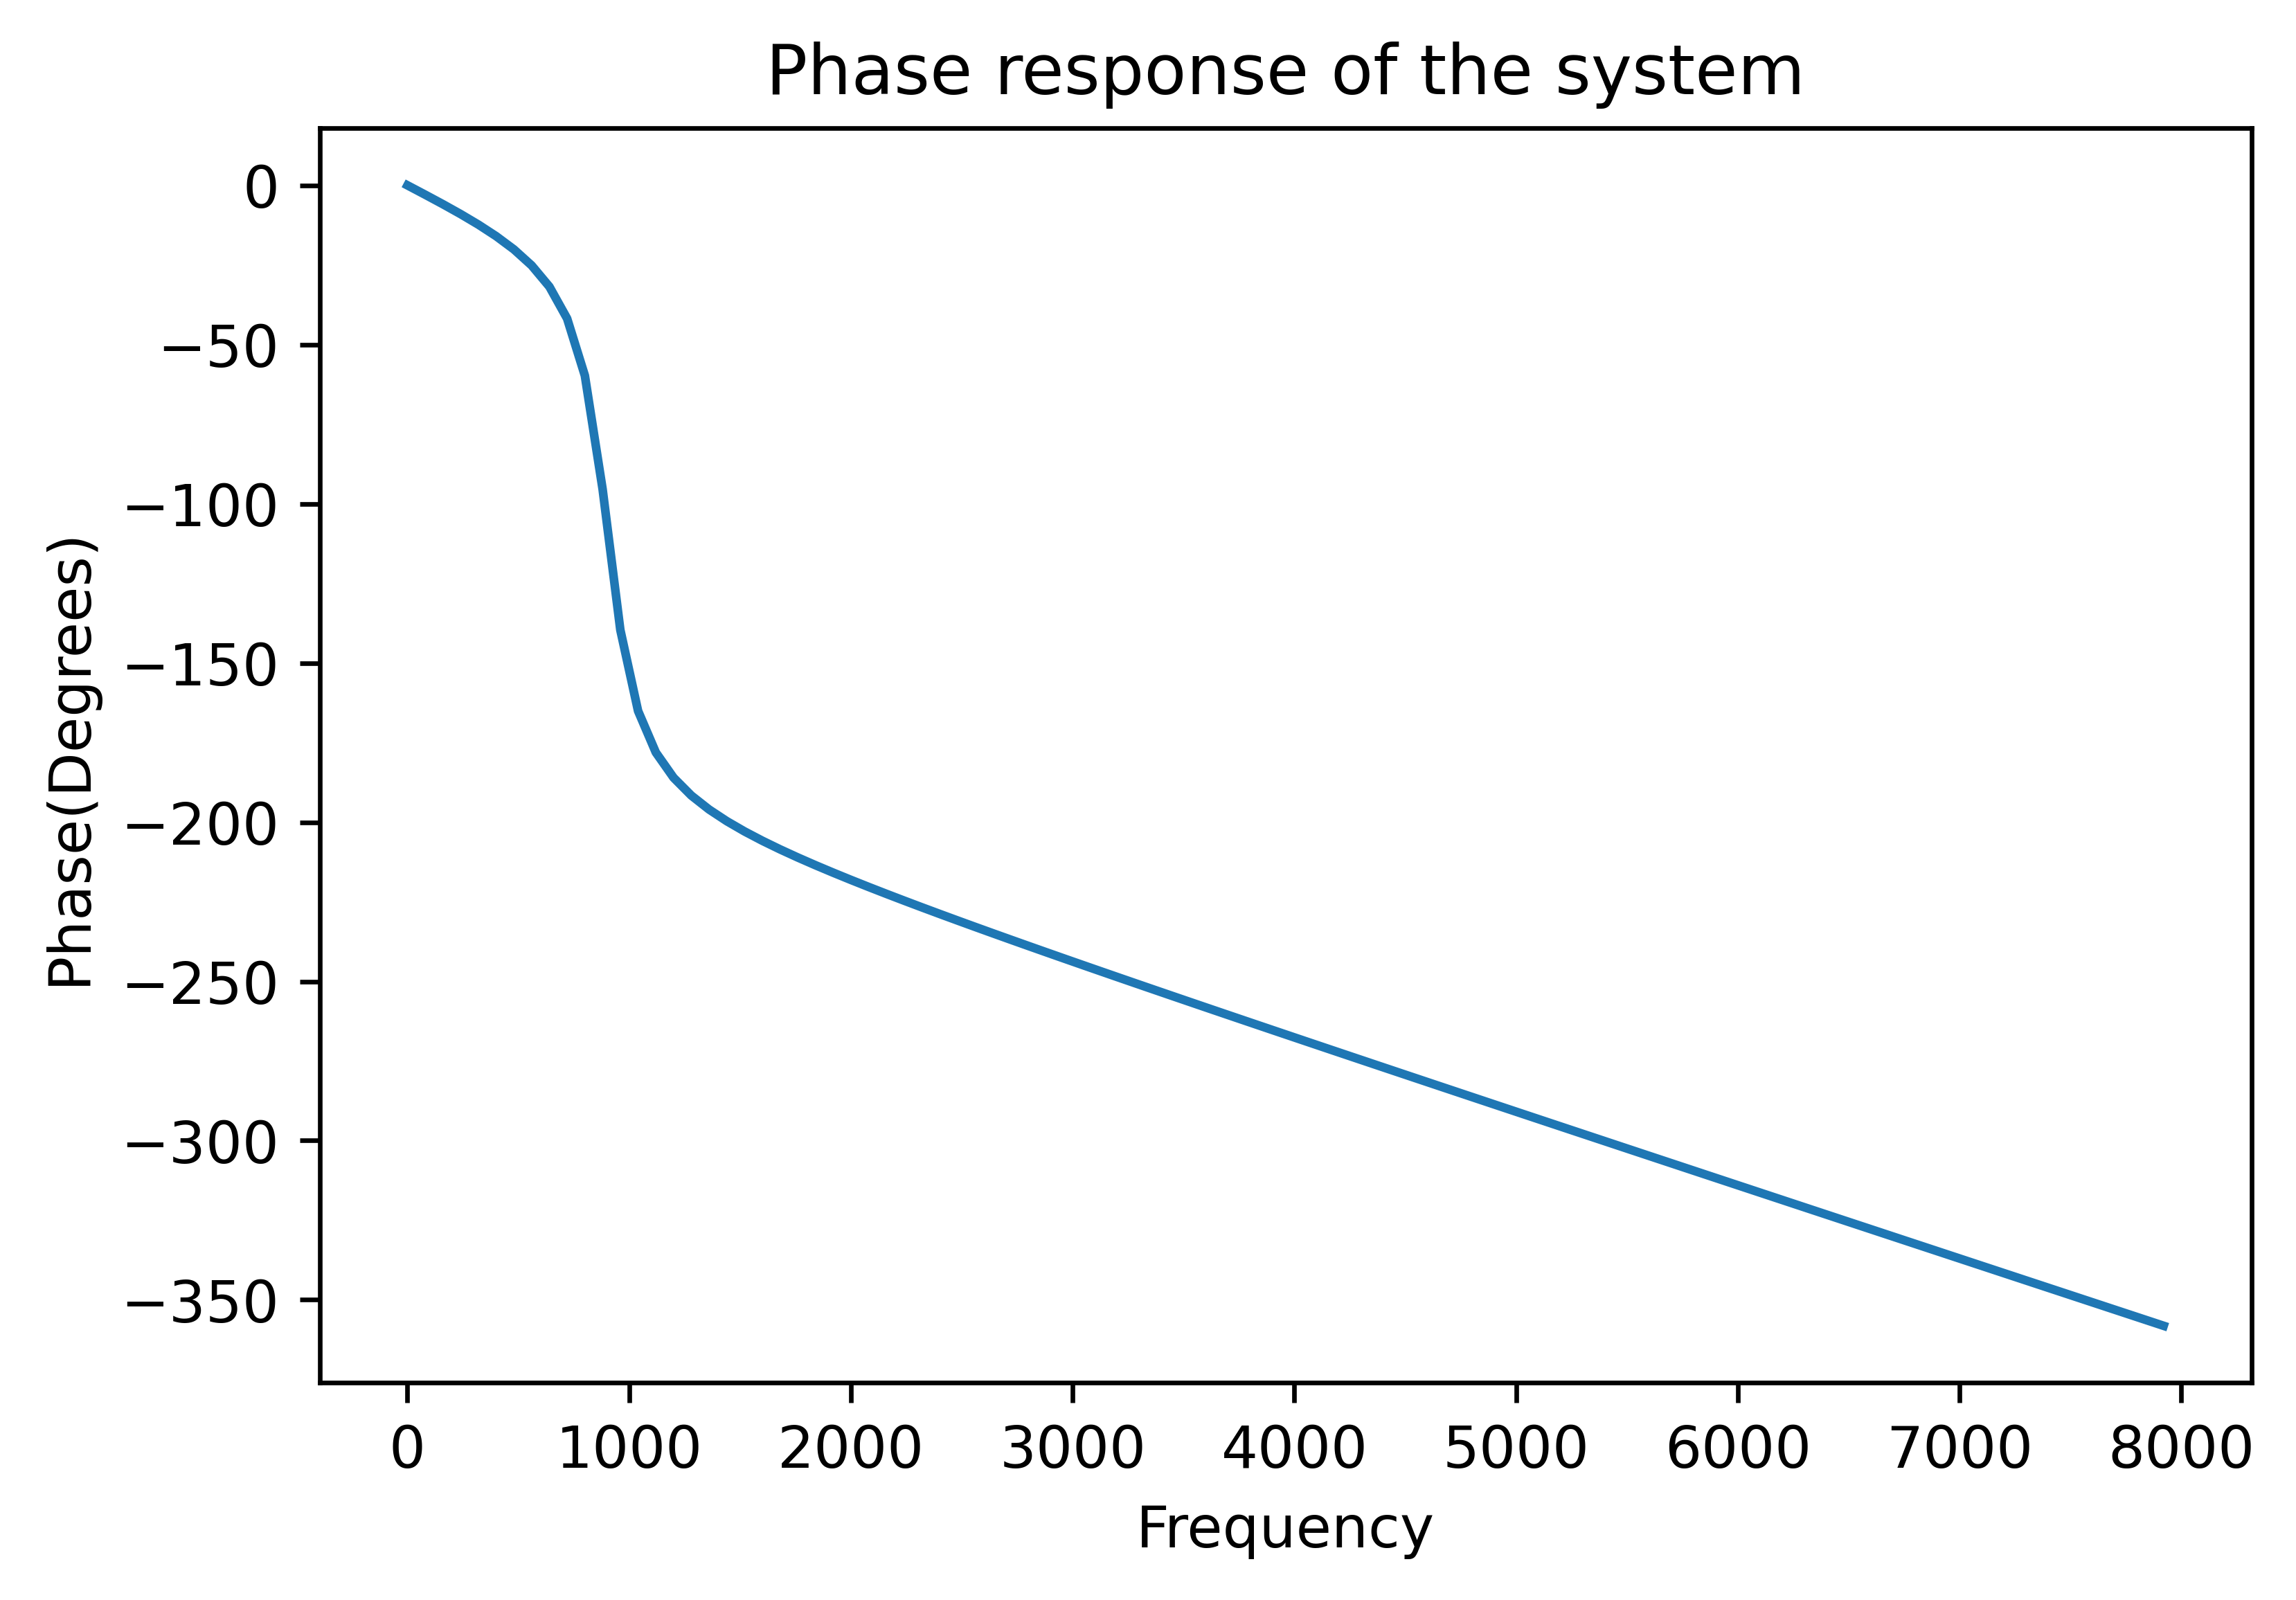

In [102]:
plt.figure()
plt.plot(w*fs/(2*pi), mag)    # Bode magnitude plot
plt.xlabel("Frequency")
plt.ylabel("Amplitude in dB")
plt.title("Magnitude response of the system")
plt.figure()
plt.plot(w*fs/(2*pi), phase)  # Bode phase plot
plt.xlabel("Frequency")
plt.ylabel("Phase(Degrees)")
plt.title("Phase response of the system")
plt.show()

## Impulse response

In [103]:
def computeImpRes(ini, samples, r, theta):
    #computing the impulse response from the difference equations
    y = np.zeros((samples, 1))
    y[0], y[1], y[2] = ini
    for i in range(3, samples):
        y[i] = 2*r*np.cos(theta)*y[i-1] - r*r*y[i-2]
    return y

In [104]:
yImp = computeImpRes([1, 2*r*np.cos(theta), 4*r*r*np.cos(theta)*np.cos(theta) - r*r], 200, r, theta)

Text(0.5, 1.0, 'Impulse response in time domain')

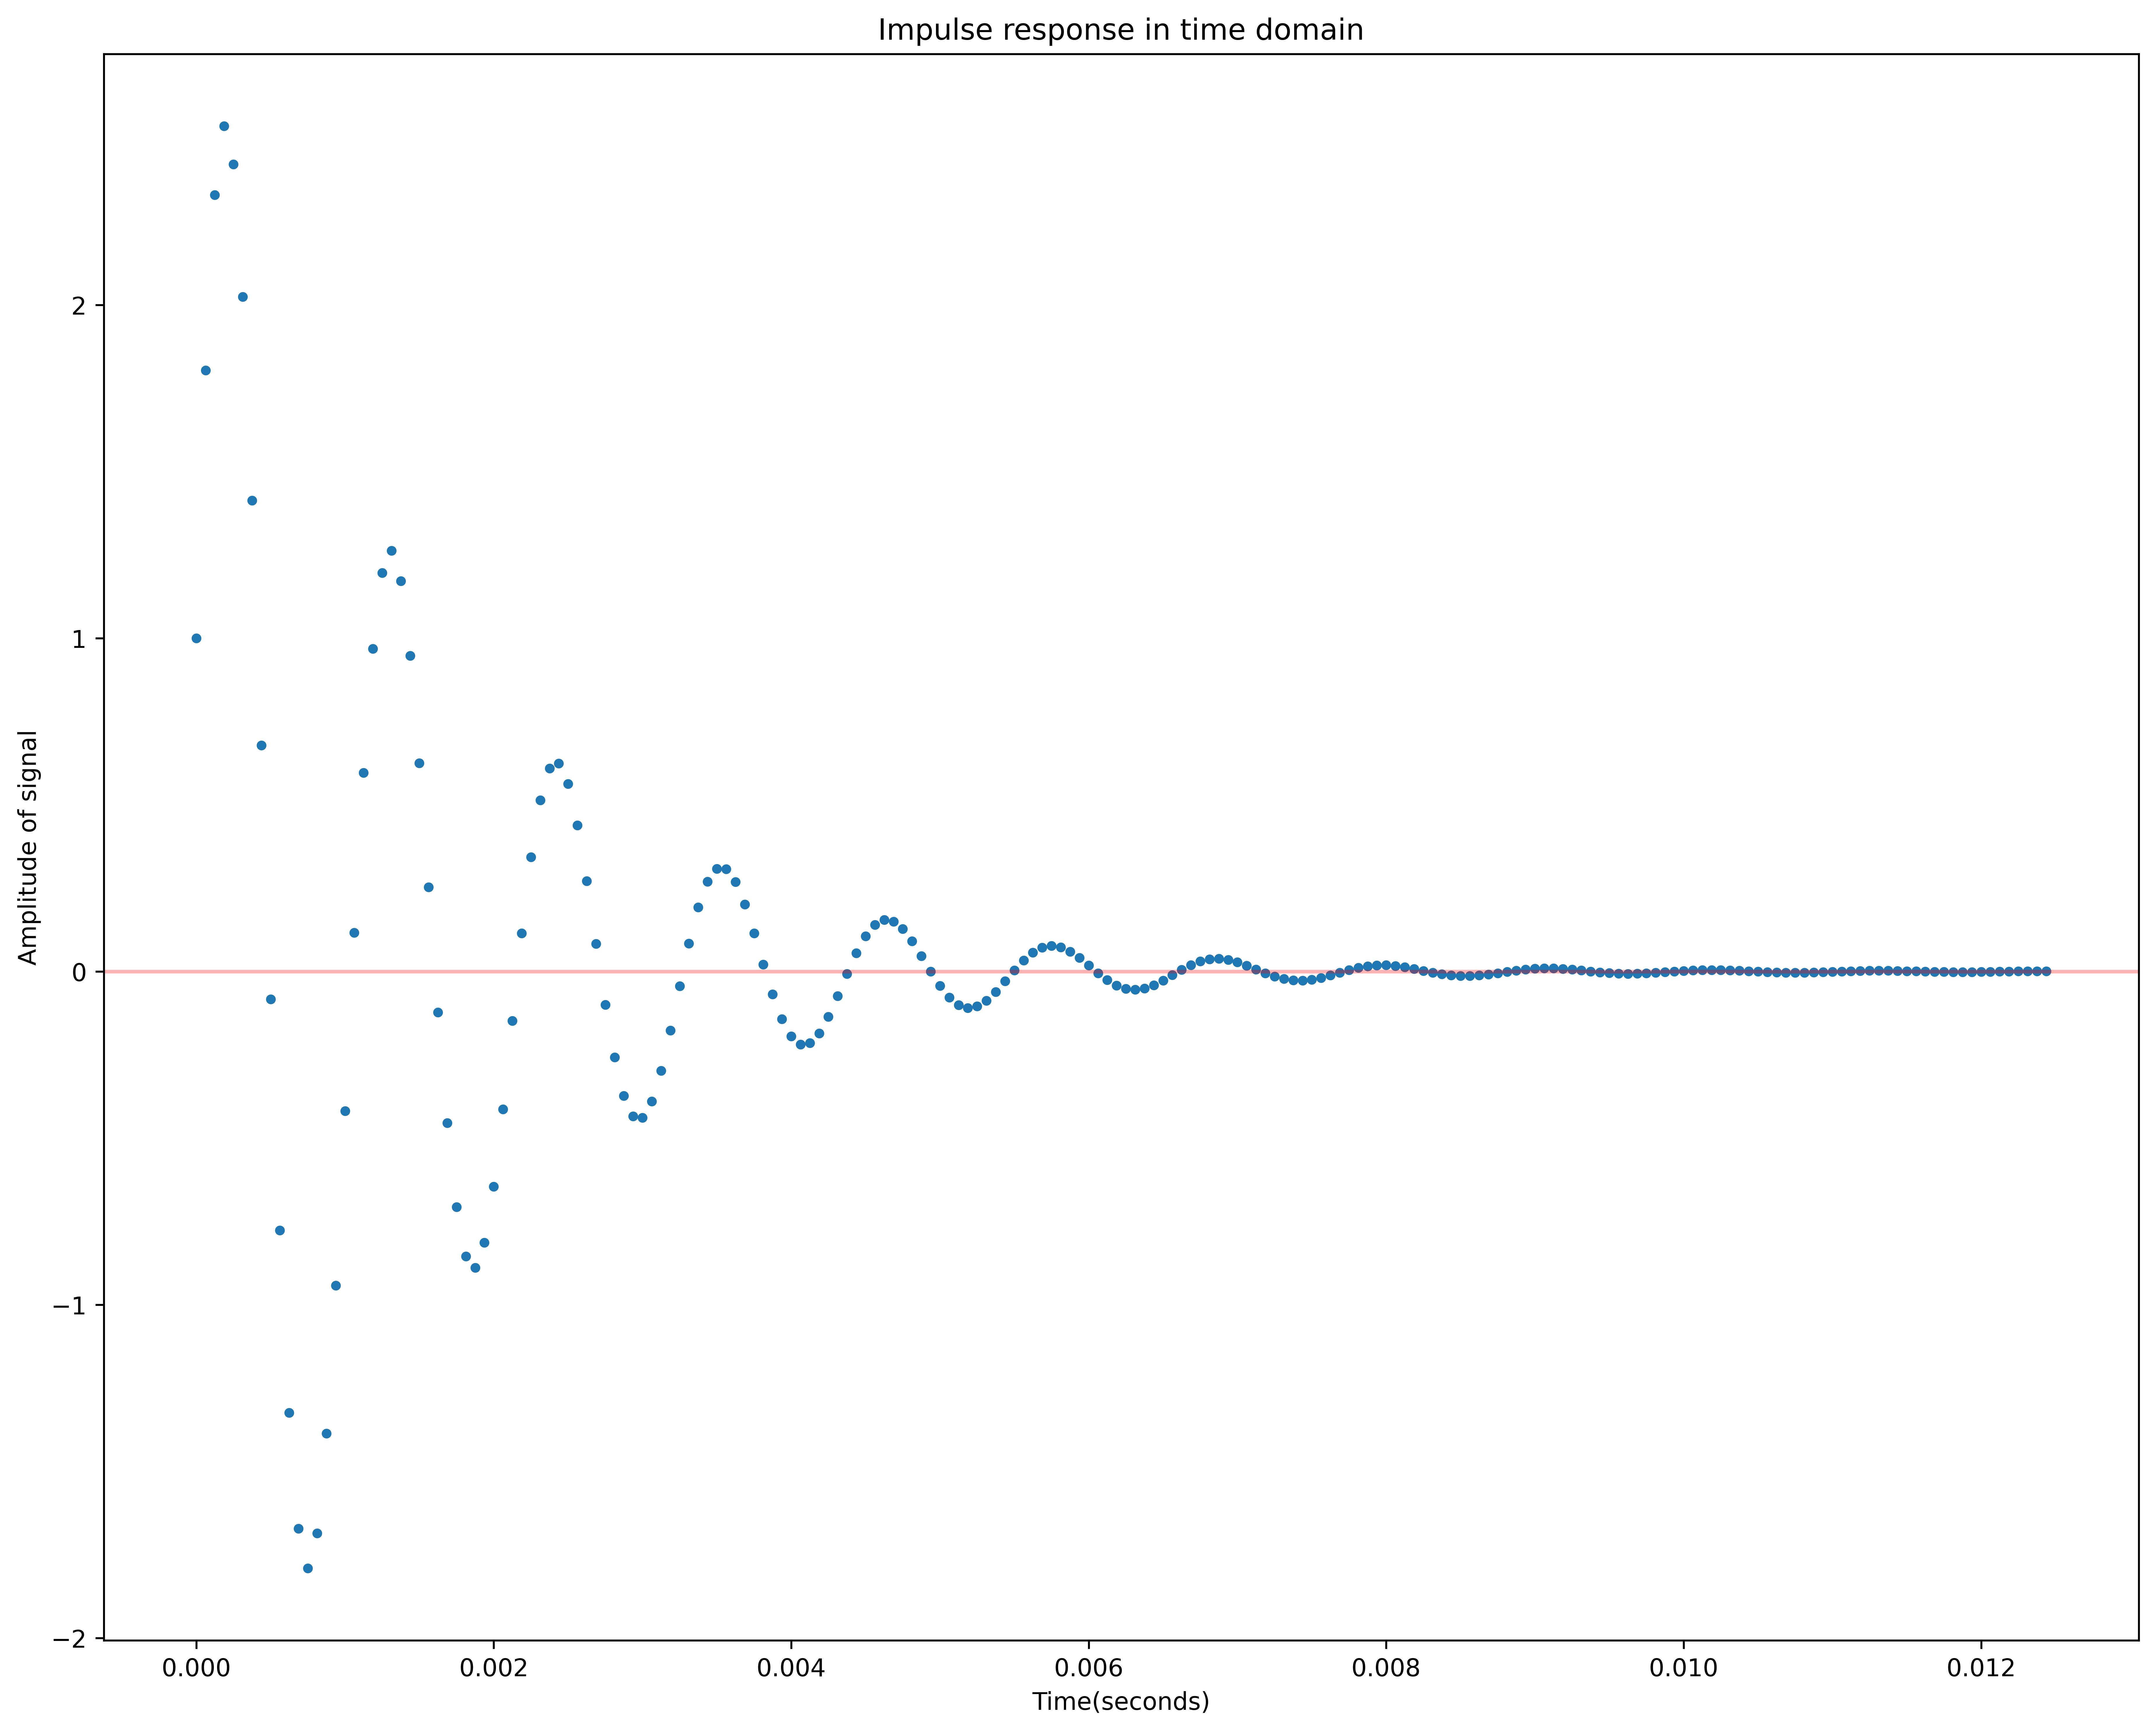

In [105]:
plt.figure(figsize=(15, 12))
t = [i/fs for i in range(len(yImp))]
plt.plot(t, yImp, '.')
plt.axhline(0, c = 'r', alpha=0.3)
plt.xlabel("Time(seconds)")
plt.ylabel("Amplitude of signal")
plt.title("Impulse response in time domain")

# Question 2

In [106]:
f1 = 900 #formant frequency
b1 = 200 #bandwith
fs = 16000 #sampling frequency
T = 1.0/fs #samples

In [107]:
r = np.exp(-b1*pi*T)
theta = 2*pi*f1*T

In [108]:
F0 = 160
dur = 0.02
timeSpace = np.linspace(0, dur, int(dur*fs))
P = fs//F0 ##approximating location of the peaks of the triangular impulse train
samp = len(timeSpace)
width = 2#no of samples on either side of the peak for the triangular input

In [109]:
def computeResponse(x, samples, r, theta):
    #computing the impulse response from the difference equations
    assert x.shape[0]==samples
    y = np.zeros((samples, 1))
    y[0] = x[0] #assumed casual
    y[1] = x[1] + 2*r*np.cos(theta)*y[0]
    y[2] = x[2] + 2*r*np.cos(theta)*y[1] - r*r*y[0]
    for i in range(3, samples):
        y[i] = x[i] + 2*r*np.cos(theta)*y[i-1] - r*r*y[i-2]
    return y

In [110]:
def triagInput(P, samples, width = 4, start = 0):
    #start = {0, 1} whether to start at 0 or the next non-zero sample
    x = np.zeros((samples, 1))
    peaks= []
    for i in range(start, samples+start):
        if i%P==0:
            x[i] = 1 #populating the peaks
            peaks.append(i)
    for j in peaks:
        for k in range(width):
            if j-k>=0:
                x[j-k] = 1 - (k/width)
            if j+k<samples:
                x[j+k] = 1 - (k/width)
    return x



Text(0.5, 1.0, 'System output of source-filter')

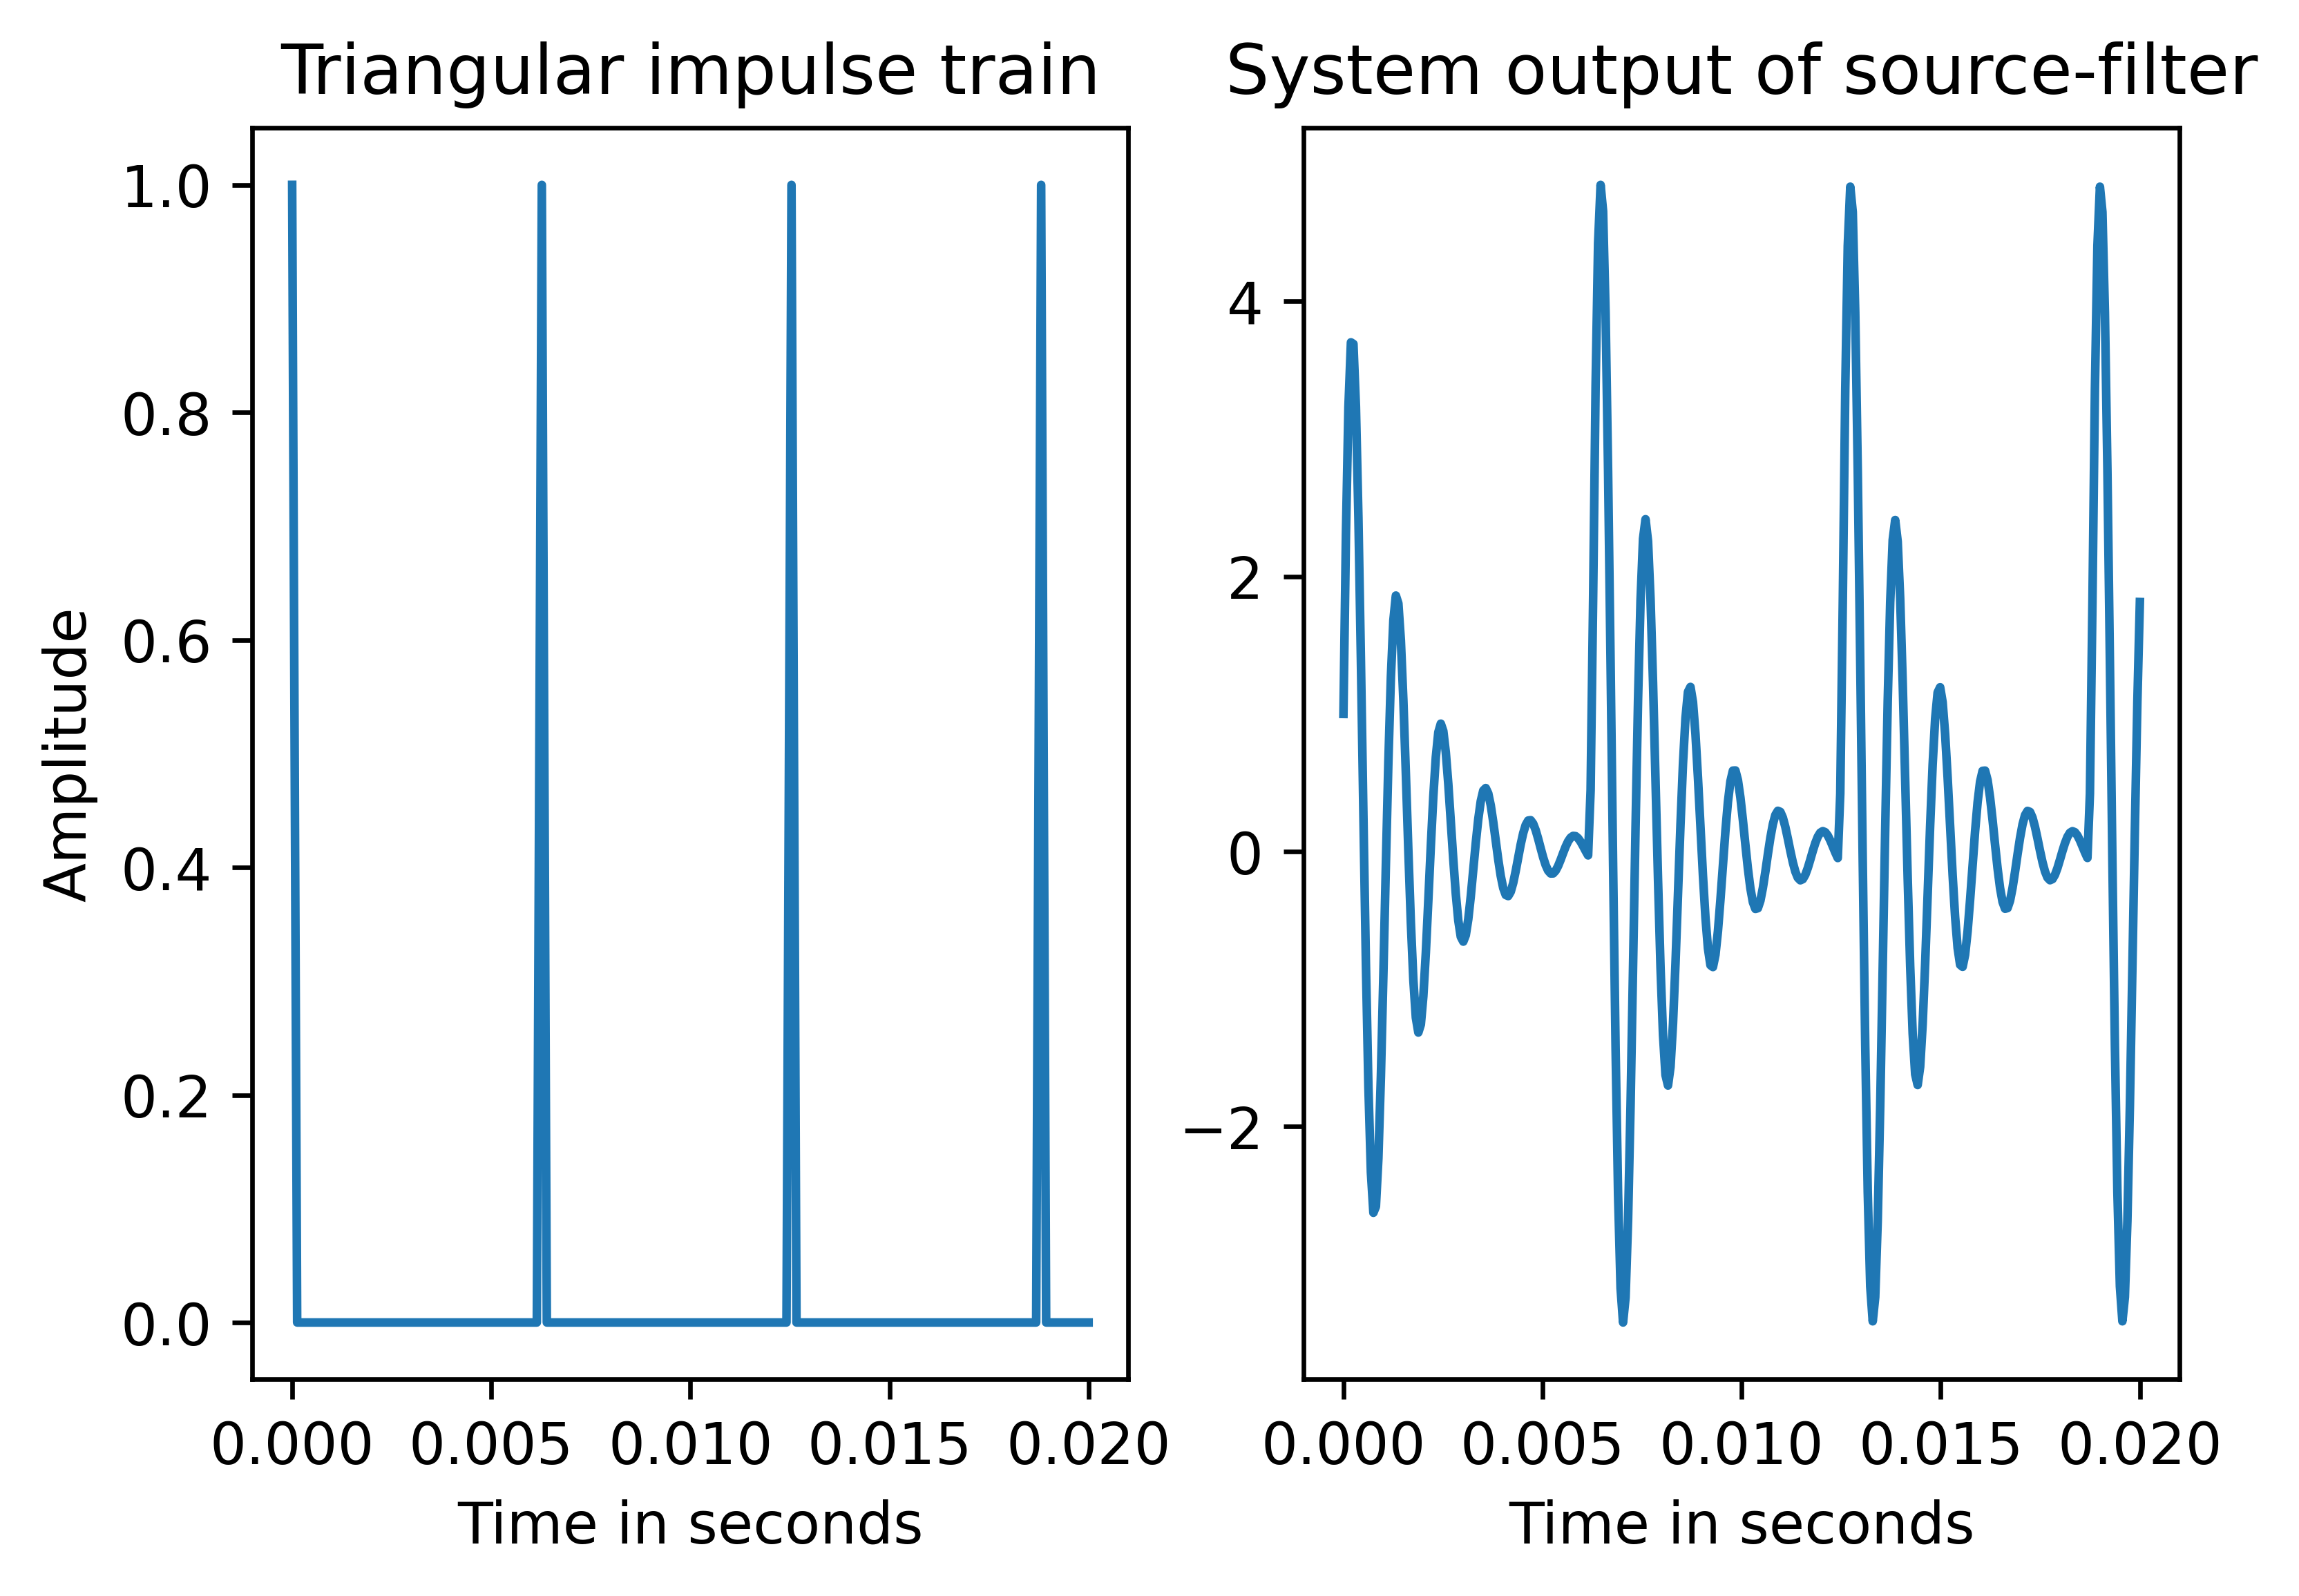

In [111]:
plt.subplot(1, 2, 1)
plt.plot(timeSpace, triagInput(P, samp, width = width))
plt.xlabel("Time in seconds")
plt.ylabel("Amplitude")
plt.title("Triangular impulse train")
plt.subplot(1, 2, 2)
plt.plot(timeSpace, computeResponse(triagInput(P, samp, width = width), samp, r, theta))
plt.xlabel("Time in seconds")
plt.title("System output of source-filter")

Text(0.5, 1.0, 'Output of source-filter system')

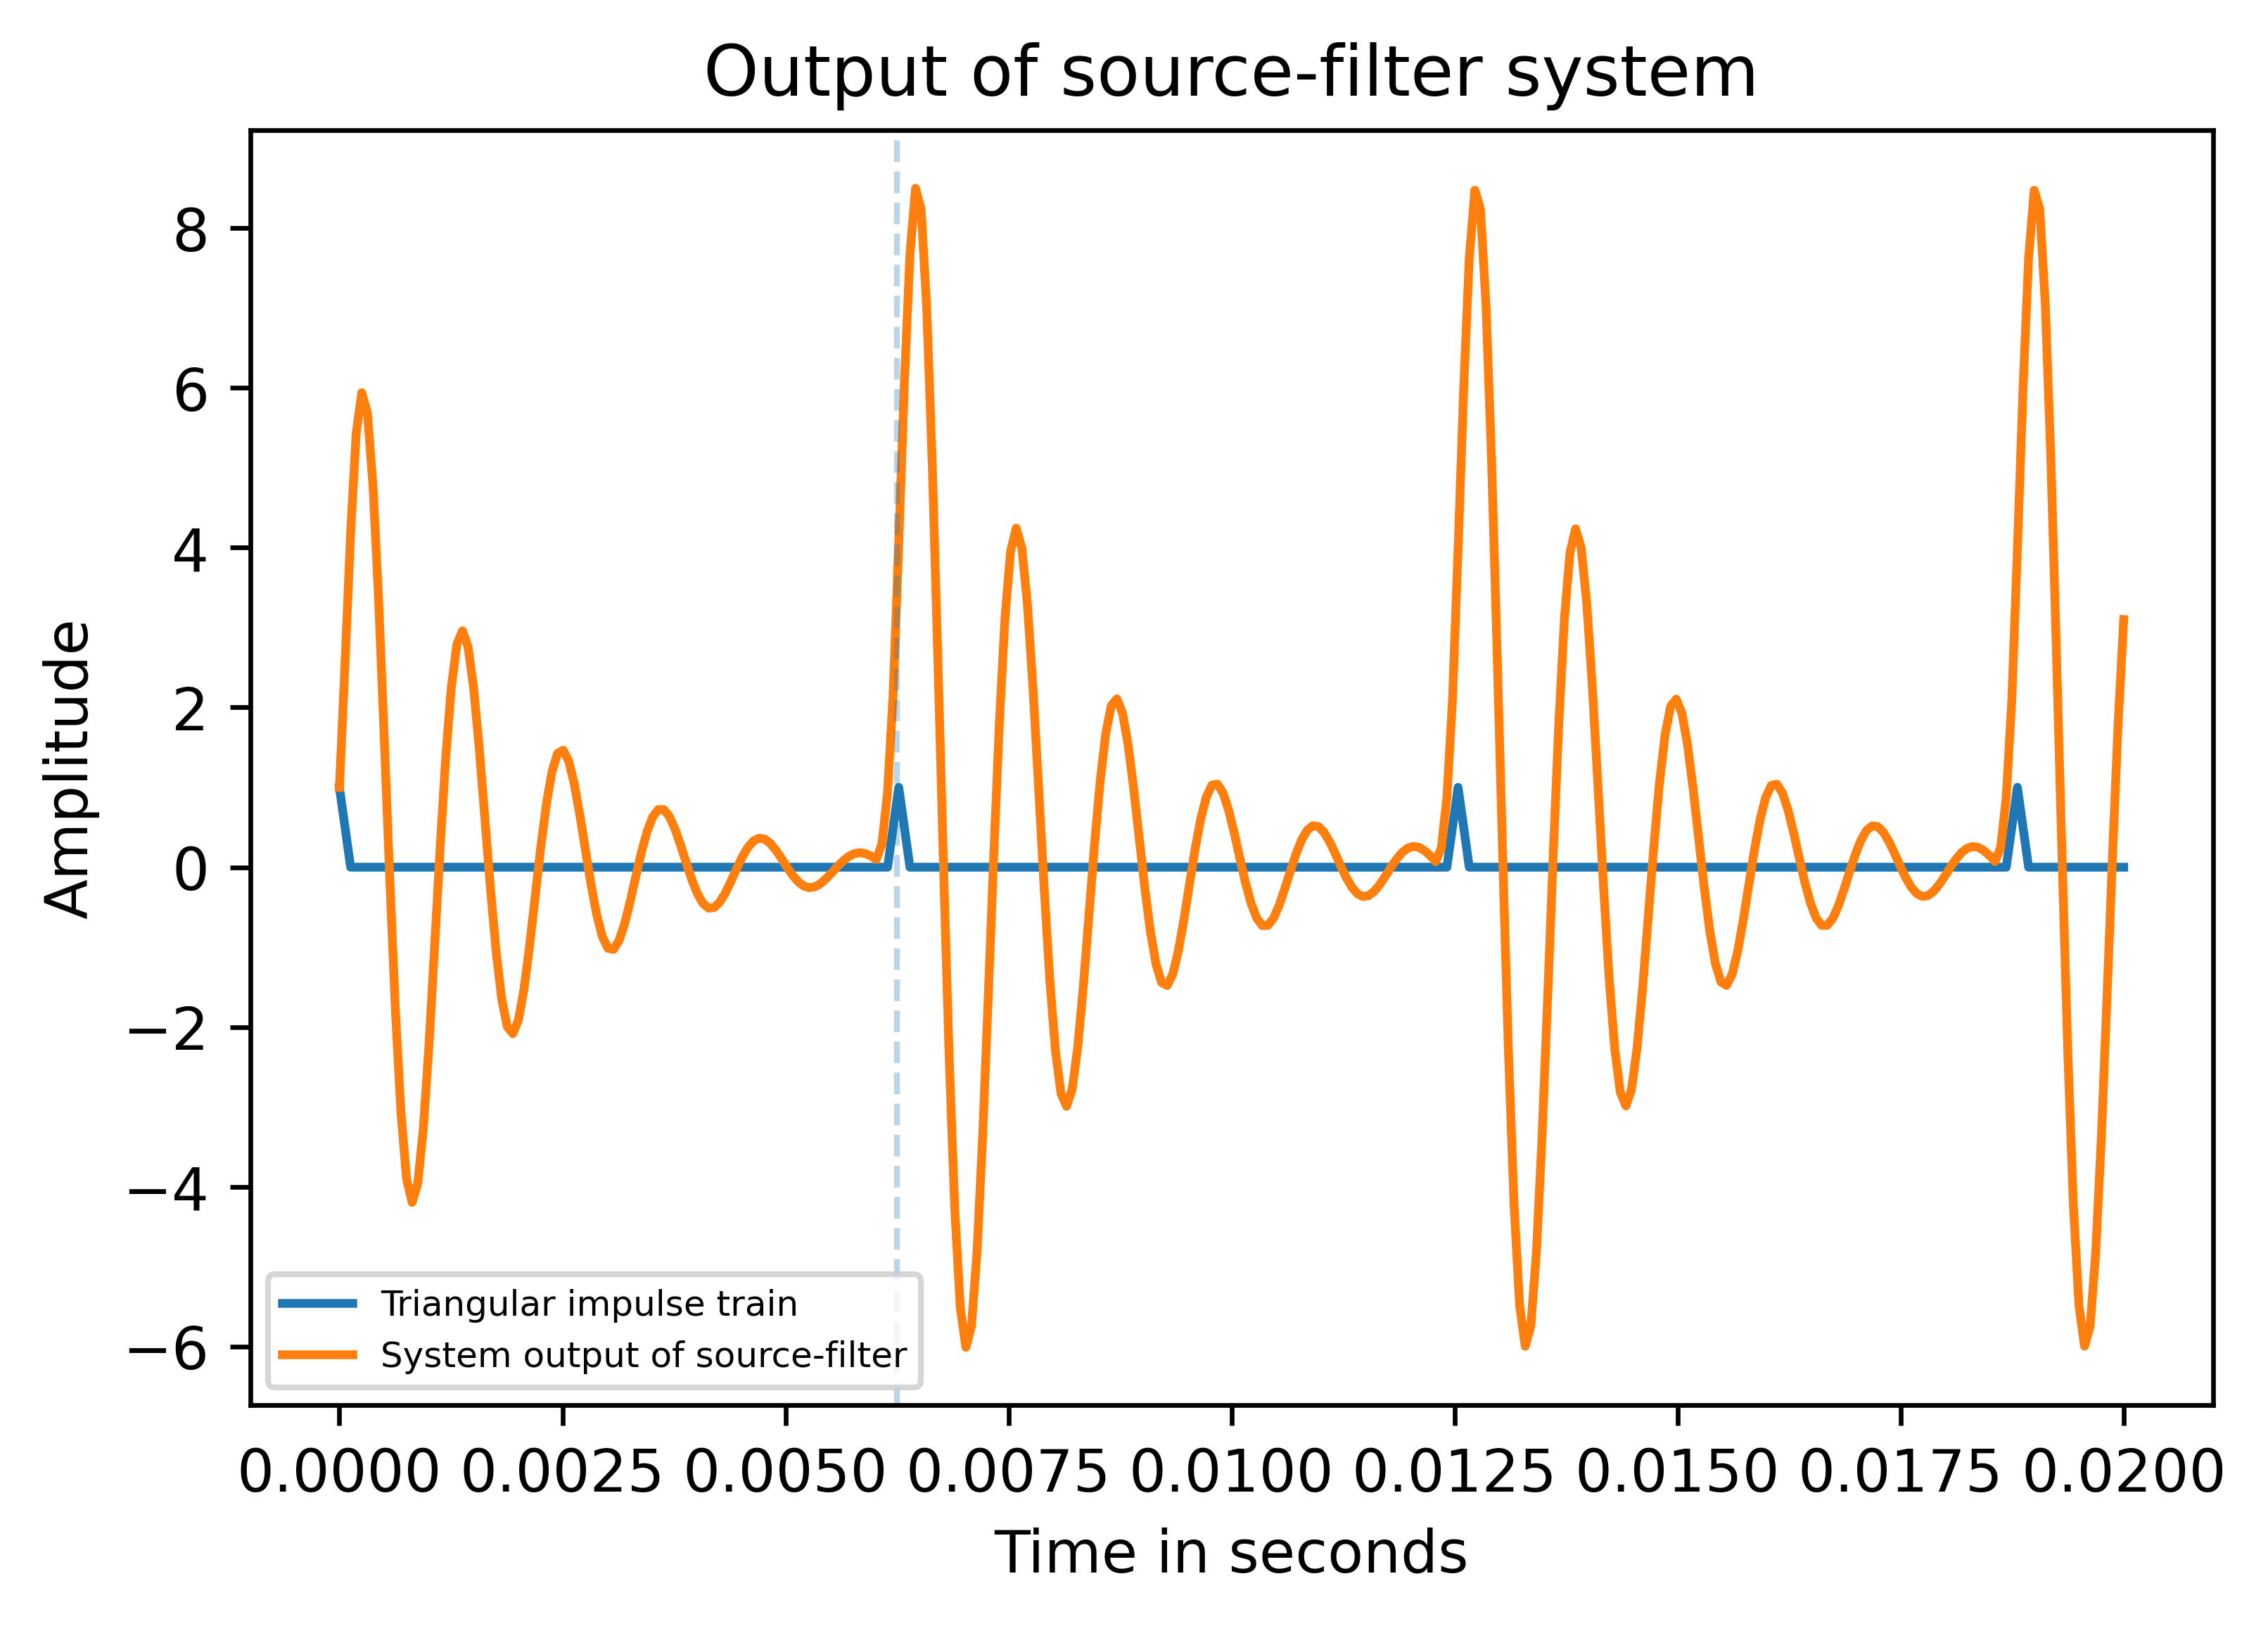

In [112]:
plt.plot(timeSpace, triagInput(P, samp, width = width))
plt.plot(timeSpace, computeResponse(triagInput(P, samp, width = 4), samp, r, theta))
plt.axvline(1/F0, linestyle = '--', alpha = 0.3, linewidth = 1)
plt.legend(["Triangular impulse train", "System output of source-filter"],fontsize=6)
plt.xlabel("Time in seconds")
plt.ylabel("Amplitude")
plt.title("Output of source-filter system")

In [113]:
F0 = 160
dur = 0.5
timeSpace = np.linspace(0, dur, int(dur*fs))
P = fs//F0
samp = len(timeSpace)
width = 2#no of samples on either side of the peak for the triangular input
y = computeResponse(triagInput(P, samp, width = 4), samp, r, theta)#computing the output
scaled = np.int16(y/np.max(np.abs(y)) * 32767)#scaling the output to 16bit integers for writing to wav file
write('qn2.wav', fs, scaled)

## Comments on Qn2 : 
Please listen to qn2.wav file for the audio
1. Waveforms : 
We see F0 manifest as the pitch of the sound, that is, the entire 1/F0 = 0.00625 seconds duration window repeats F0 times in a second. (We have a triangular pulse now so components of the next pulse manifest in the previous hence we see that the output signal rises above a littl ebefore this!)
F1 is the frequency of the oscillations in this window. We see that is is decaying and this decay is due to our impulse repsonse.

2. We hear a constant low pitch 'a' sound

# Question 3

### Part 1

In [114]:
f1 = 300 #formant frequency
b1 = 100 #bandwith
fs = 16000 #sampling frequency
T = 1.0/fs #samples

In [115]:
F0 = 120
dur = 0.02
timeSpace = np.linspace(0, dur, int(dur*fs))
P = fs//F0
samp = len(timeSpace)
width = 2#no of samples on either side of the peak for the triangular input

In [116]:
r = np.exp(-b1*pi*T)
theta = 2*pi*f1*T

Text(0.5, 1.0, 'System output of source-filter')

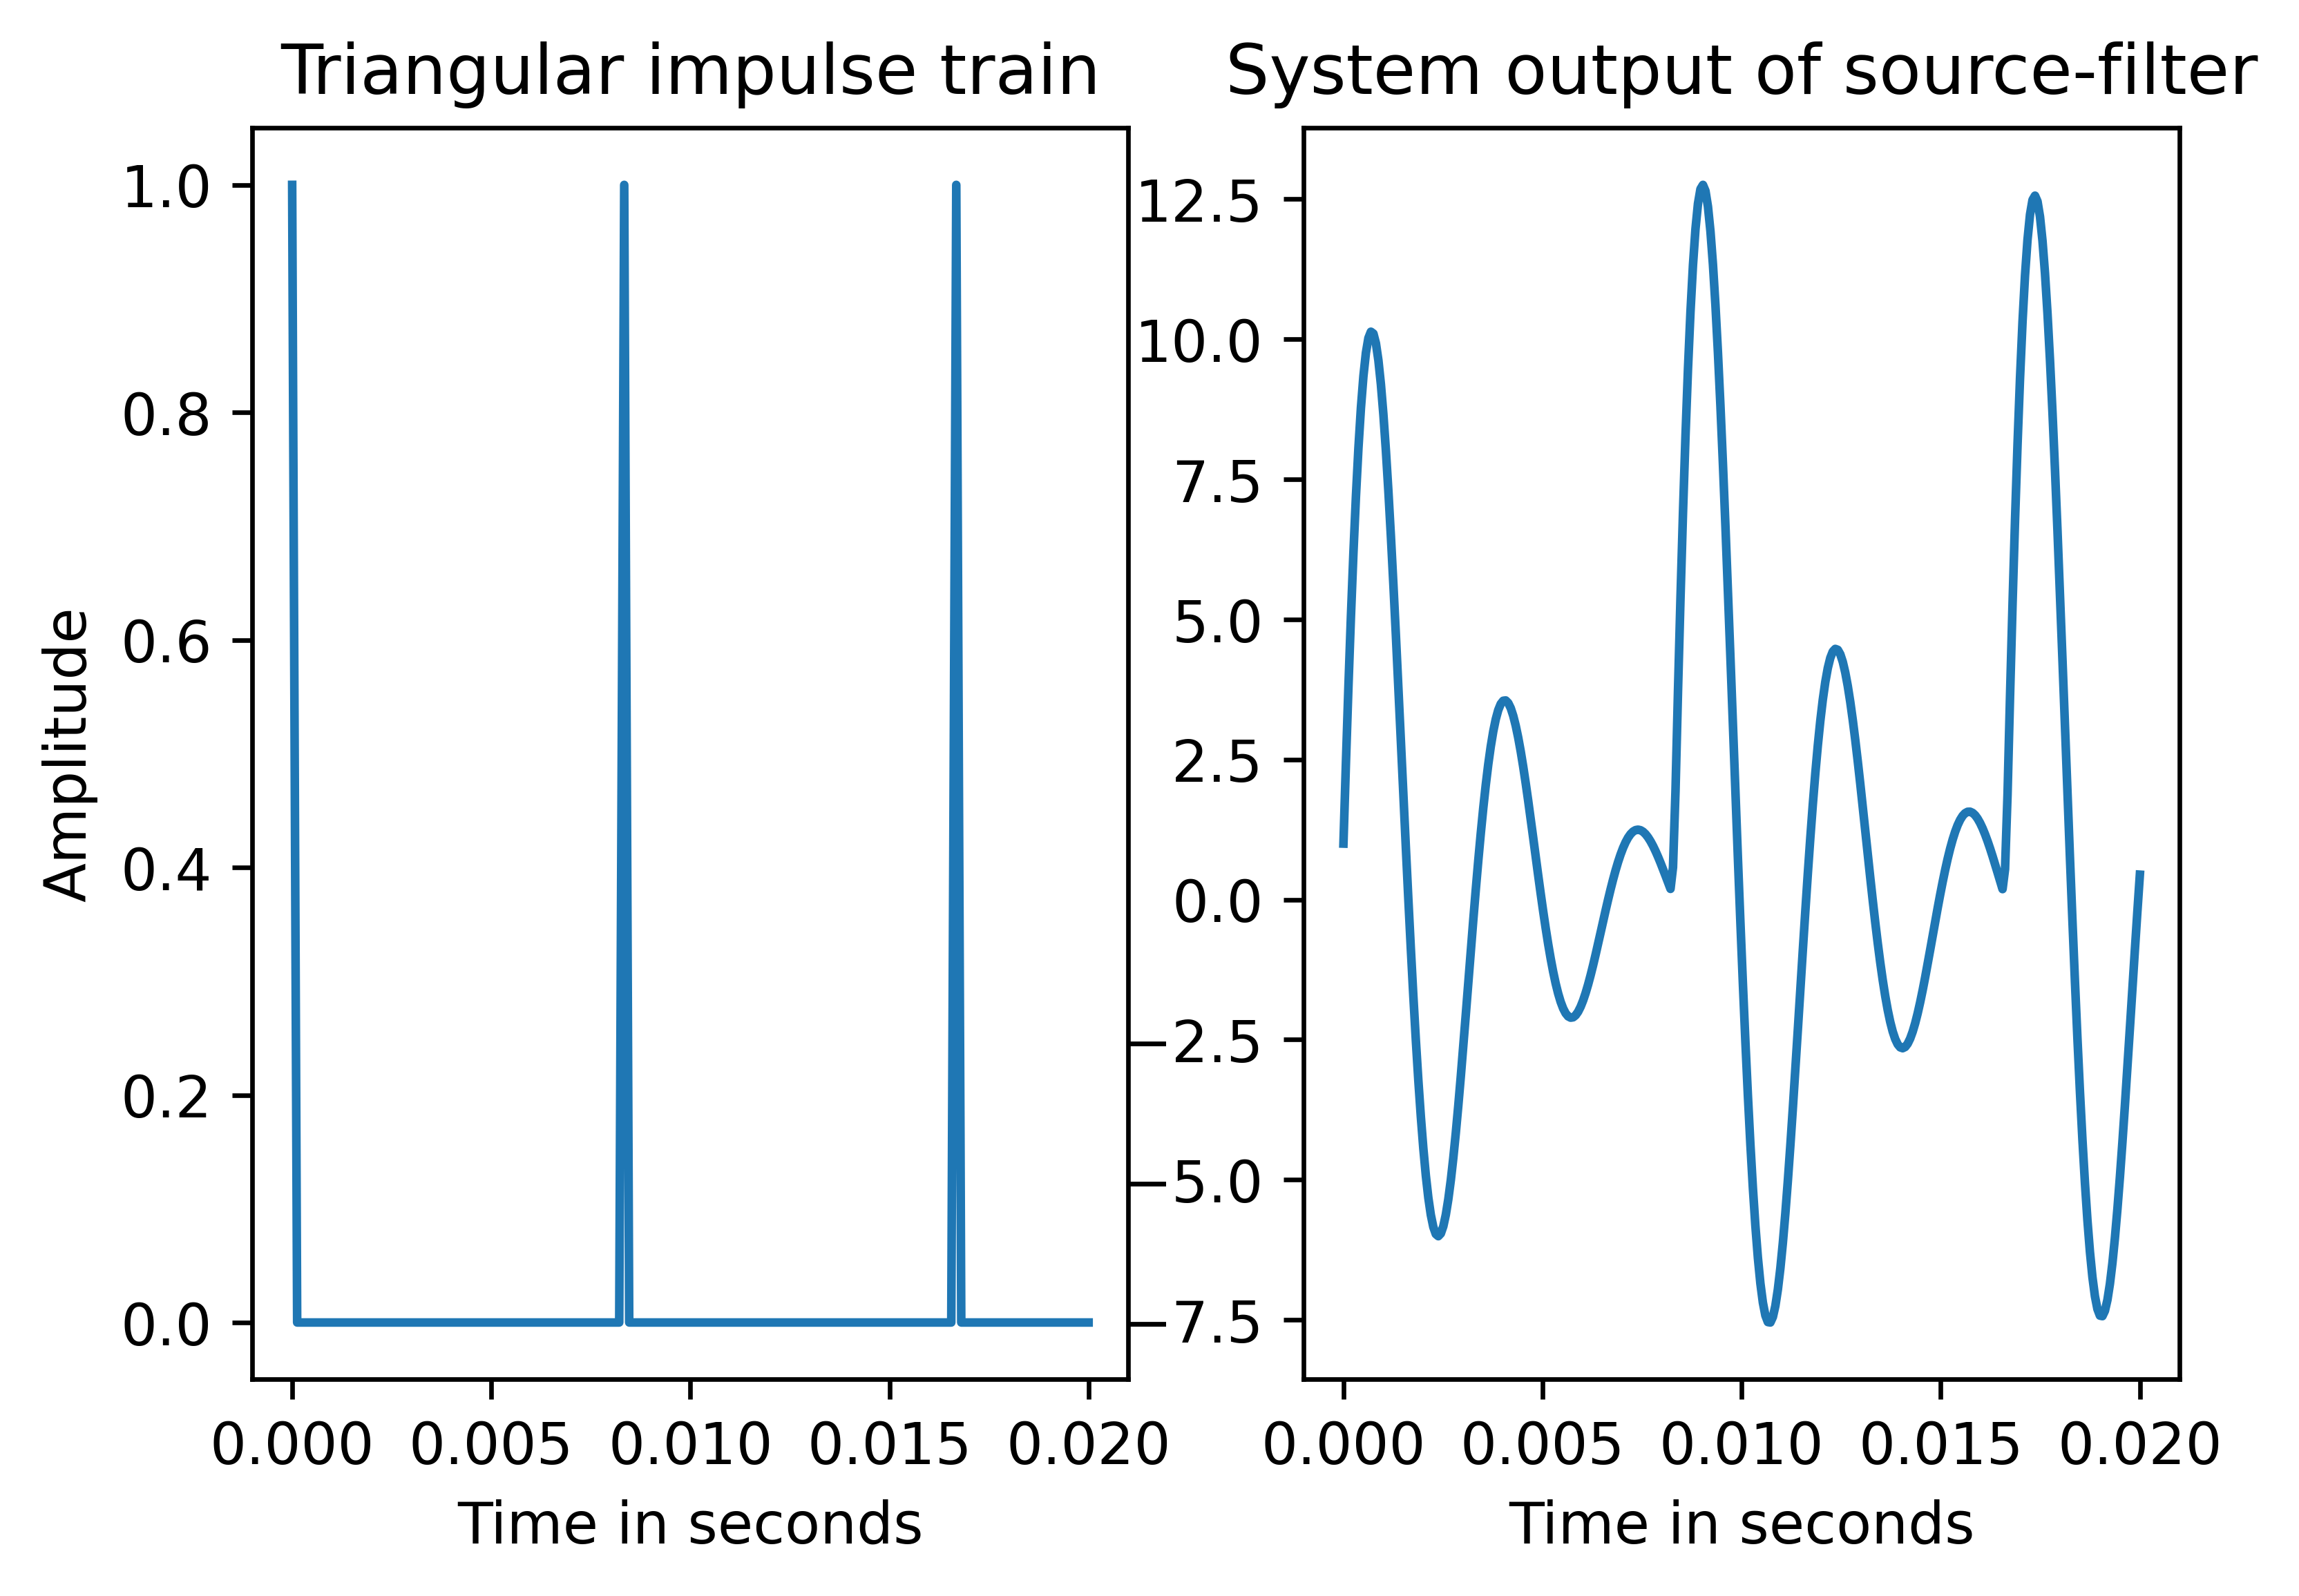

In [117]:
plt.subplot(1, 2, 1)
plt.plot(timeSpace, triagInput(P, samp, width = width))
plt.xlabel("Time in seconds")
plt.ylabel("Amplitude")
plt.title("Triangular impulse train")
plt.subplot(1, 2, 2)
plt.plot(timeSpace, computeResponse(triagInput(P, samp, width = width), samp, r, theta))
plt.xlabel("Time in seconds")
plt.title("System output of source-filter")

Text(0.5, 1.0, 'Output of source-filter system')

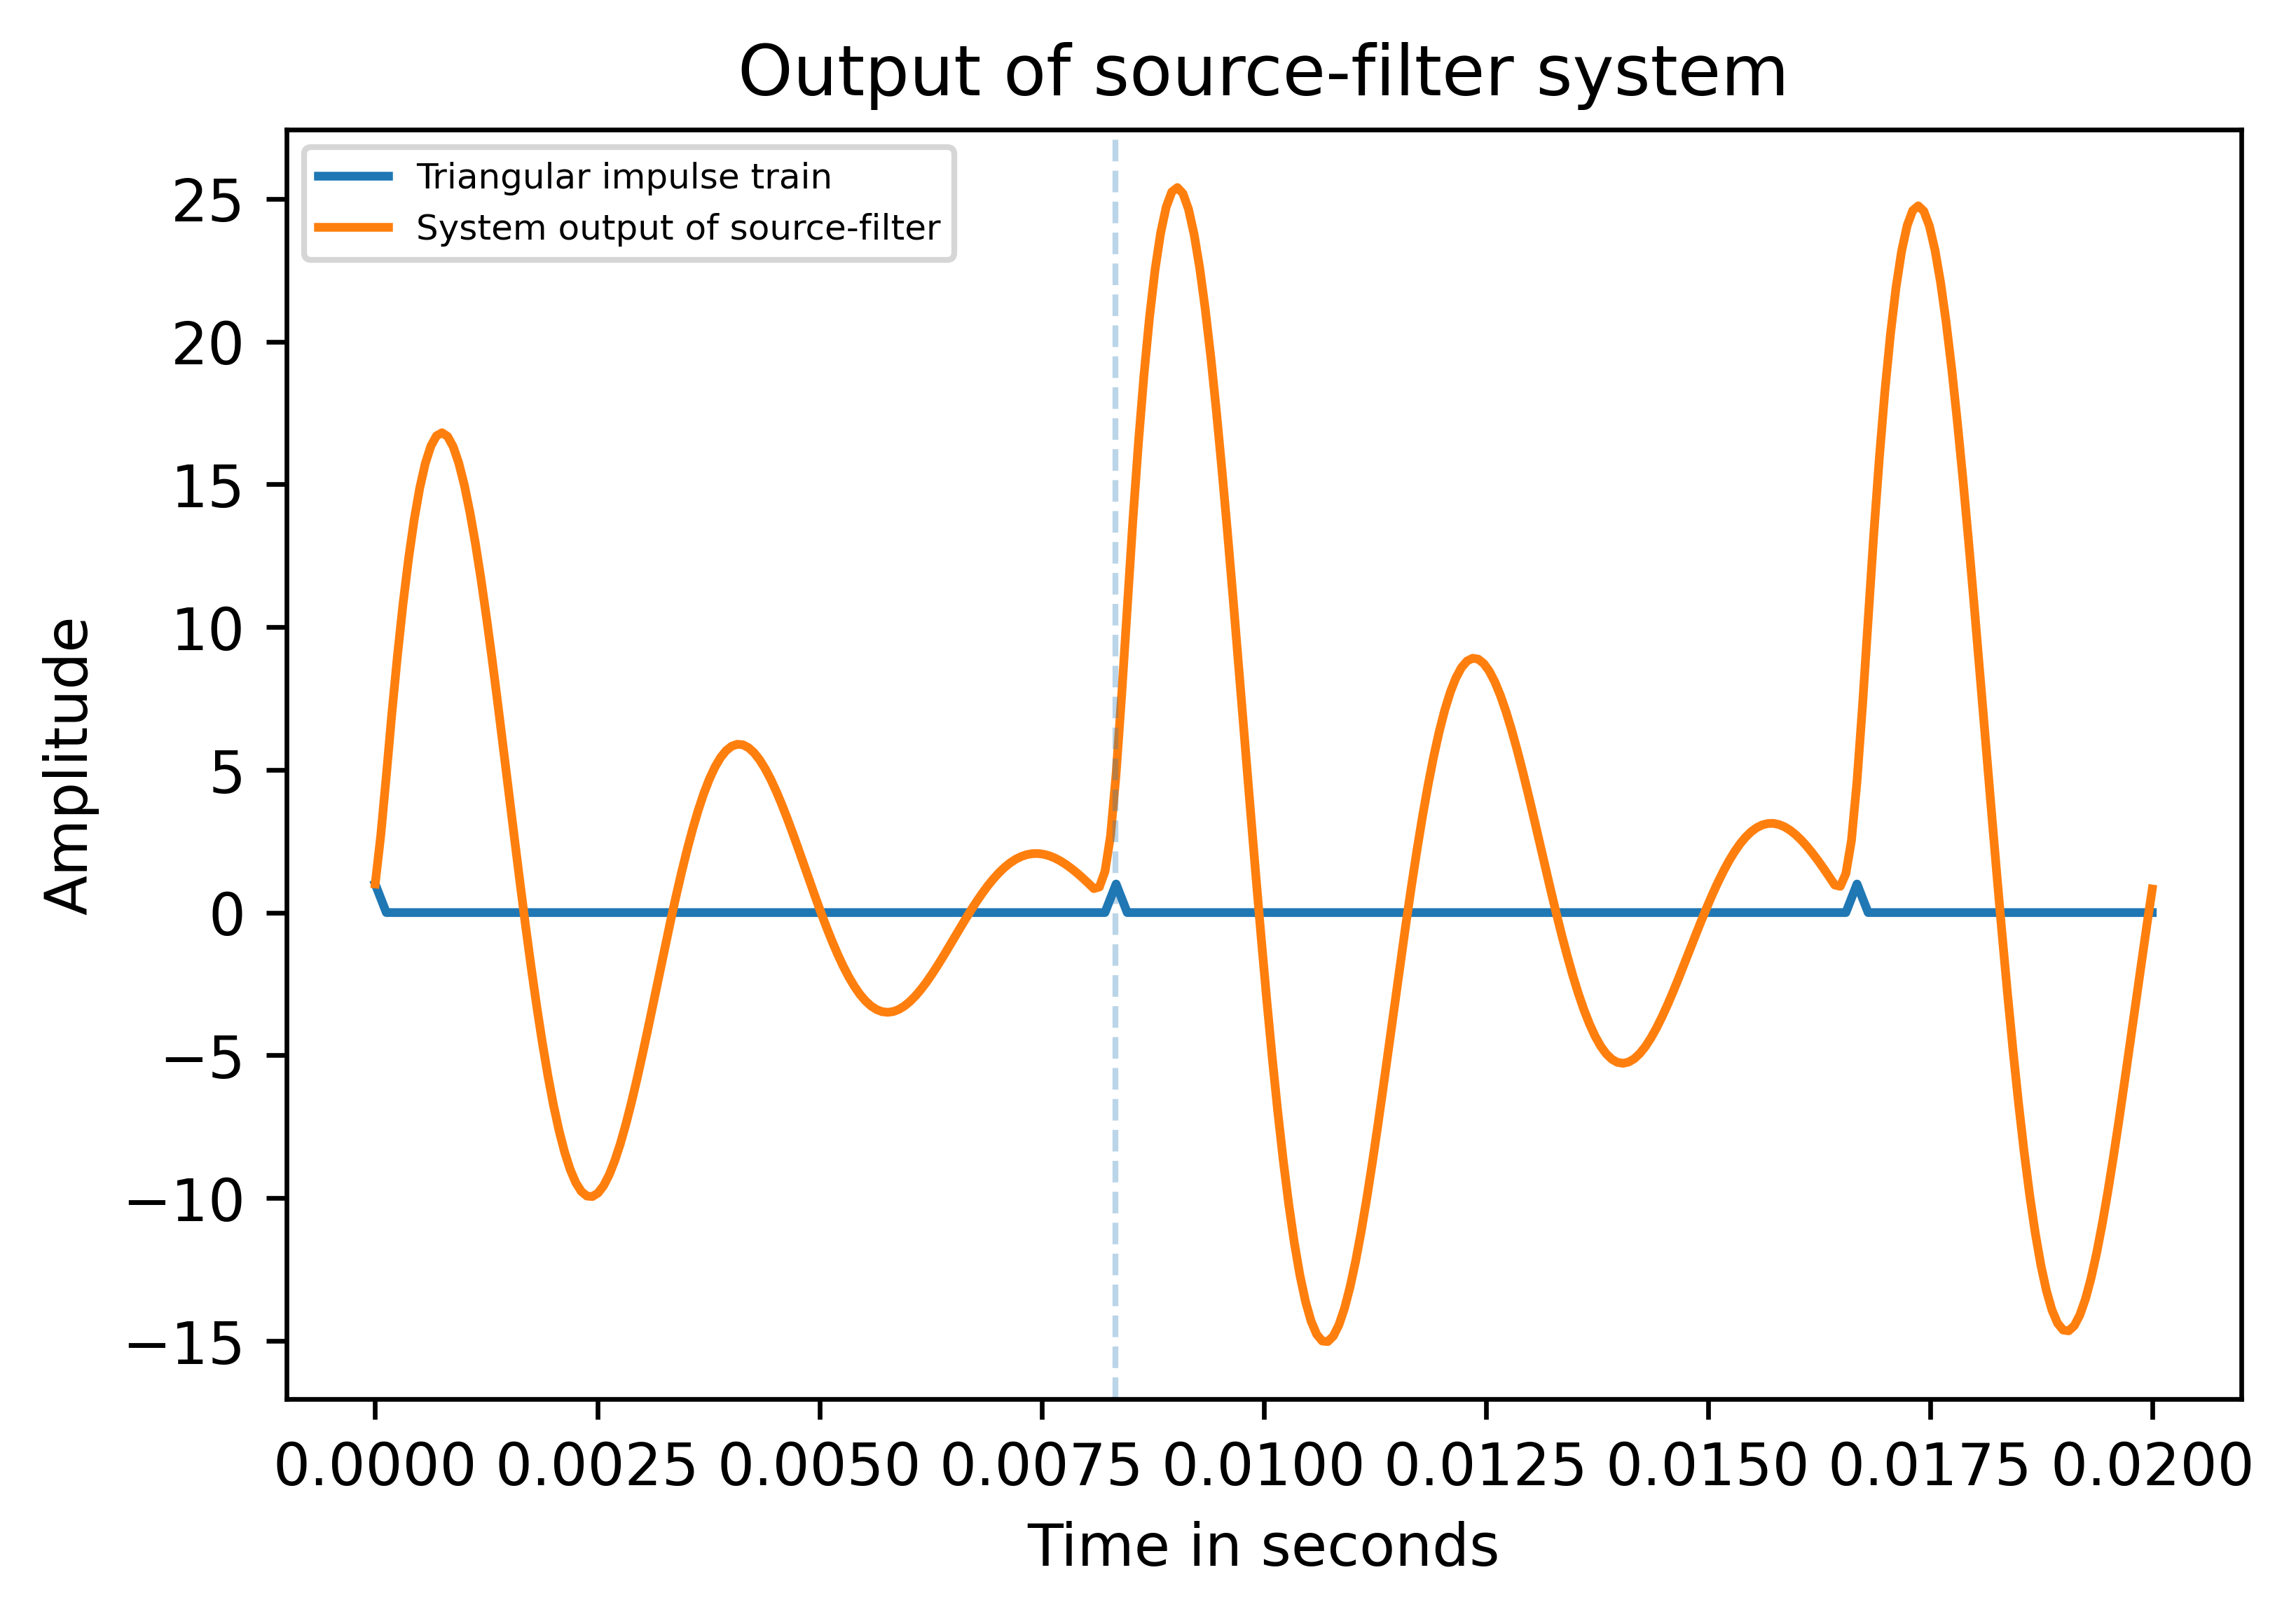

In [118]:
plt.plot(timeSpace, triagInput(P, samp, width = width))
plt.plot(timeSpace, computeResponse(triagInput(P, samp, width = 4), samp, r, theta))
plt.axvline(1/F0, linestyle = '--', alpha = 0.3, linewidth = 1)
plt.legend(["Triangular impulse train", "System output of source-filter"],fontsize=6)
plt.xlabel("Time in seconds")
plt.ylabel("Amplitude")
plt.title("Output of source-filter system")

In [119]:
F0 = 120
dur = 0.5
timeSpace = np.linspace(0, dur, int(dur*fs))
P = fs//F0
samp = len(timeSpace)
width = 2#no of samples on either side of the peak for the triangular input
y = computeResponse(triagInput(P, samp, width = 4), samp, r, theta)#computing the output
scaled = np.int16(y/np.max(np.abs(y)) * 32767)#scaling the output to 16bit integers for writing to wav file
write('qn3a.wav', fs, scaled)

### Part 2

In [120]:
f1 = 1100 #formant frequency
b1 = 200 #bandwith
fs = 16000 #sampling frequency
T = 1.0/fs #samples

In [121]:
F0 = 120
dur = 0.02
timeSpace = np.linspace(0, dur, int(dur*fs))
P = fs//F0
samp = len(timeSpace)
width = 2#no of samples on either side of the peak for the triangular input

In [122]:
r = np.exp(-b1*pi*T)
theta = 2*pi*f1*T

Text(0.5, 1.0, 'System output of source-filter')

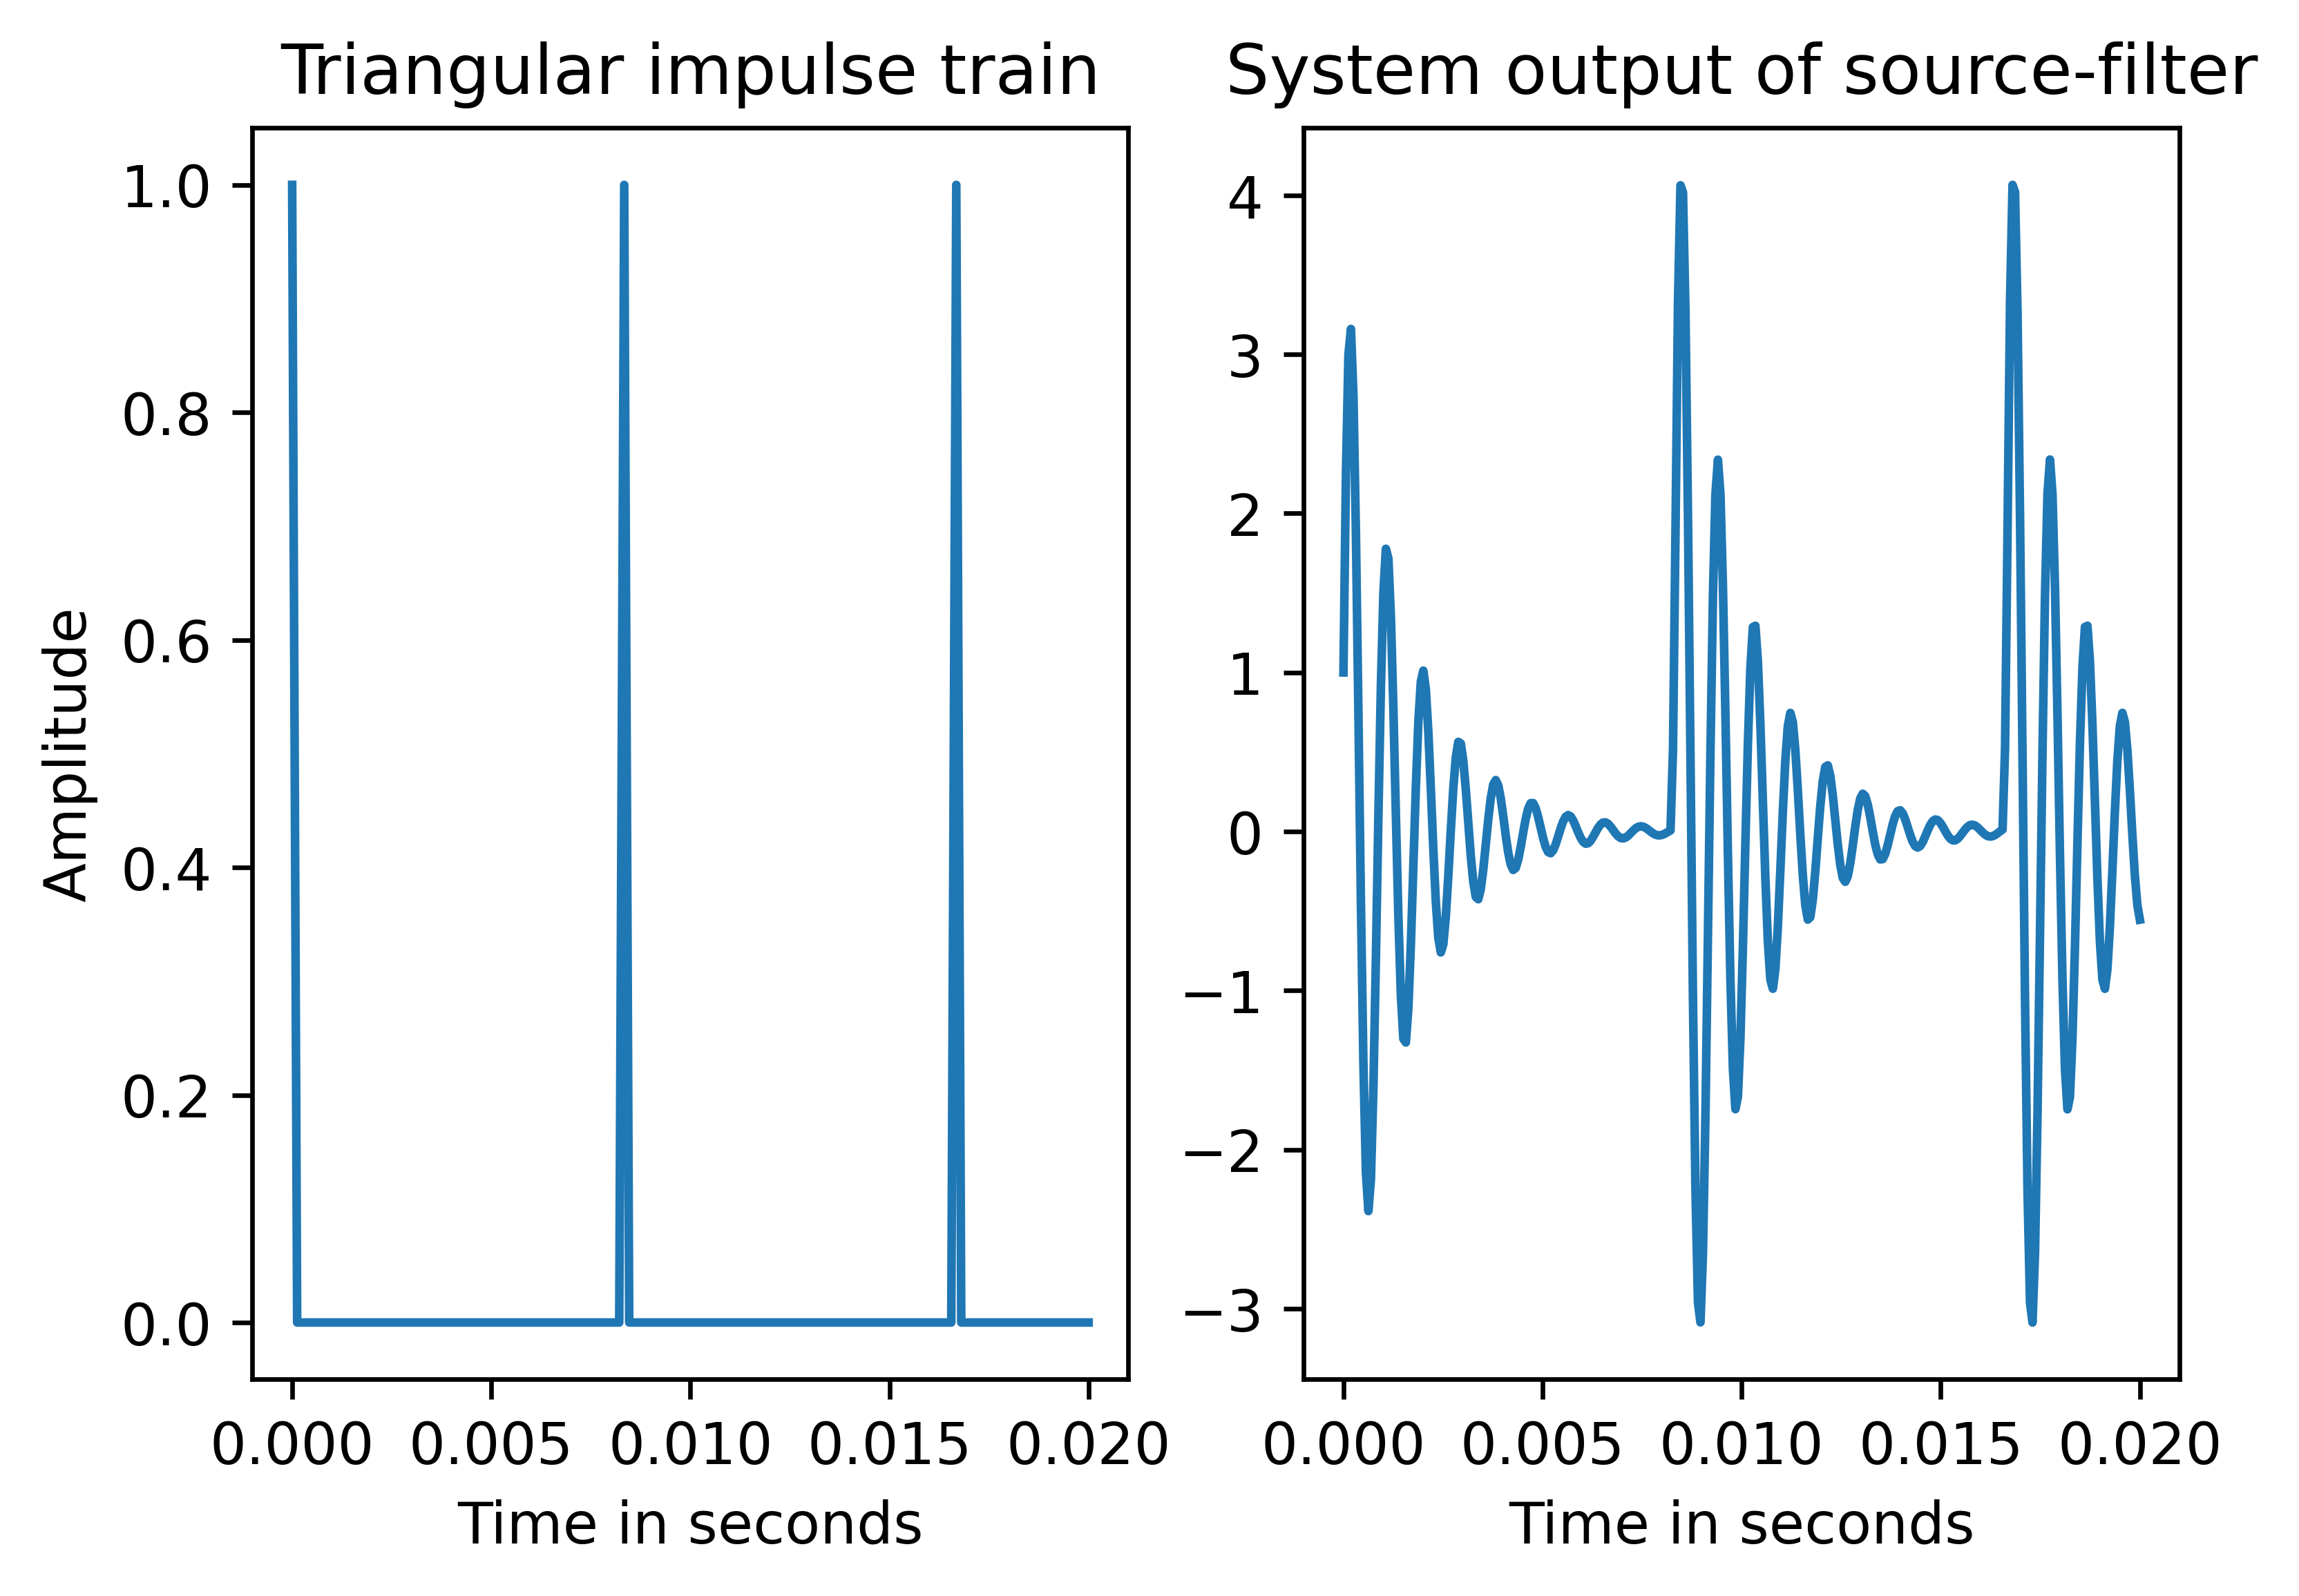

In [123]:
plt.subplot(1, 2, 1)
plt.plot(timeSpace, triagInput(P, samp, width = width))
plt.xlabel("Time in seconds")
plt.ylabel("Amplitude")
plt.title("Triangular impulse train")
plt.subplot(1, 2, 2)
plt.plot(timeSpace, computeResponse(triagInput(P, samp, width = width), samp, r, theta))
plt.xlabel("Time in seconds")
plt.title("System output of source-filter")

Text(0.5, 1.0, 'Output of source-filter system')

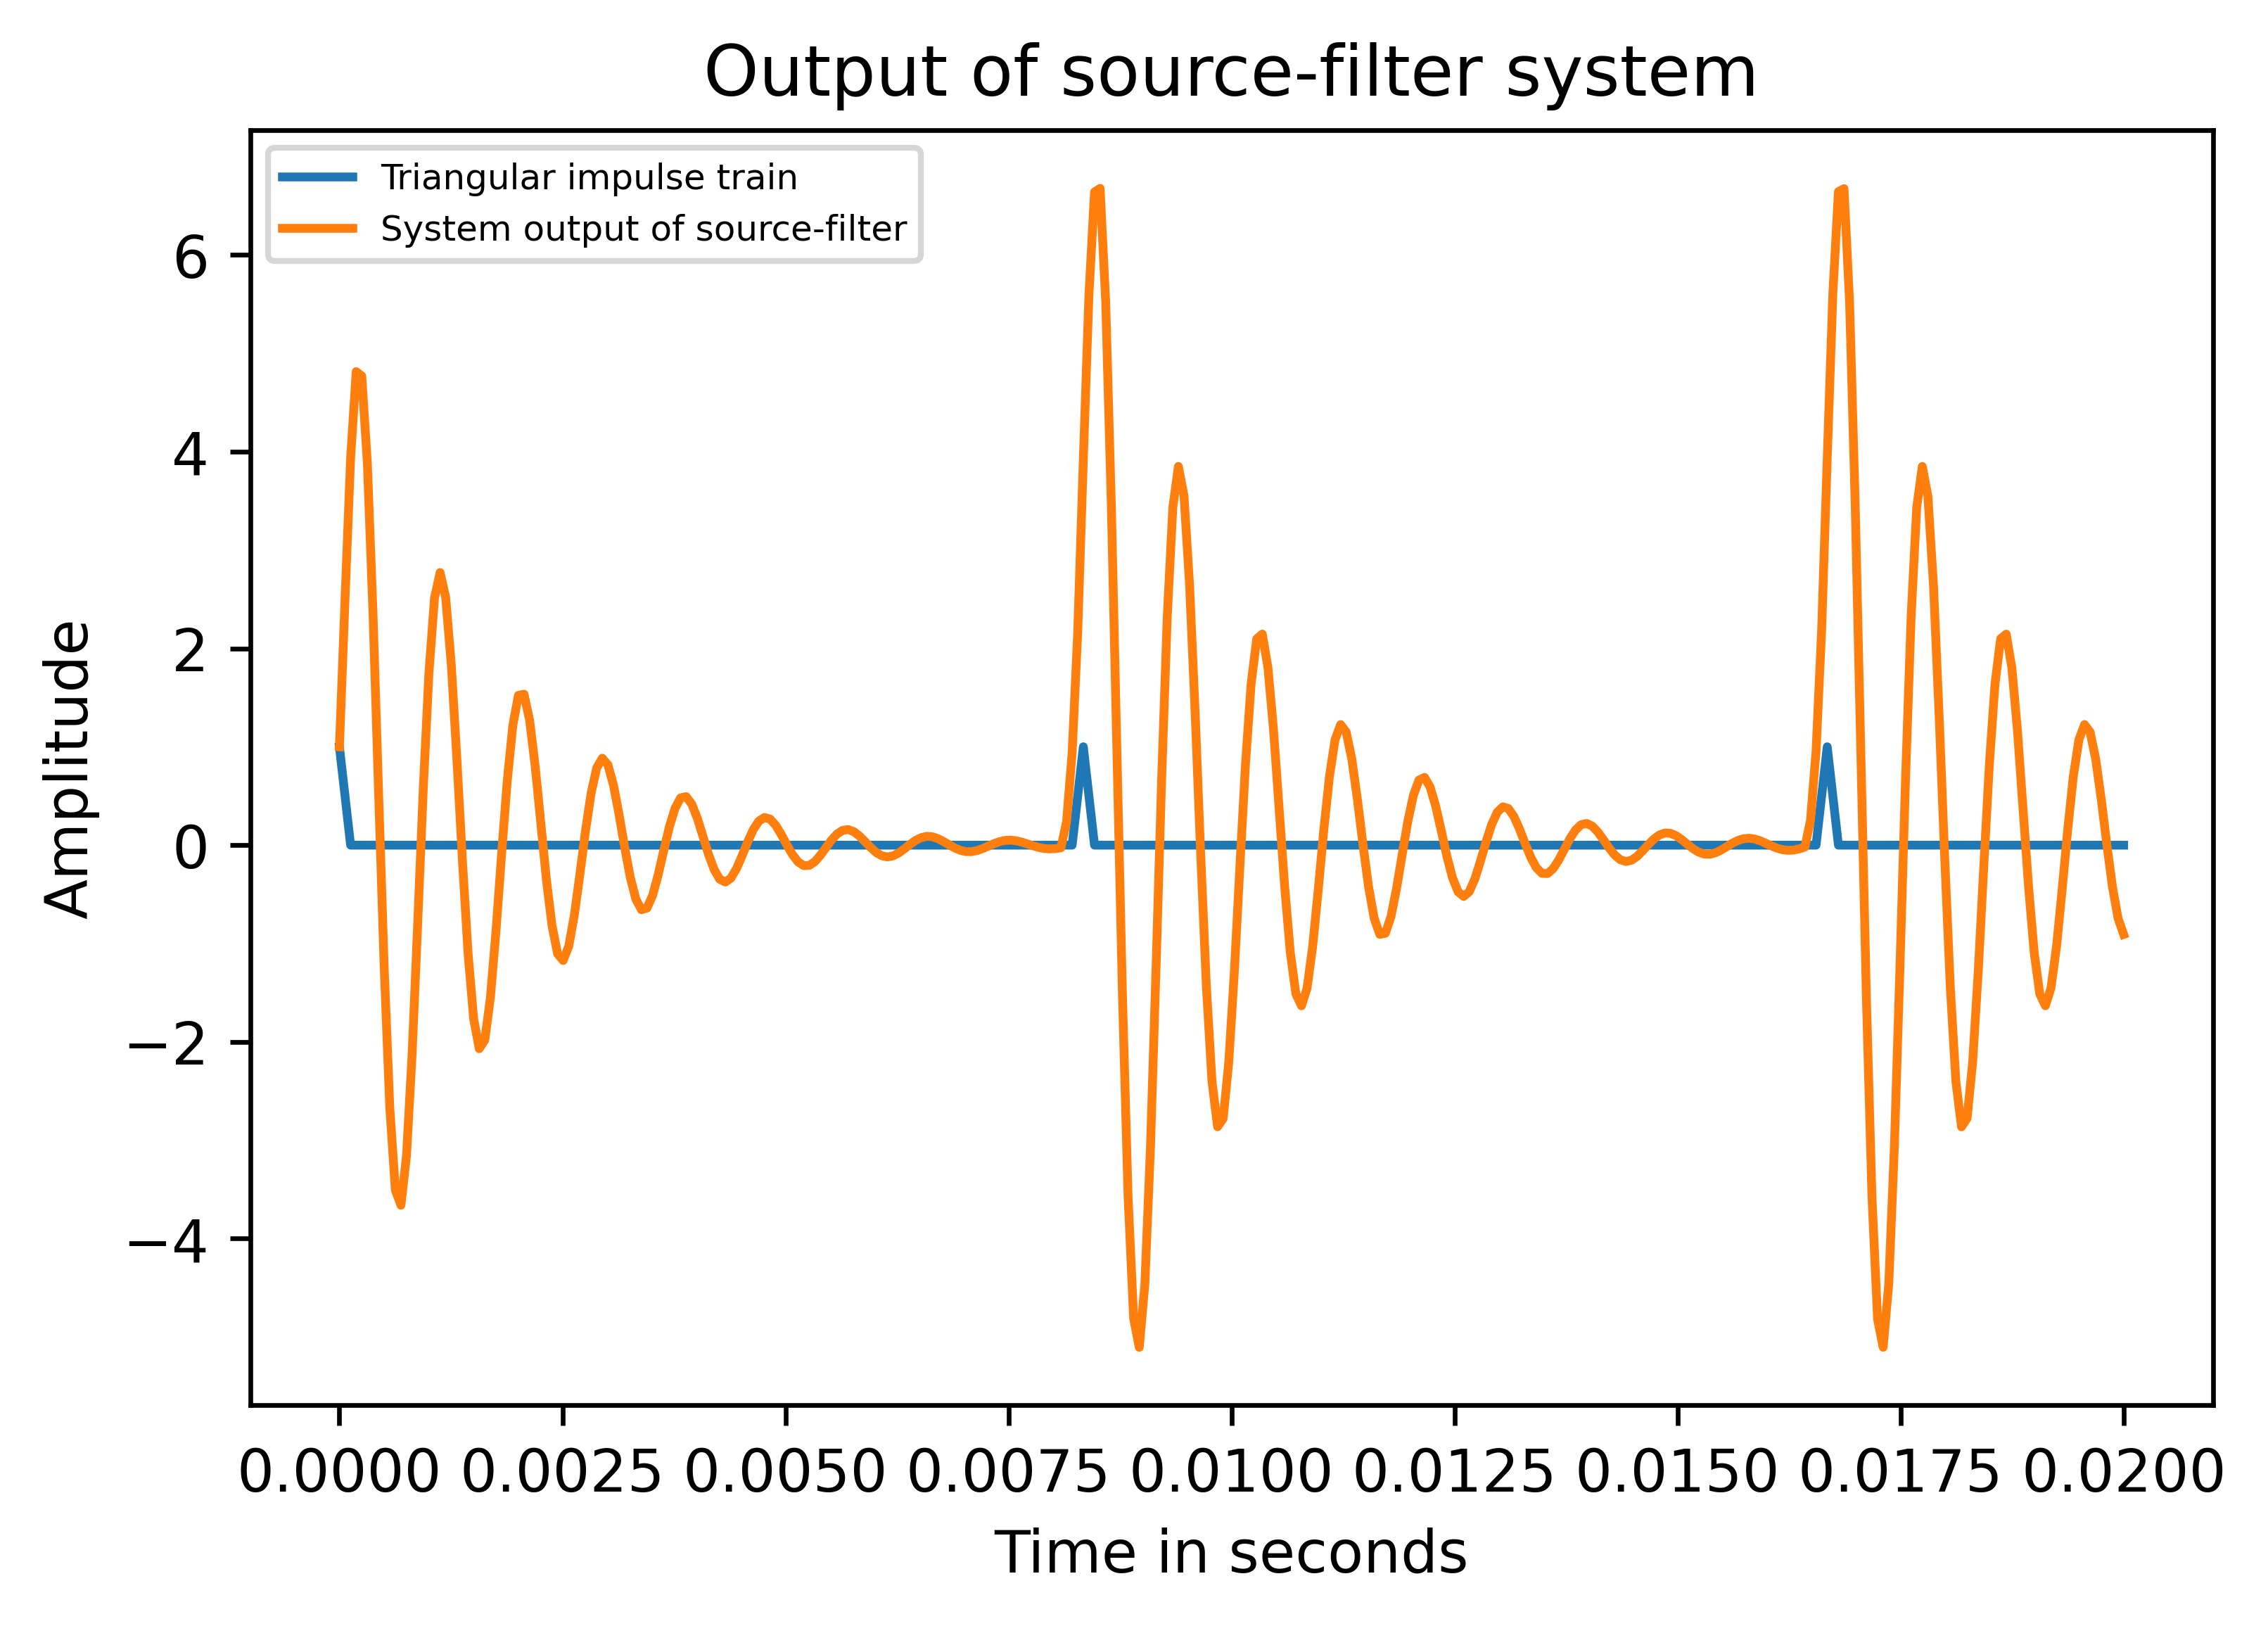

In [124]:
plt.plot(timeSpace, triagInput(P, samp, width = width))
plt.plot(timeSpace, computeResponse(triagInput(P, samp, width = 4), samp, r, theta))
plt.legend(["Triangular impulse train", "System output of source-filter"],fontsize=6)
plt.xlabel("Time in seconds")
plt.ylabel("Amplitude")
plt.title("Output of source-filter system")

In [125]:
F0 = 120
dur = 0.5
timeSpace = np.linspace(0, dur, int(dur*fs))
P = fs//F0
samp = len(timeSpace)
width = 2#no of samples on either side of the peak for the triangular input
y = computeResponse(triagInput(P, samp, width = 4), samp, r, theta)#computing the output
scaled = np.int16(y/np.max(np.abs(y)) * 32767)#scaling the output to 16bit integers for writing to wav file
write('qn3b.wav', fs, scaled)

### Part 3

In [126]:
f1 = 300 #formant frequency
b1 = 100 #bandwith
fs = 16000 #sampling frequency
T = 1.0/fs #samples

In [127]:
F0 = 180
dur = 0.02
timeSpace = np.linspace(0, dur, int(dur*fs))
P = fs//F0
samp = len(timeSpace)
width = 2#no of samples on either side of the peak for the triangular input

In [128]:
r = np.exp(-b1*pi*T)
theta = 2*pi*f1*T

Text(0.5, 1.0, 'System output of source-filter')

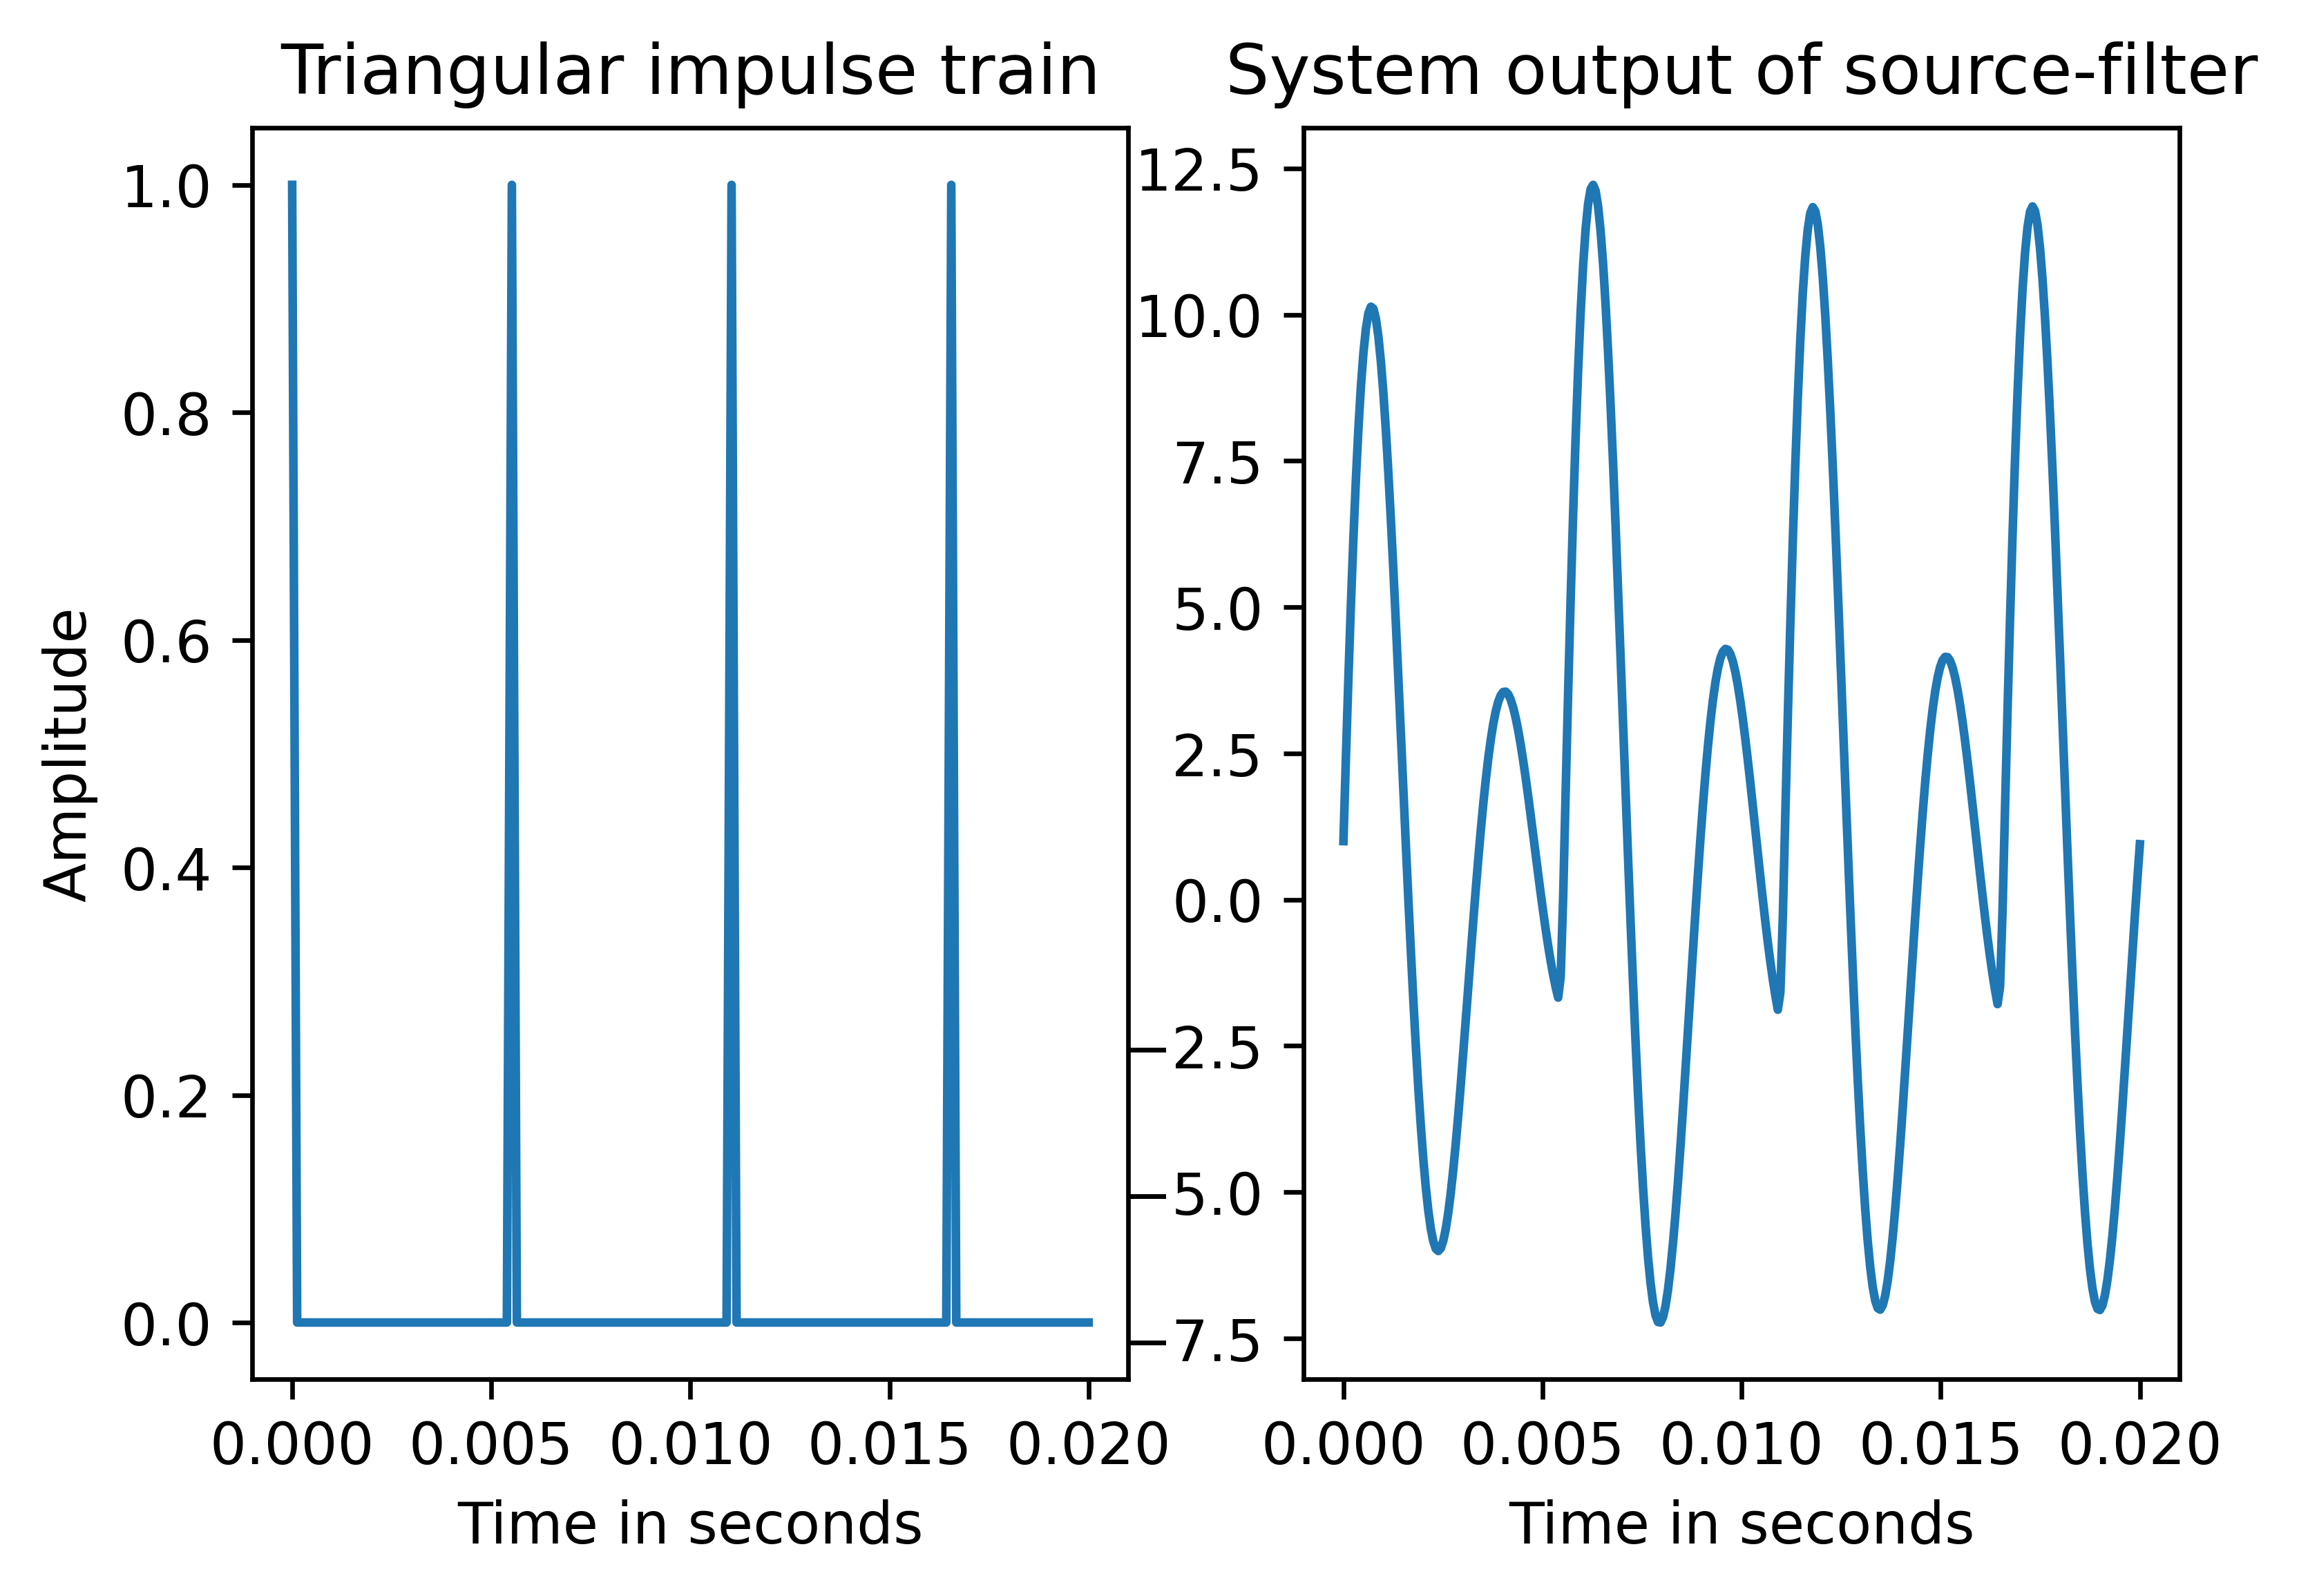

In [129]:
plt.subplot(1, 2, 1)
plt.plot(timeSpace, triagInput(P, samp, width = width))
plt.xlabel("Time in seconds")
plt.ylabel("Amplitude")
plt.title("Triangular impulse train")
plt.subplot(1, 2, 2)
plt.plot(timeSpace, computeResponse(triagInput(P, samp, width = width), samp, r, theta))
plt.xlabel("Time in seconds")
plt.title("System output of source-filter")

Text(0.5, 1.0, 'Output of source-filter system')

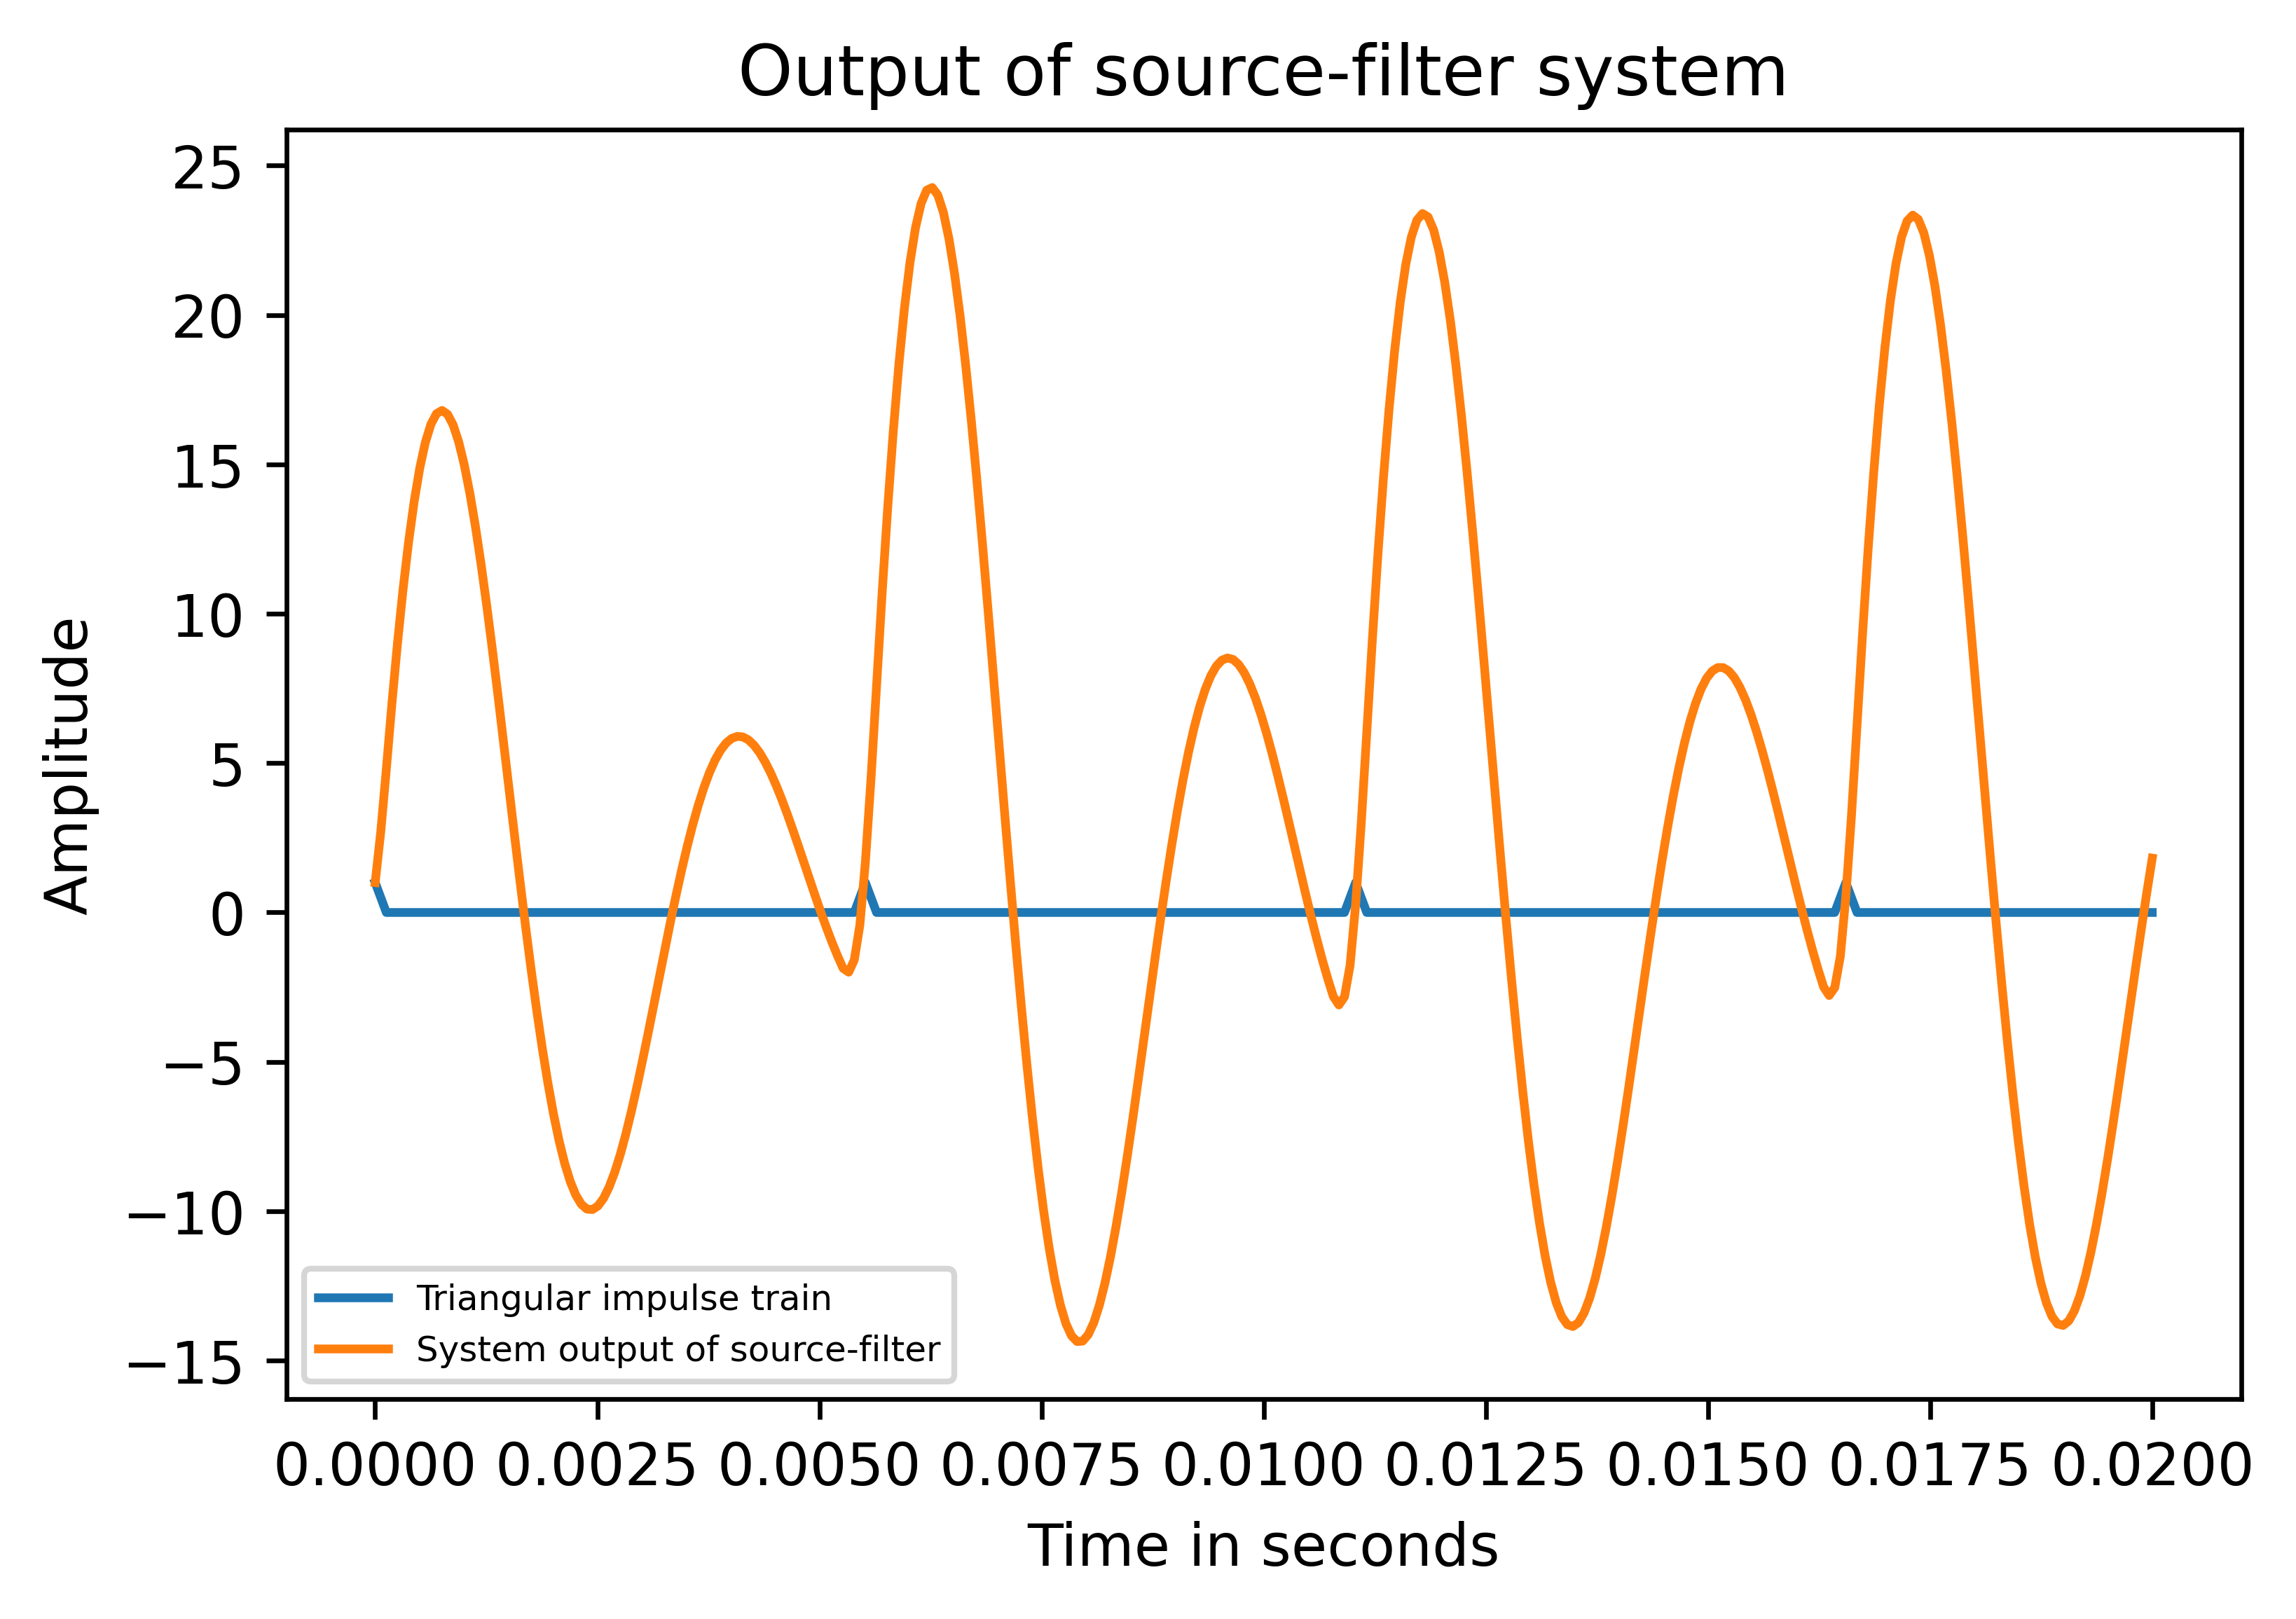

In [130]:
plt.plot(timeSpace, triagInput(P, samp, width = width))
plt.plot(timeSpace, computeResponse(triagInput(P, samp, width = 4), samp, r, theta))
plt.legend(["Triangular impulse train", "System output of source-filter"],fontsize=6)
plt.xlabel("Time in seconds")
plt.ylabel("Amplitude")
plt.title("Output of source-filter system")

In [131]:
F0 = 180
dur = 0.5
timeSpace = np.linspace(0, dur, int(dur*fs))
P = fs//F0
samp = len(timeSpace)
width = 2#no of samples on either side of the peak for the triangular input
y = computeResponse(triagInput(P, samp, width = 4), samp, r, theta)#computing the output
scaled = np.int16(y/np.max(np.abs(y)) * 32767)#scaling the output to 16bit integers for writing to wav file
write('qn3c.wav', fs, scaled)

## Comments on Qn3

Please listen to qn3a.wav for (a) part, qn3b.wav file for the (b) part and qn3c.wav file for the (c) part

### Comparison of the sounds
1. (a) and (c) have the same formant frequency but different F0 => (c) appears to sound the same as (a) but (c) has a higher pitch than (a)
2. (b) has the same F0 as (a) but different formant frequency implying that the sound heard is different as is the case but the pitch of the voice is th same.

### Comparison of the waveforms:
1. (a) and (c) have the same F1 and thus the oscillations in every (1/F0) window are the same. However F0 for (c) is higher, implying that these windows appear every 1/180 seconds compared to every 1/120 seconds for (a). Thus, in the case of (a) the signal attenuates more since the duration of 1 period is more as compared to (c) where the period is smaller and so less attenuation occurs.
2. In the case of (b), it has the same F0 as (a) thus implying that each 1/F0 period occurs at the same time for both i.e pitch is the same but the number of oscillations per period in the case of (b) is much higher than that in (a) since F1 for (b) is larger than (a). Thus, although F0 is the same (b) appears to have more attenuation simply becuase the peaks appear more often due to the larger F1 but (a) and (b) both have the same extent of attenuation.

# Question 4

## /a/ @ 120Hz

In [132]:
f1 = 730 #formant frequency
f2 = 1090
f3 = 2440
b1 = 100 #bandwith
fs = 16000 #sampling frequency
T = 1.0/fs #samples

In [133]:
F0 = 120
dur = 0.01
timeSpace = np.linspace(0, dur, int(dur*fs))
P = fs//F0
samp = len(timeSpace)
width = 2#no of samples on either side of the peak for the triangular input

In [134]:
r1 = np.exp(-b1*pi*T)
theta1 = 2*pi*f1*T
r2 = np.exp(-b1*pi*T)
theta2 = 2*pi*f2*T
r3 = np.exp(-b1*pi*T)
theta3 = 2*pi*f3*T

In [135]:
y1 = computeResponse(triagInput(P, samp, width = width), samp, r1, theta1)
y2 = computeResponse(y1, samp, r2, theta2)
y3 = computeResponse(y1, samp, r3, theta3)

Text(0.5, 1.0, 'System output of source-filter')

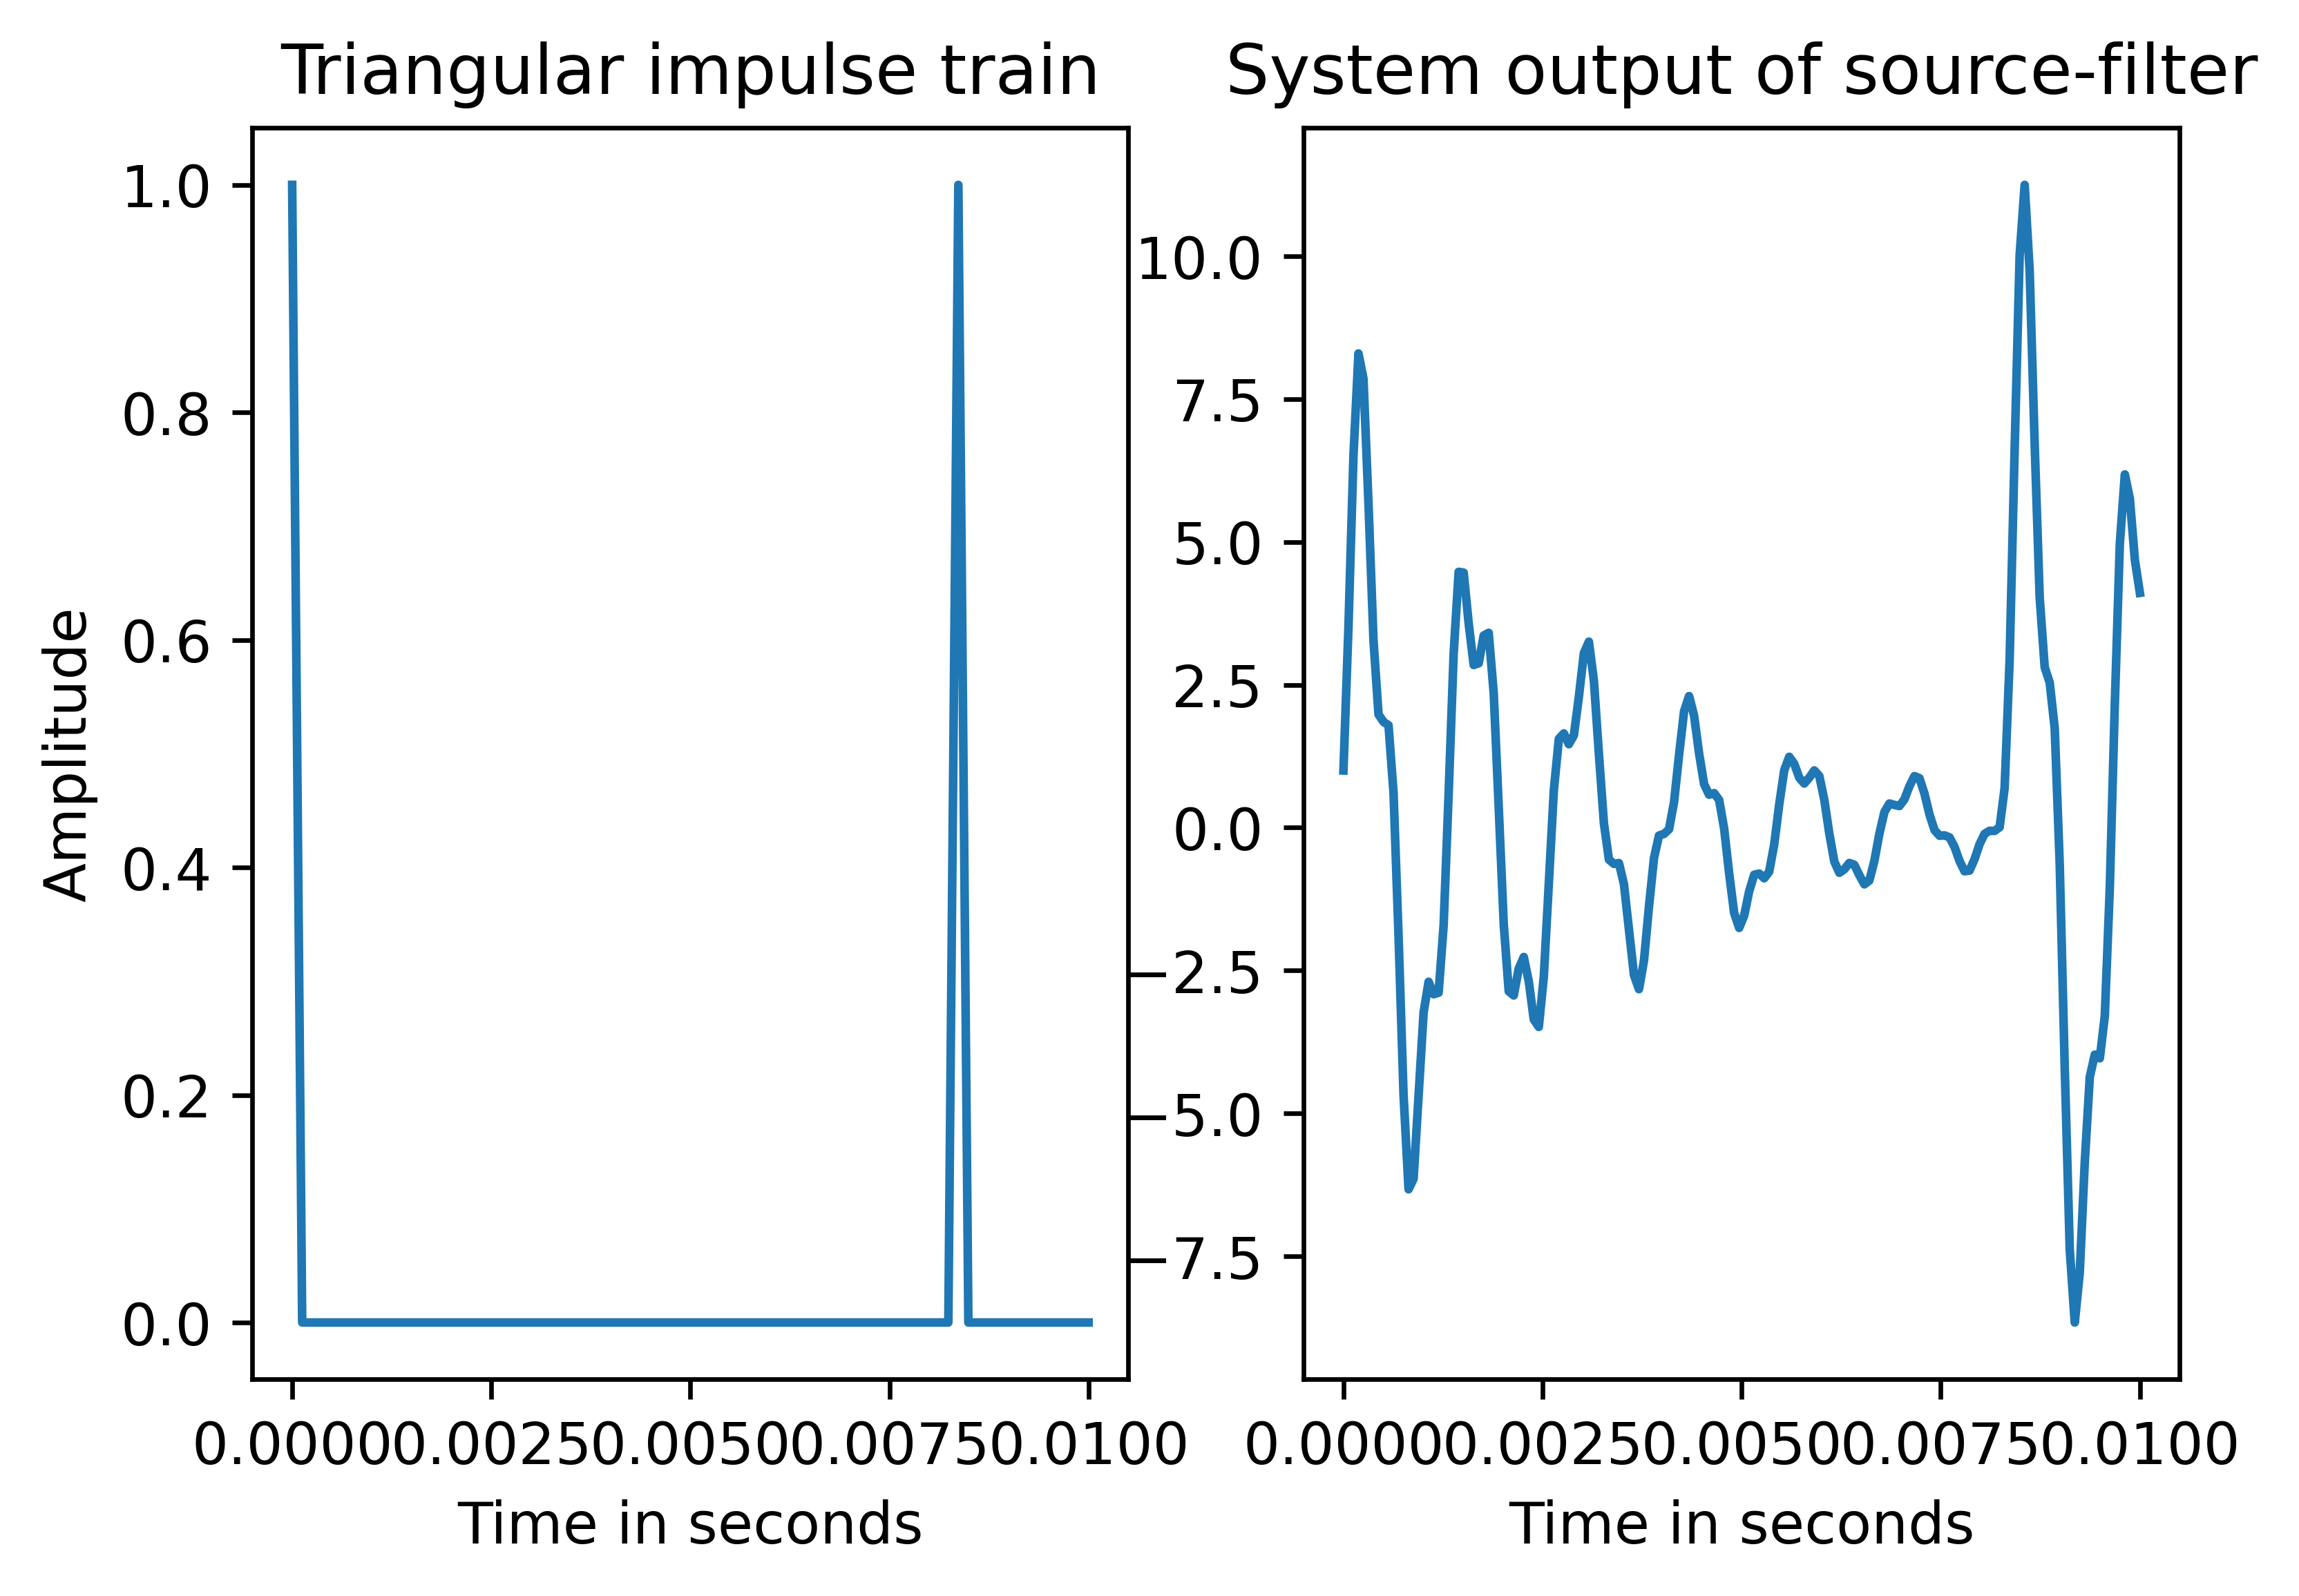

In [136]:
plt.subplot(1, 2, 1)
plt.plot(timeSpace, triagInput(P, samp, width = width))
plt.xlabel("Time in seconds")
plt.ylabel("Amplitude")
plt.title("Triangular impulse train")
plt.subplot(1, 2, 2)
plt.plot(timeSpace, y3)
plt.xlabel("Time in seconds")
plt.title("System output of source-filter")


In [137]:
F0 = 120
dur = 0.5
timeSpace = np.linspace(0, dur, int(dur*fs))
P = fs//F0
samp = len(timeSpace)
width = 2#no of samples on either side of the peak for the triangular input
y1 = computeResponse(triagInput(P, samp, width = width), samp, r1, theta1)
y2 = computeResponse(y1, samp, r2, theta2)
y3 = computeResponse(y1, samp, r3, theta3)#computing the output
scaled = np.int16(y3/np.max(np.abs(y3)) * 32767)#scaling the output to 16bit integers for writing to wav file
write('qn4_a_120Hz.wav', fs, scaled)

## /i/ @ 120Hz

In [138]:
f1 = 270 #formant frequency
f2 = 2290
f3 = 3010
b1 = 100 #bandwith
fs = 16000 #sampling frequency
T = 1.0/fs #samples

In [139]:
F0 = 120
dur = 0.01
timeSpace = np.linspace(0, dur, int(dur*fs))
P = fs//F0
samp = len(timeSpace)
width = 2#no of samples on either side of the peak for the triangular input

In [140]:
r1 = np.exp(-b1*pi*T)
theta1 = 2*pi*f1*T
r2 = np.exp(-b1*pi*T)
theta2 = 2*pi*f2*T
r3 = np.exp(-b1*pi*T)
theta3 = 2*pi*f3*T

In [141]:
y1 = computeResponse(triagInput(P, samp, width = width), samp, r1, theta1)
y2 = computeResponse(y1, samp, r2, theta2)
y3 = computeResponse(y1, samp, r3, theta3)

Text(0.5, 1.0, 'System output of source-filter')

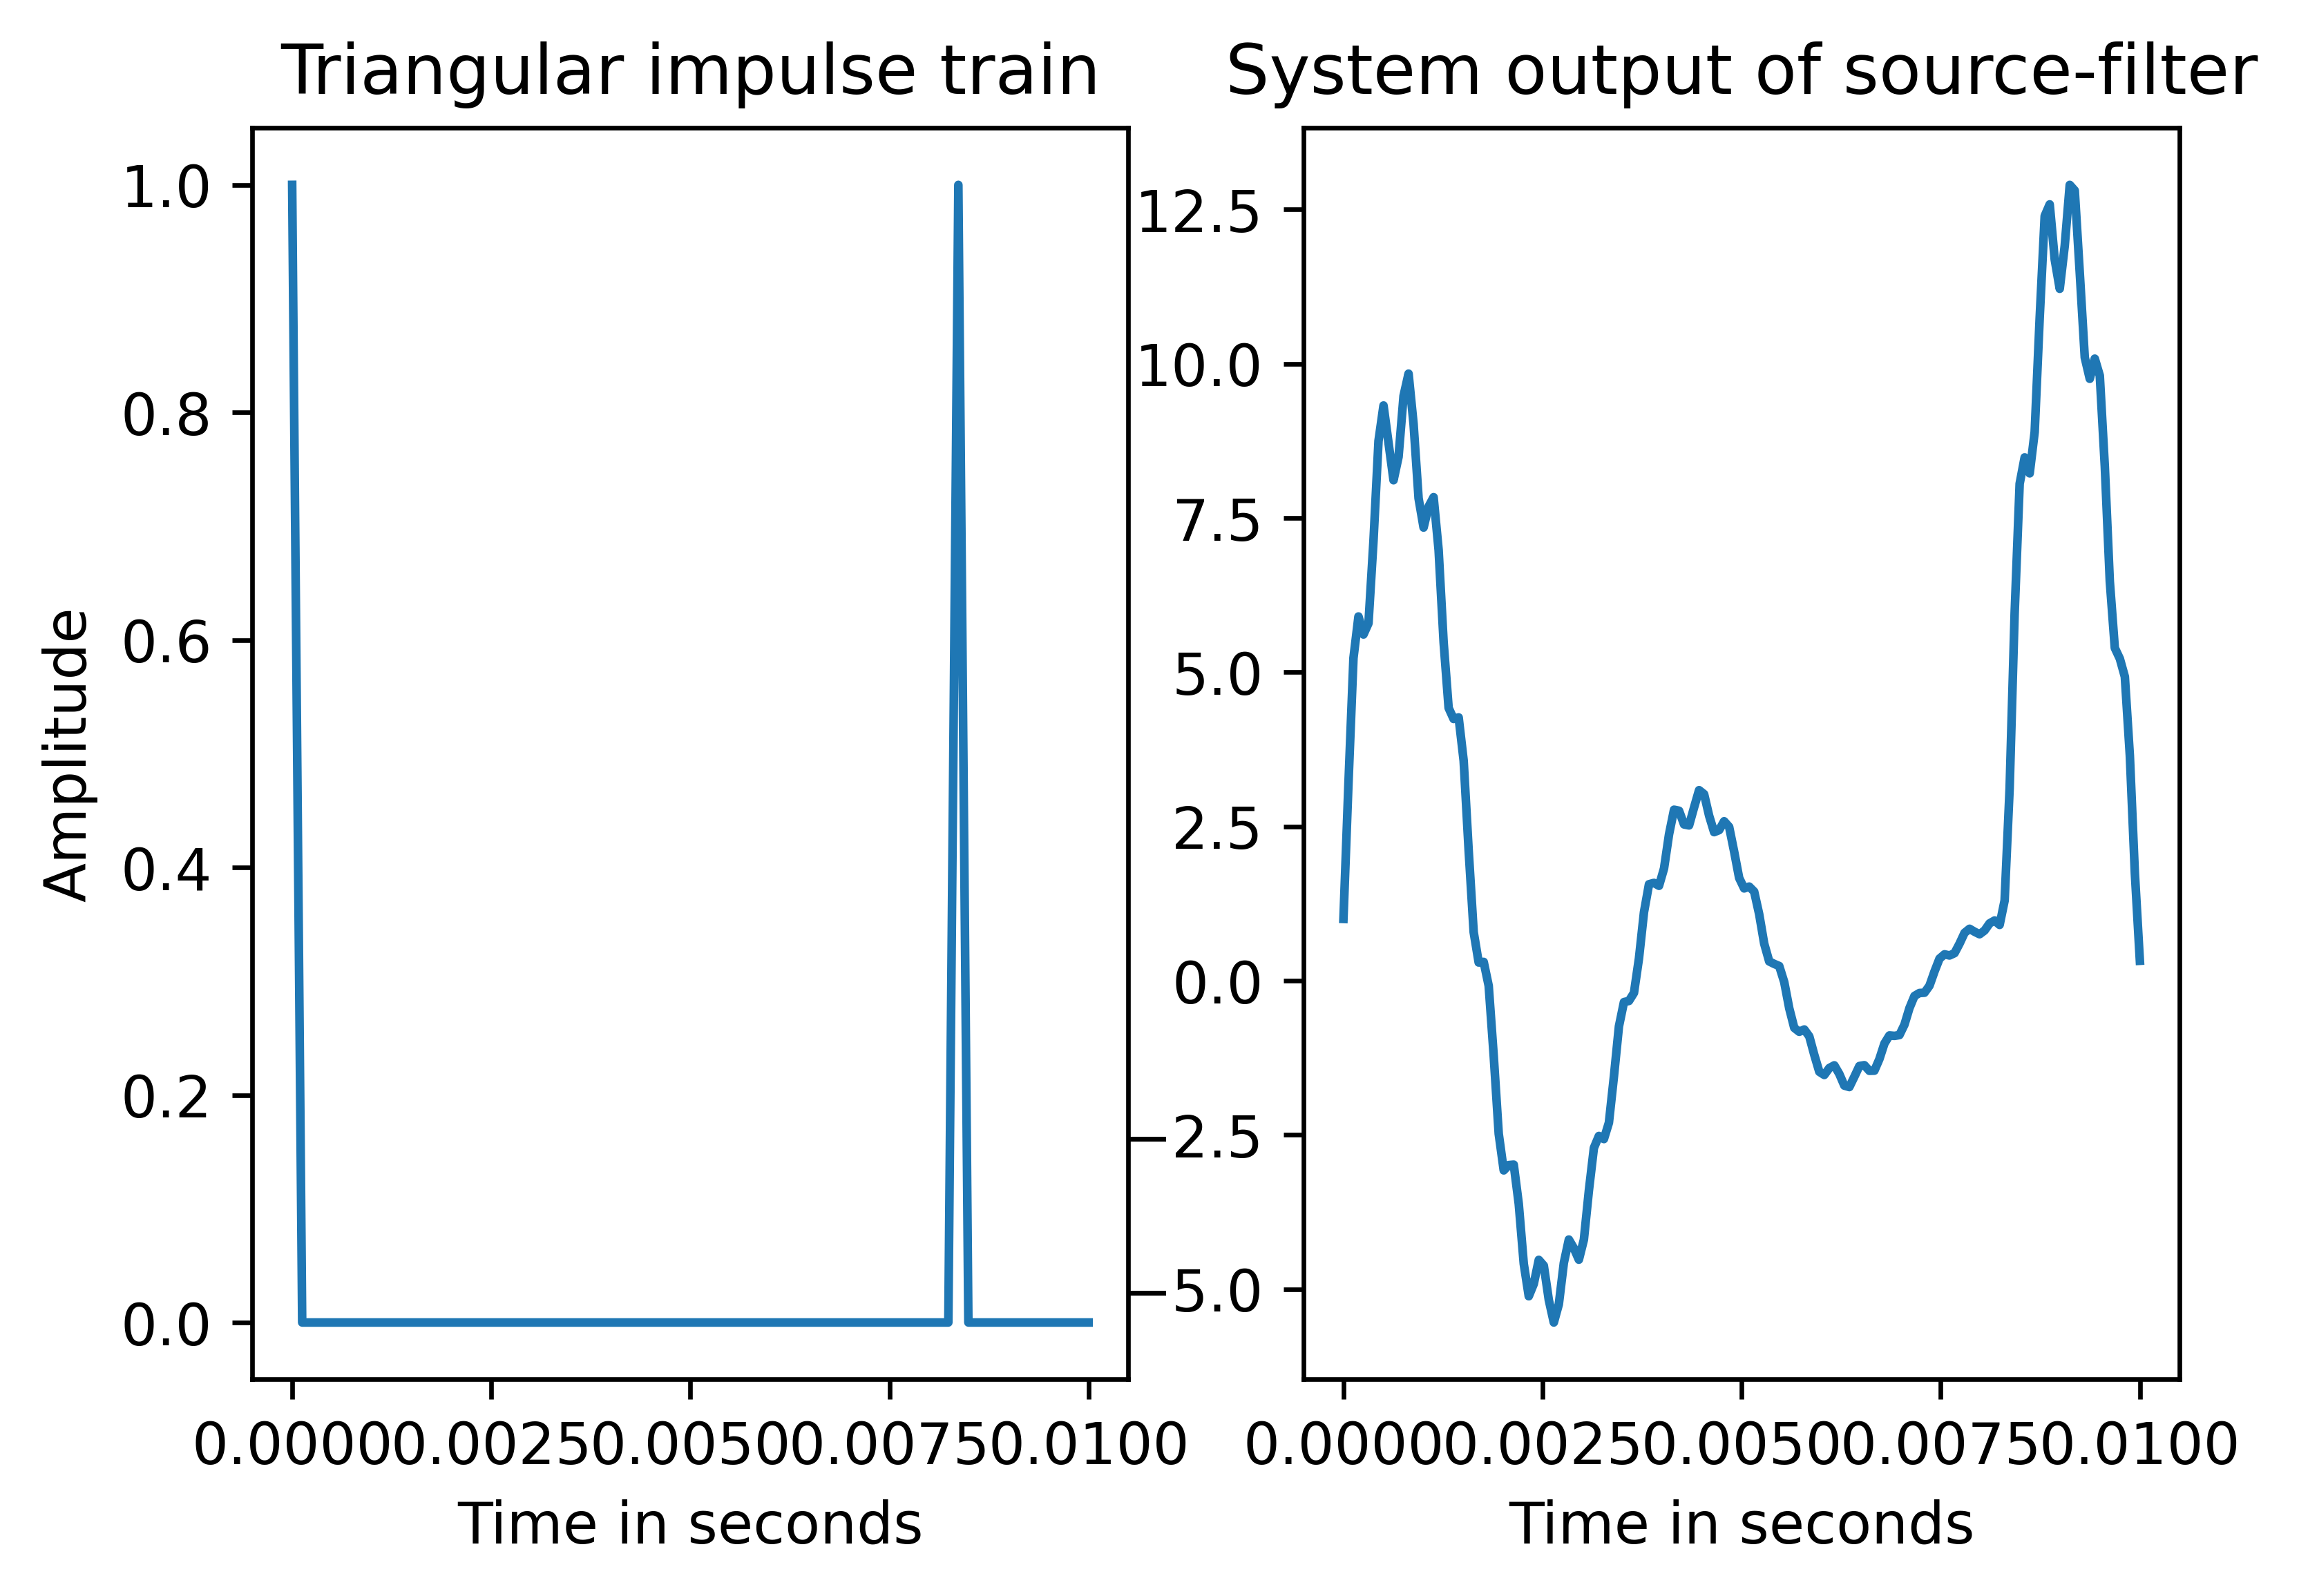

In [142]:
plt.subplot(1, 2, 1)
plt.plot(timeSpace, triagInput(P, samp, width = width))
plt.xlabel("Time in seconds")
plt.ylabel("Amplitude")
plt.title("Triangular impulse train")
plt.subplot(1, 2, 2)
plt.plot(timeSpace, y3)
plt.xlabel("Time in seconds")
plt.title("System output of source-filter")

In [143]:
F0 = 120
dur = 0.5
timeSpace = np.linspace(0, dur, int(dur*fs))
P = fs//F0
samp = len(timeSpace)
width = 2#no of samples on either side of the peak for the triangular input
y1 = computeResponse(triagInput(P, samp, width = width), samp, r1, theta1)
y2 = computeResponse(y1, samp, r2, theta2)
y3 = computeResponse(y1, samp, r3, theta3)#computing the output
scaled = np.int16(y3/np.max(np.abs(y3)) * 32767)#scaling the output to 16bit integers for writing to wav file
write('qn4_i_120Hz.wav', fs, scaled)

## /u/ @ 120Hz

In [144]:
f1 = 300 #formant frequency
f2 = 870
f3 = 2240
b1 = 100 #bandwith
fs = 16000 #sampling frequency
T = 1.0/fs #samples

In [145]:
F0 = 120
dur = 0.01
timeSpace = np.linspace(0, dur, int(dur*fs))
P = fs//F0
samp = len(timeSpace)
width = 2#no of samples on either side of the peak for the triangular input

In [146]:
r1 = np.exp(-b1*pi*T)
theta1 = 2*pi*f1*T
r2 = np.exp(-b1*pi*T)
theta2 = 2*pi*f2*T
r3 = np.exp(-b1*pi*T)
theta3 = 2*pi*f3*T

In [147]:
y1 = computeResponse(triagInput(P, samp, width = width), samp, r1, theta1)
y2 = computeResponse(y1, samp, r2, theta2)
y3 = computeResponse(y1, samp, r3, theta3)

Text(0.5, 1.0, 'System output of source-filter')

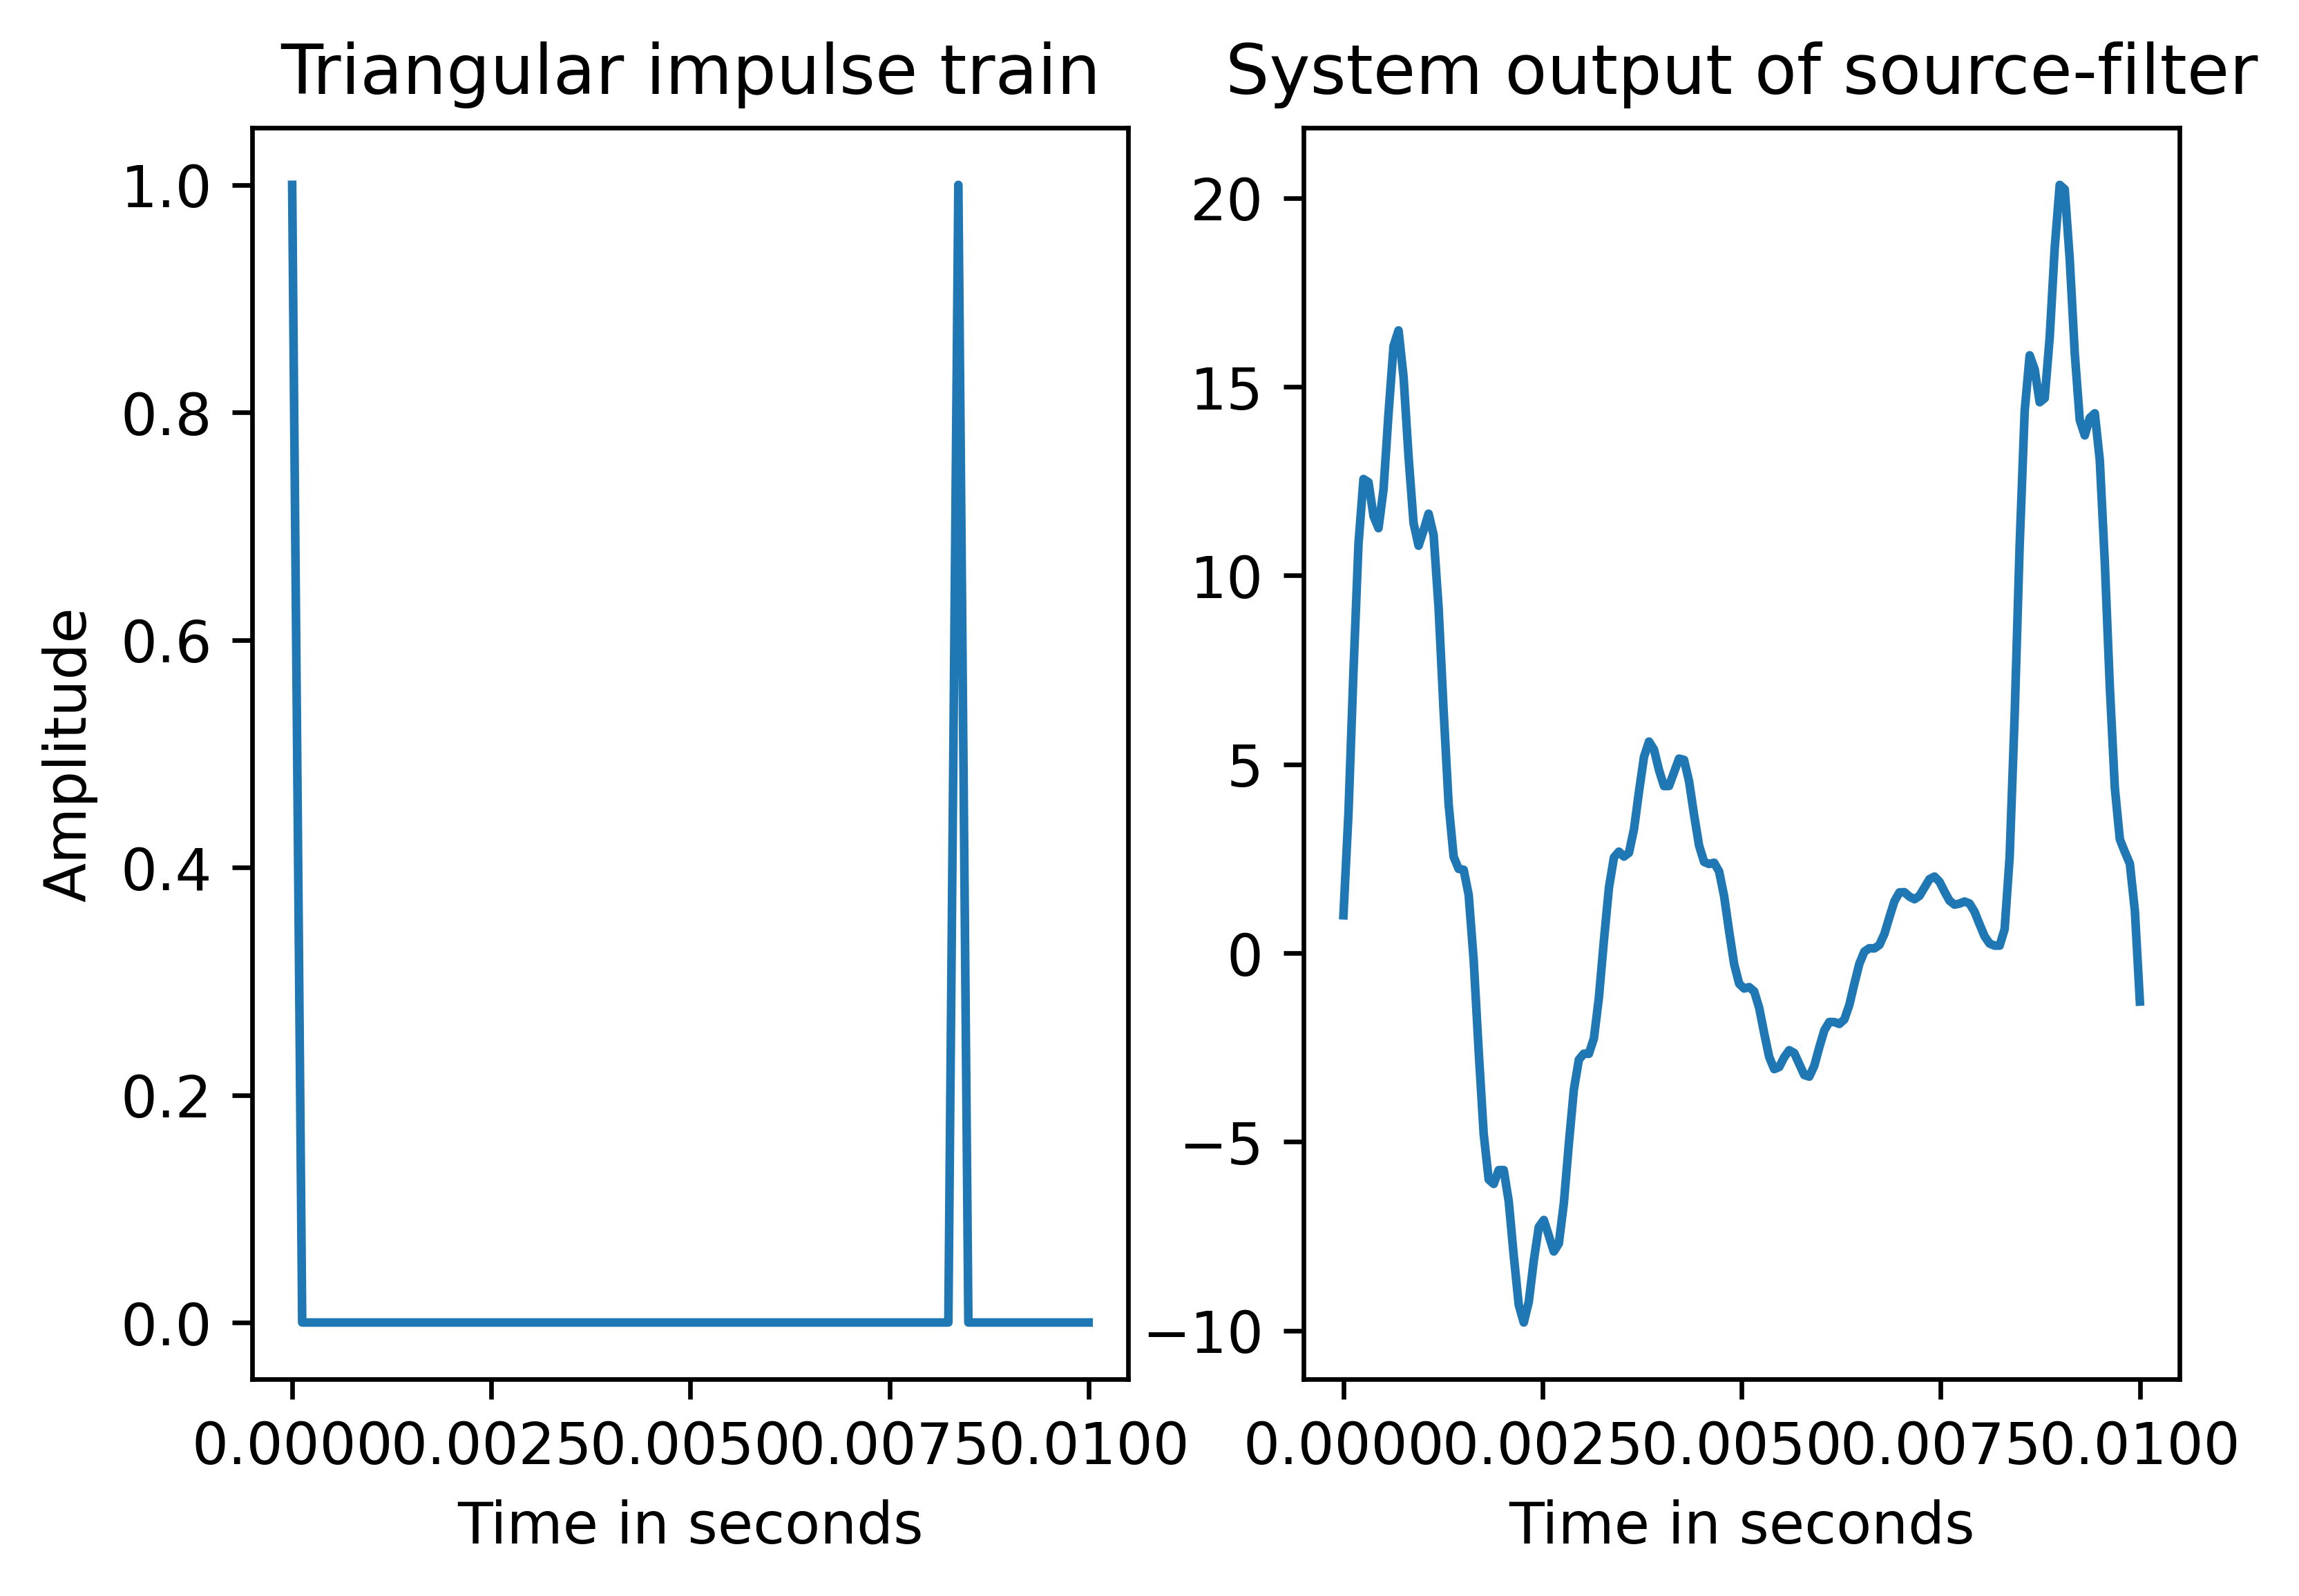

In [148]:
plt.subplot(1, 2, 1)
plt.plot(timeSpace, triagInput(P, samp, width = width))
plt.xlabel("Time in seconds")
plt.ylabel("Amplitude")
plt.title("Triangular impulse train")
plt.subplot(1, 2, 2)
plt.plot(timeSpace, y3)
plt.xlabel("Time in seconds")
plt.title("System output of source-filter")

In [149]:
F0 = 120
dur = 0.5
timeSpace = np.linspace(0, dur, int(dur*fs))
P = fs//F0
samp = len(timeSpace)
width = 2#no of samples on either side of the peak for the triangular input
y1 = computeResponse(triagInput(P, samp, width = width), samp, r1, theta1)
y2 = computeResponse(y1, samp, r2, theta2)
y3 = computeResponse(y1, samp, r3, theta3)#computing the output
scaled = np.int16(y3/np.max(np.abs(y3)) * 32767)#scaling the output to 16bit integers for writing to wav file
write('qn4_u_120Hz.wav', fs, scaled)

Now, we go for the high pitch tones

## /a/ @ 220Hz

In [150]:
f1 = 730 #formant frequency
f2 = 1090
f3 = 2440
b1 = 100 #bandwith
fs = 16000 #sampling frequency
T = 1.0/fs #samples

In [151]:
F0 = 220
dur = 0.01
timeSpace = np.linspace(0, dur, int(dur*fs))
P = fs//F0
samp = len(timeSpace)
width = 2#no of samples on either side of the peak for the triangular input

In [152]:
r1 = np.exp(-b1*pi*T)
theta1 = 2*pi*f1*T
r2 = np.exp(-b1*pi*T)
theta2 = 2*pi*f2*T
r3 = np.exp(-b1*pi*T)
theta3 = 2*pi*f3*T

In [153]:
y1 = computeResponse(triagInput(P, samp, width = width), samp, r1, theta1)
y2 = computeResponse(y1, samp, r2, theta2)
y3 = computeResponse(y1, samp, r3, theta3)

Text(0.5, 1.0, 'System output of source-filter')

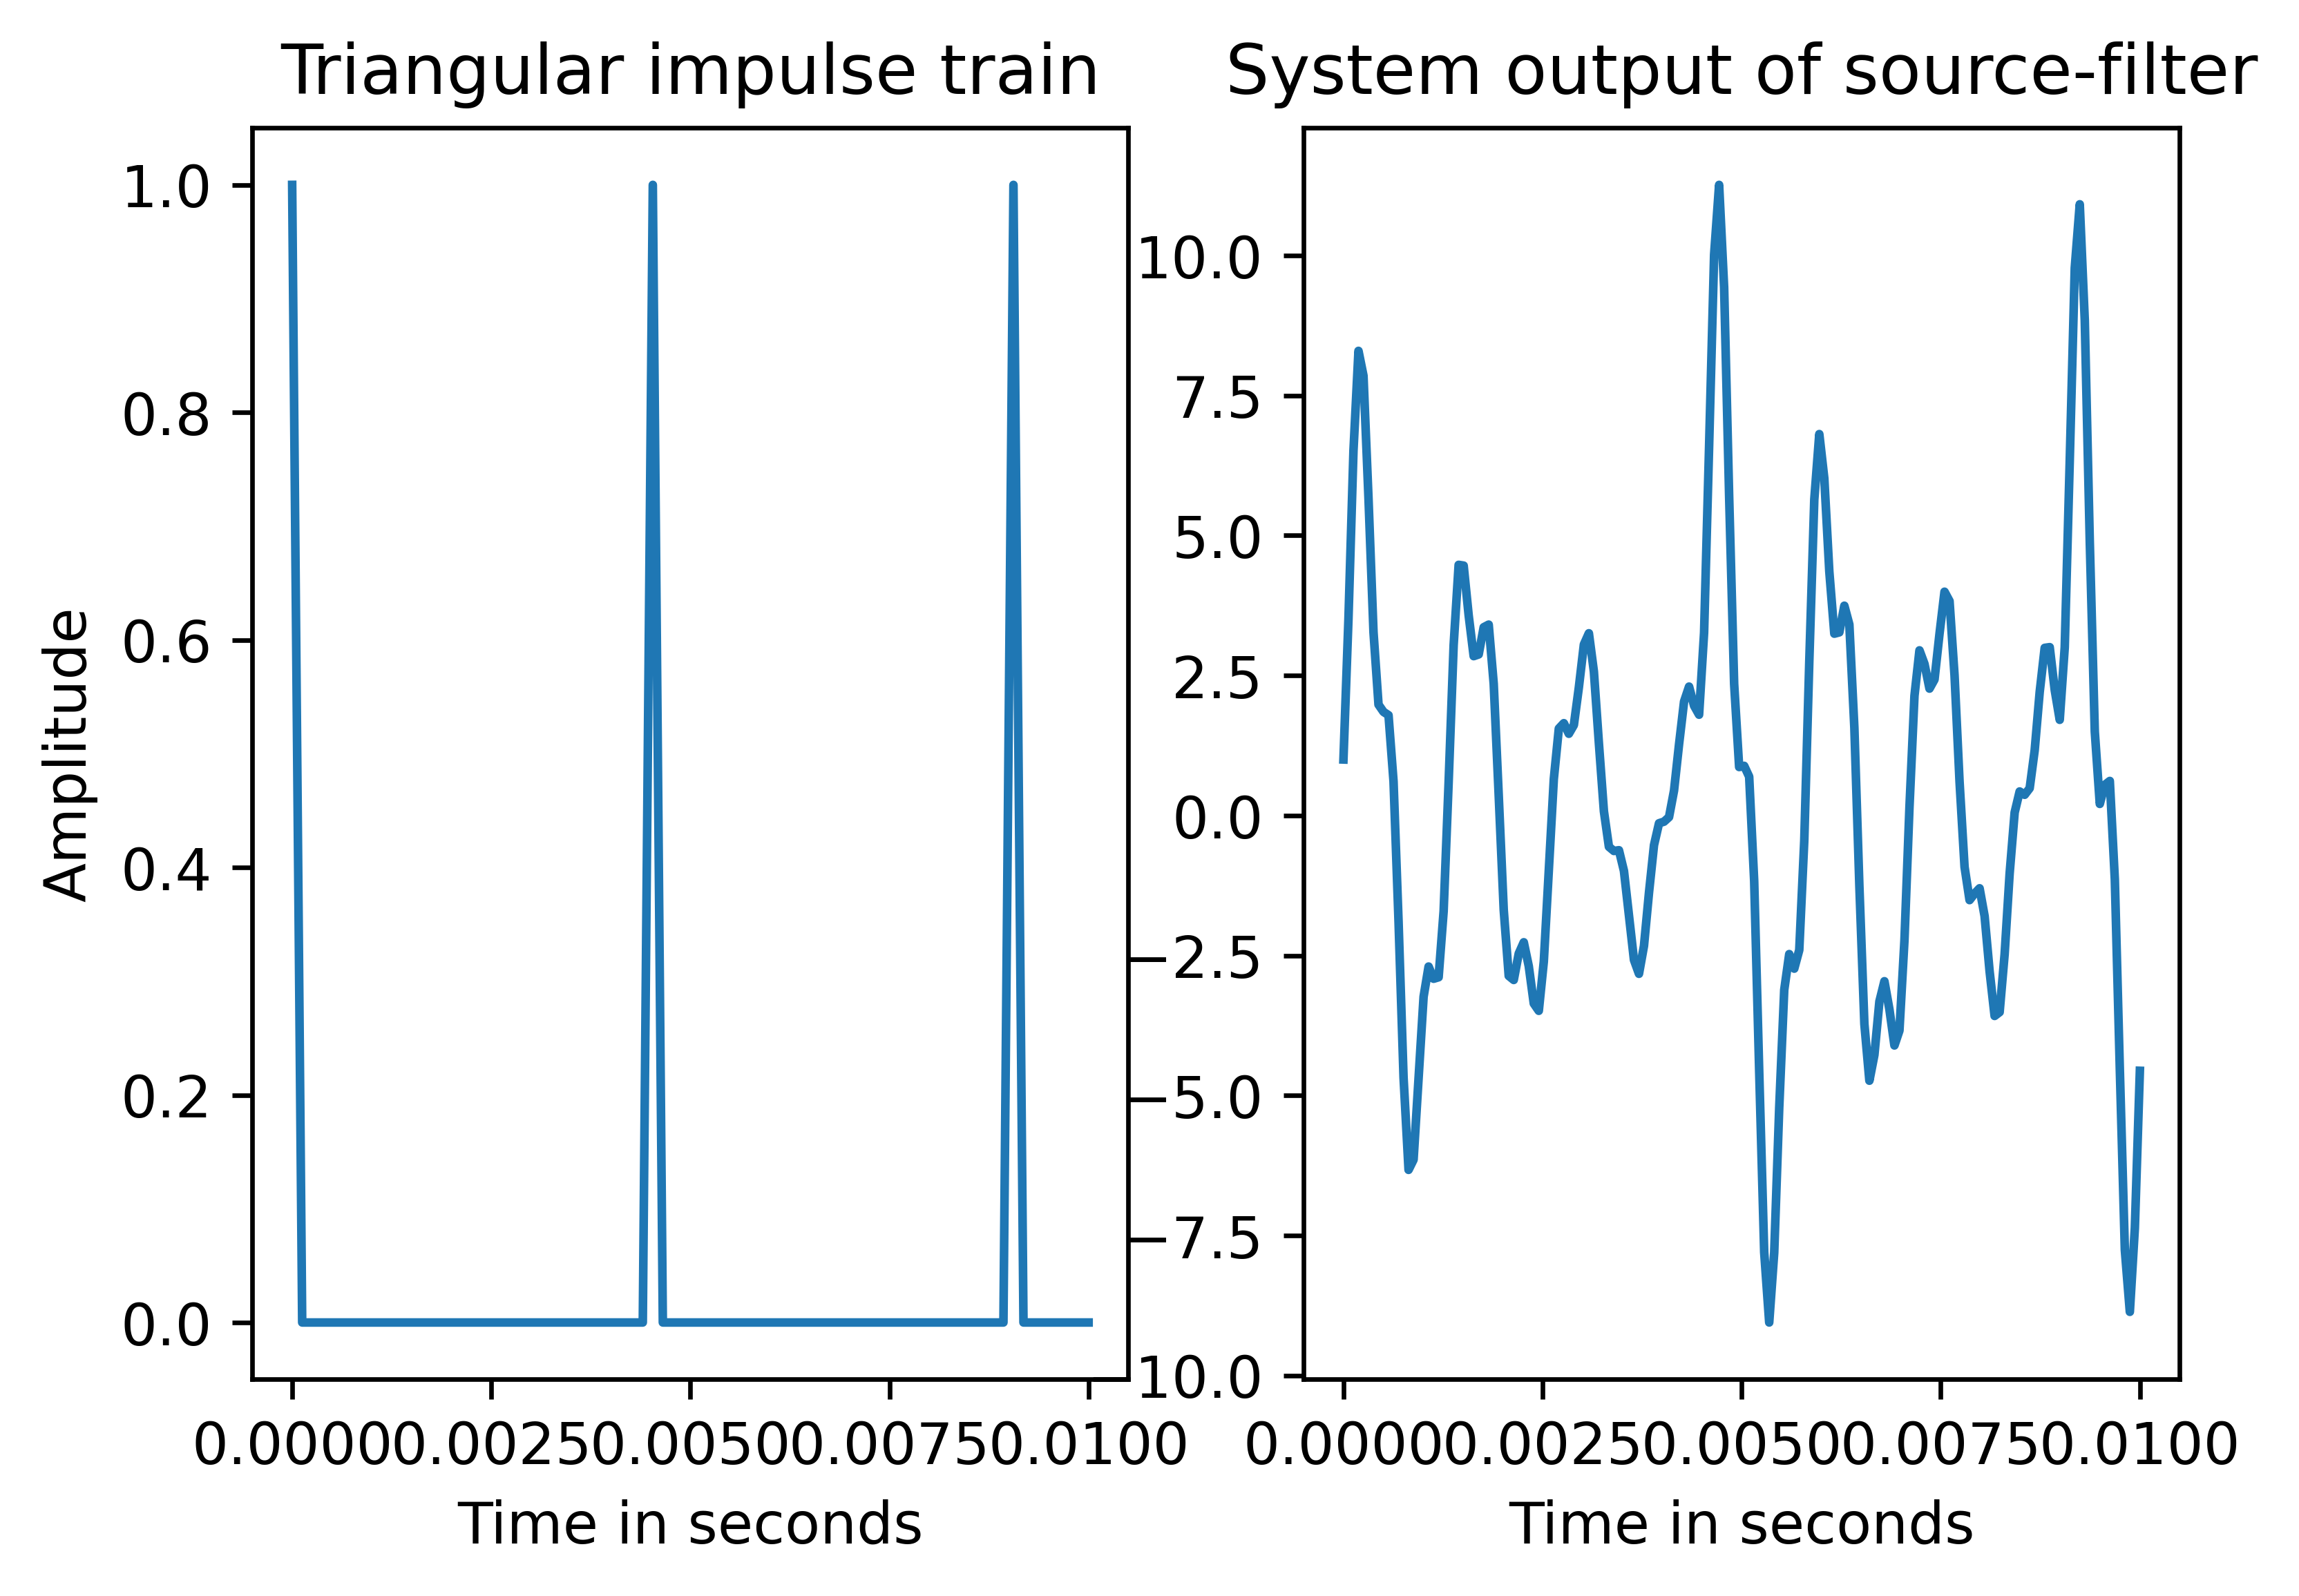

In [154]:
plt.subplot(1, 2, 1)
plt.plot(timeSpace, triagInput(P, samp, width = width))
plt.xlabel("Time in seconds")
plt.ylabel("Amplitude")
plt.title("Triangular impulse train")
plt.subplot(1, 2, 2)
plt.plot(timeSpace, y3)
plt.xlabel("Time in seconds")
plt.title("System output of source-filter")

In [155]:
F0 = 220
dur = 0.5
timeSpace = np.linspace(0, dur, int(dur*fs))
P = fs//F0
samp = len(timeSpace)
width = 2#no of samples on either side of the peak for the triangular input
y1 = computeResponse(triagInput(P, samp, width = width), samp, r1, theta1)
y2 = computeResponse(y1, samp, r2, theta2)
y3 = computeResponse(y1, samp, r3, theta3)#computing the output
scaled = np.int16(y3/np.max(np.abs(y3)) * 32767)#scaling the output to 16bit integers for writing to wav file
write('qn4_a_220Hz.wav', fs, scaled)

## /i/ @ 220Hz

In [156]:
f1 = 270 #formant frequency
f2 = 2290
f3 = 3010
b1 = 100 #bandwith
fs = 16000 #sampling frequency
T = 1.0/fs #samples

In [157]:
F0 = 220
dur = 0.02
timeSpace = np.linspace(0, dur, int(dur*fs))
P = fs//F0
samp = len(timeSpace)
width = 2#no of samples on either side of the peak for the triangular input

In [158]:
r1 = np.exp(-b1*pi*T)
theta1 = 2*pi*f1*T
r2 = np.exp(-b1*pi*T)
theta2 = 2*pi*f2*T
r3 = np.exp(-b1*pi*T)
theta3 = 2*pi*f3*T

In [159]:
y1 = computeResponse(triagInput(P, samp, width = width), samp, r1, theta1)
y2 = computeResponse(y1, samp, r2, theta2)
y3 = computeResponse(y1, samp, r3, theta3)

Text(0.5, 1.0, 'System output of source-filter')

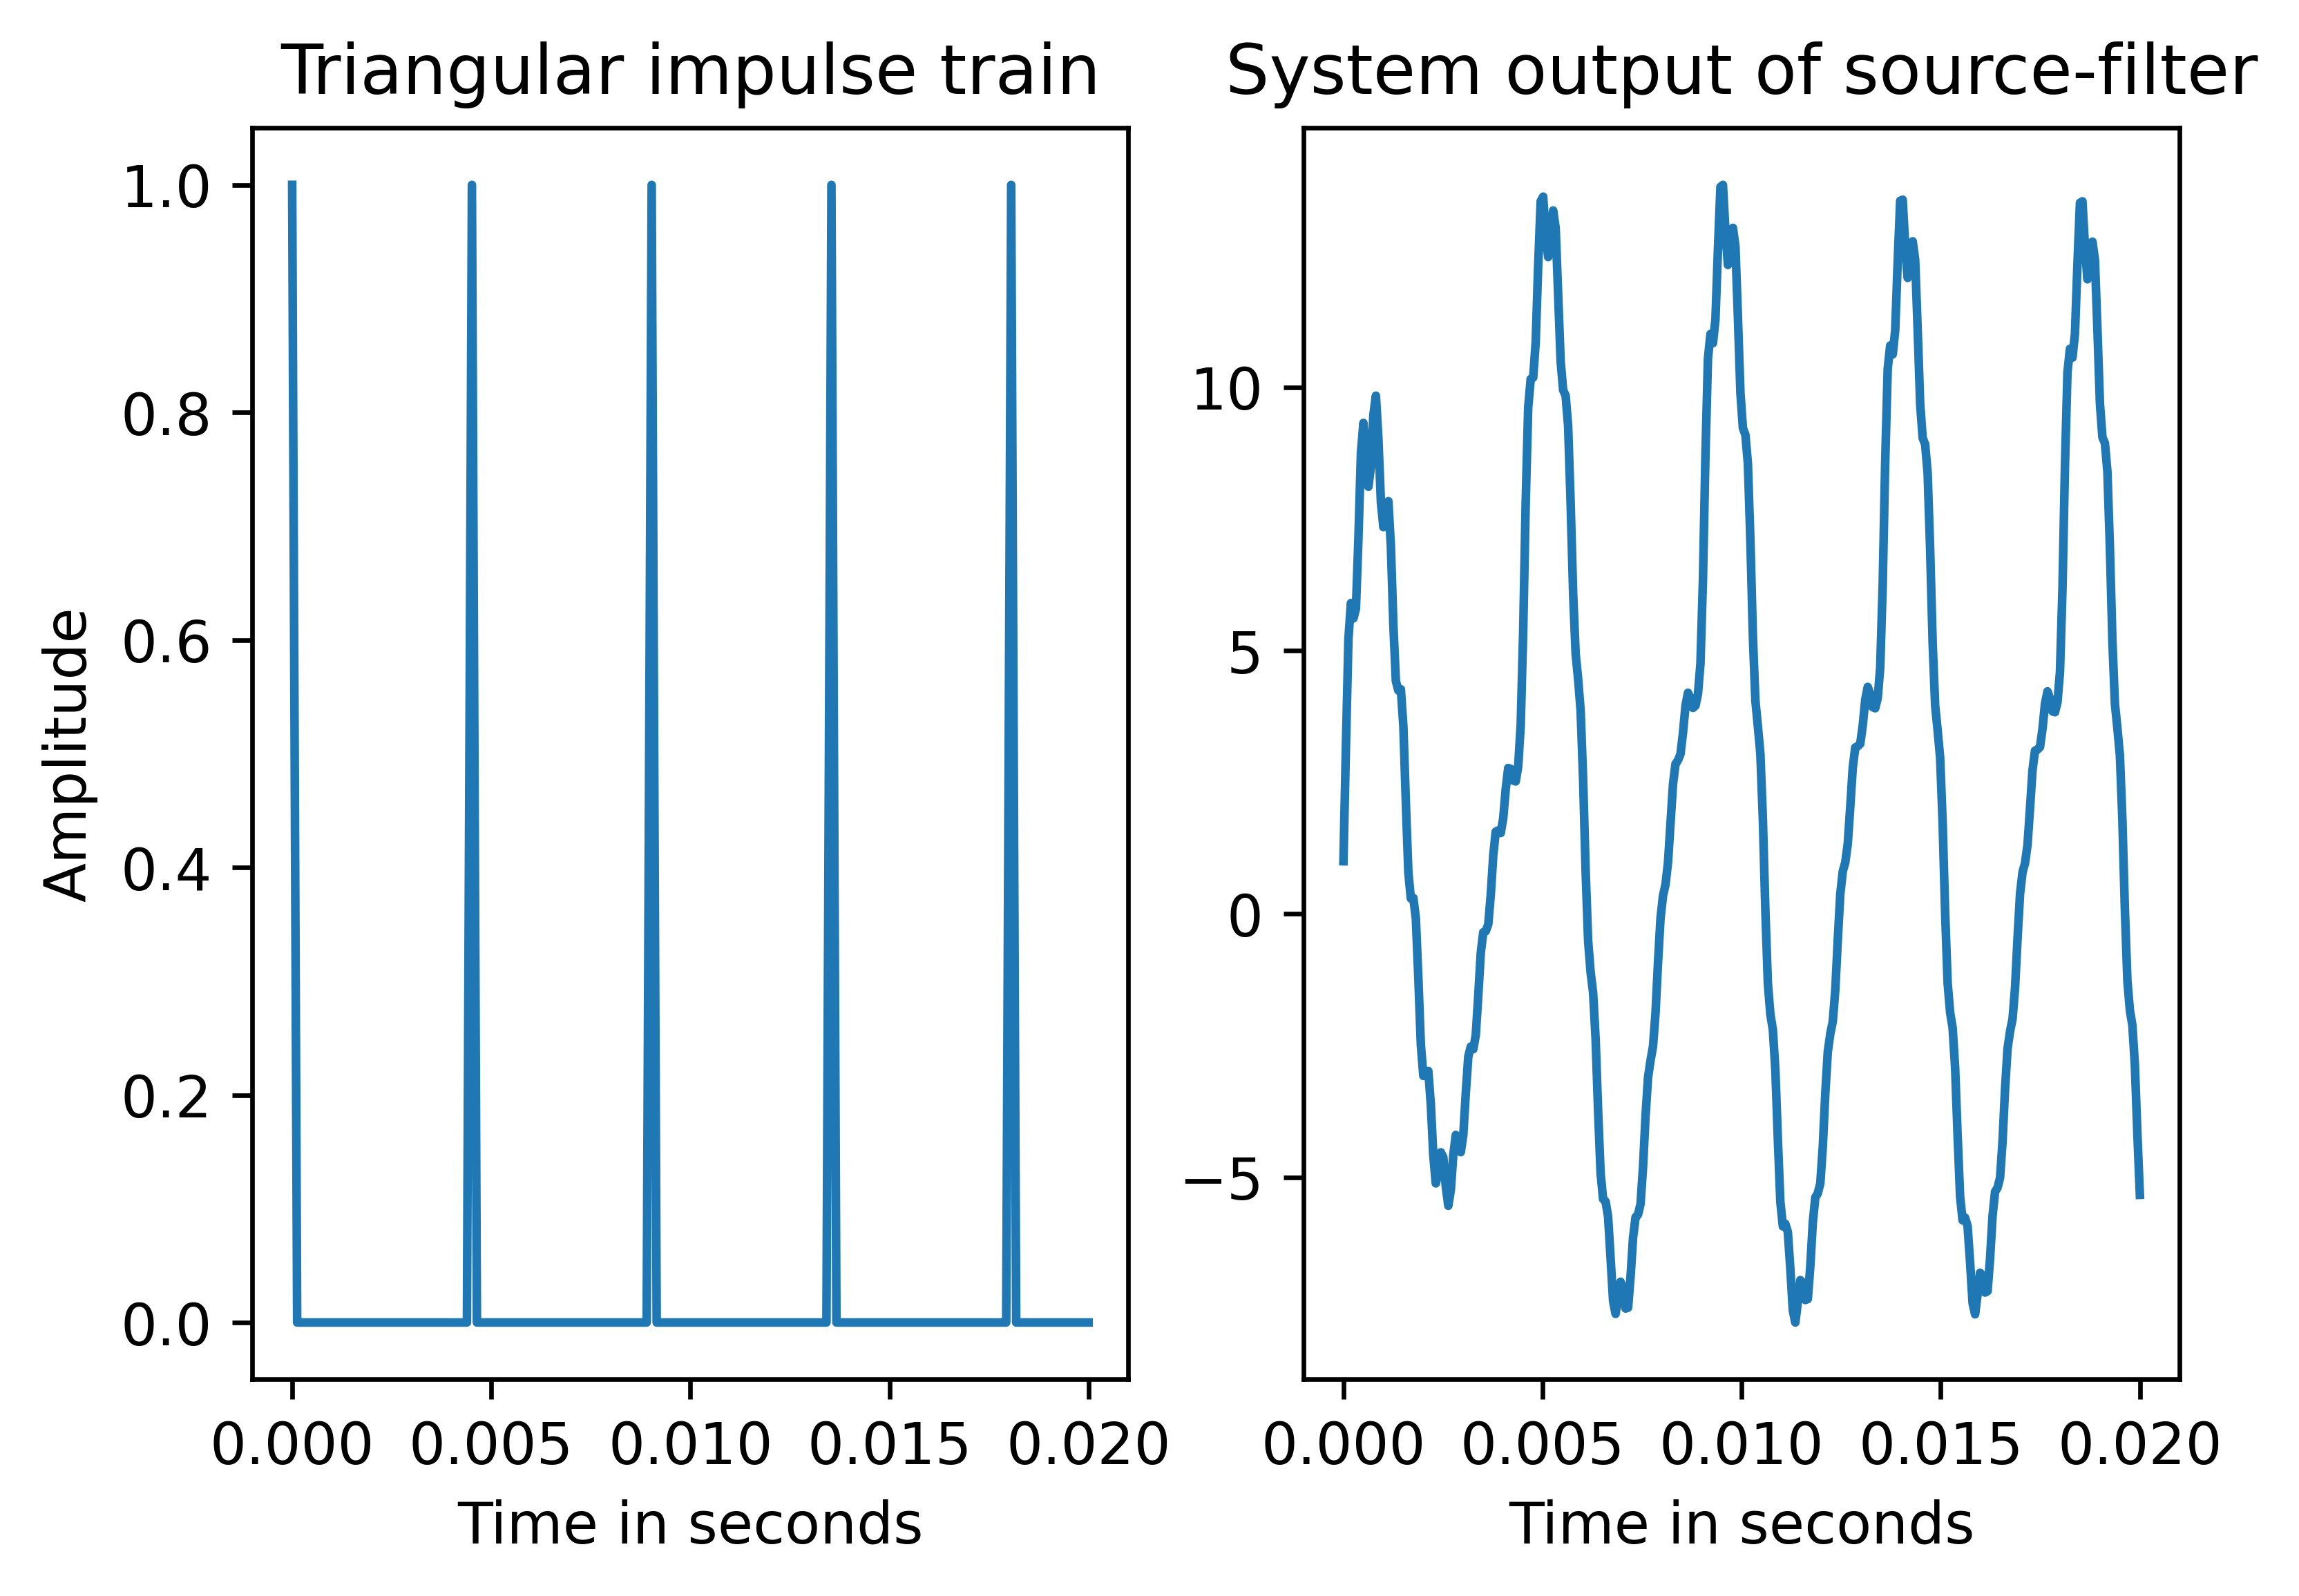

In [160]:
plt.subplot(1, 2, 1)
plt.plot(timeSpace, triagInput(P, samp, width = width))
plt.xlabel("Time in seconds")
plt.ylabel("Amplitude")
plt.title("Triangular impulse train")
plt.subplot(1, 2, 2)
plt.plot(timeSpace, y3)
plt.xlabel("Time in seconds")
plt.title("System output of source-filter")

In [161]:
F0 = 220
dur = 0.5
timeSpace = np.linspace(0, dur, int(dur*fs))
P = fs//F0
samp = len(timeSpace)
width = 2#no of samples on either side of the peak for the triangular input
y1 = computeResponse(triagInput(P, samp, width = width), samp, r1, theta1)
y2 = computeResponse(y1, samp, r2, theta2)
y3 = computeResponse(y1, samp, r3, theta3)#computing the output
scaled = np.int16(y3/np.max(np.abs(y3)) * 32767)#scaling the output to 16bit integers for writing to wav file
write('qn4_i_220Hz.wav', fs, scaled)

## /u/ @ 220Hz

In [162]:
f1 = 300 #formant frequency
f2 = 870
f3 = 2240
b1 = 100 #bandwith
fs = 16000 #sampling frequency
T = 1.0/fs #samples

In [163]:
F0 = 220
dur = 0.01
timeSpace = np.linspace(0, dur, int(dur*fs))
P = fs//F0
samp = len(timeSpace)
width = 2#no of samples on either side of the peak for the triangular input

In [164]:
r1 = np.exp(-b1*pi*T)
theta1 = 2*pi*f1*T
r2 = np.exp(-b1*pi*T)
theta2 = 2*pi*f2*T
r3 = np.exp(-b1*pi*T)
theta3 = 2*pi*f3*T

In [165]:
y1 = computeResponse(triagInput(P, samp, width = width), samp, r1, theta1)
y2 = computeResponse(y1, samp, r2, theta2)
y3 = computeResponse(y1, samp, r3, theta3)

Text(0.5, 1.0, 'System output of source-filter')

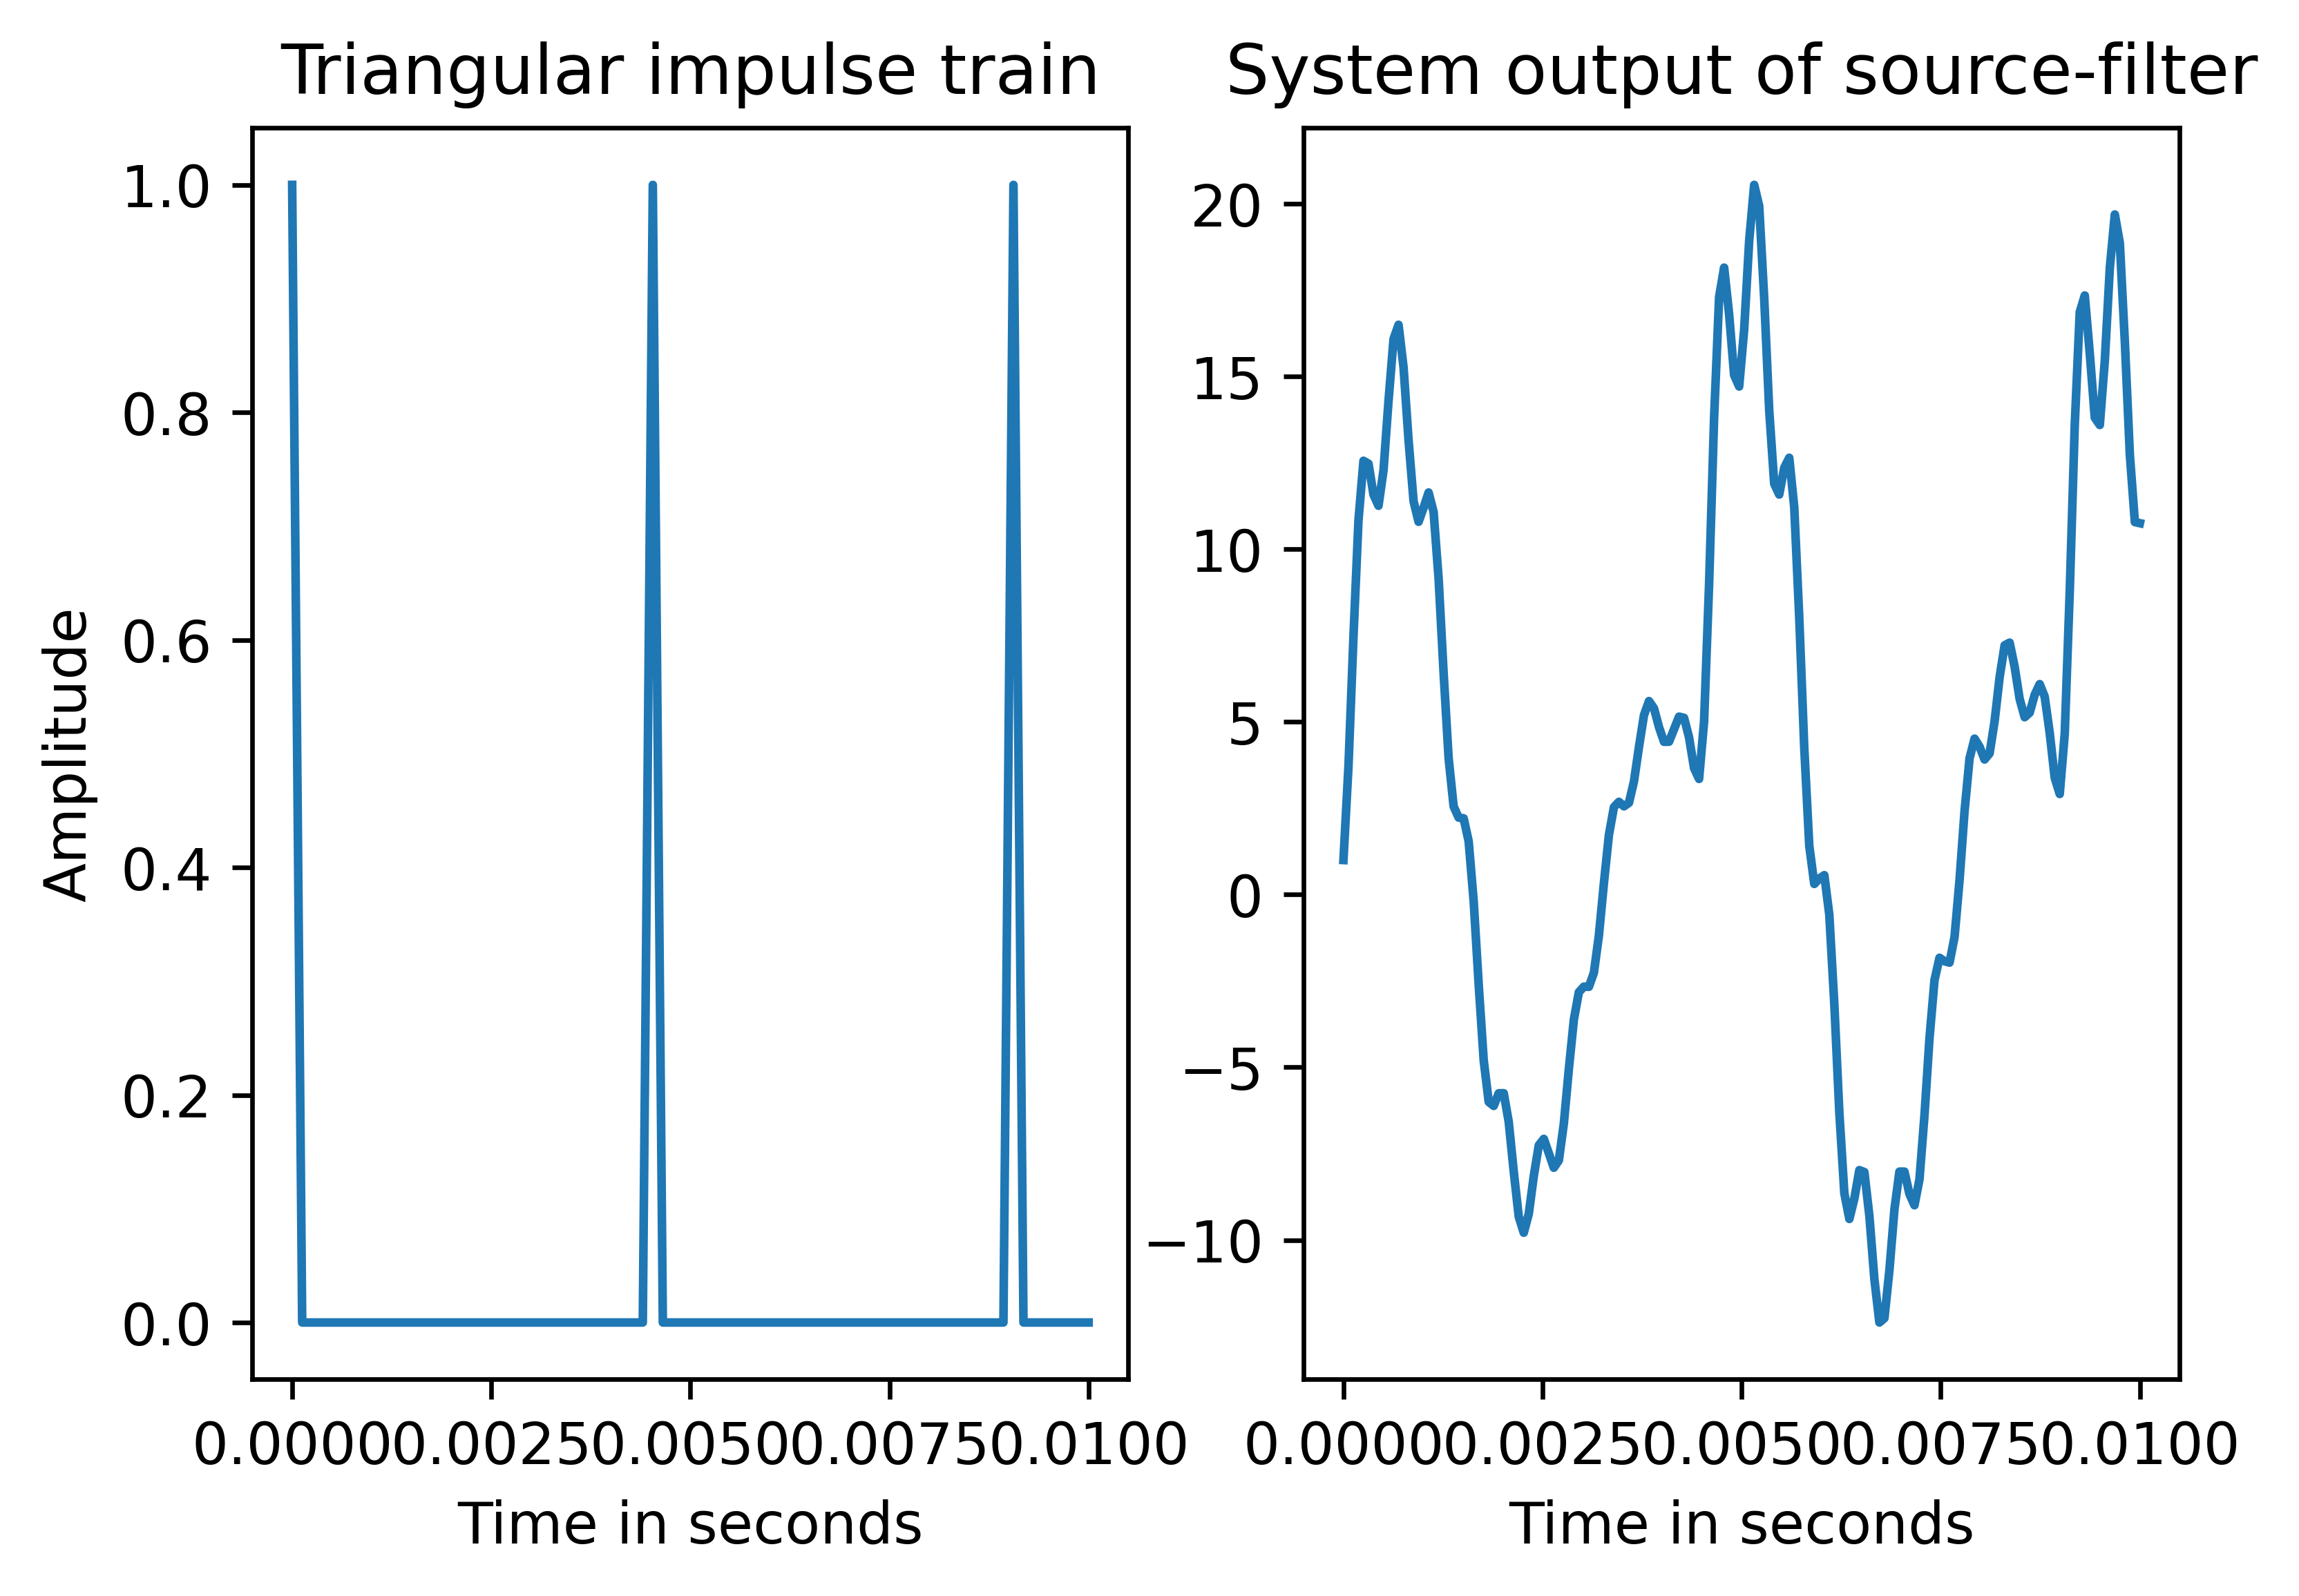

In [166]:
plt.subplot(1, 2, 1)
plt.plot(timeSpace, triagInput(P, samp, width = width))
plt.xlabel("Time in seconds")
plt.ylabel("Amplitude")
plt.title("Triangular impulse train")
plt.subplot(1, 2, 2)
plt.plot(timeSpace, y3)
plt.xlabel("Time in seconds")
plt.title("System output of source-filter")

In [167]:
F0 = 220
dur = 0.5
timeSpace = np.linspace(0, dur, int(dur*fs))
P = fs//F0
samp = len(timeSpace)
width = 2#no of samples on either side of the peak for the triangular input
y1 = computeResponse(triagInput(P, samp, width = width), samp, r1, theta1)
y2 = computeResponse(y1, samp, r2, theta2)
y3 = computeResponse(y1, samp, r3, theta3)#computing the output
scaled = np.int16(y3/np.max(np.abs(y3)) * 32767)#scaling the output to 16bit integers for writing to wav file
write('qn4_u_220Hz.wav', fs, scaled)

Please listen to the following files for the sounds

/a/ @120Hz - qn4_a_120Hz.wav

/i/ @120Hz - qn4_i_120Hz.wav

/u/ @120Hz - qn4_u_120Hz.wav

/a/ @220Hz - qn4_a_220Hz.wav

/i/ @220Hz - qn4_i_220Hz.wav

/u/ @220Hz - qn4_u_220Hz.wav

## Comments : 
1. Since F1, F2, F3 remain the same for each vowel, we see that the oscillations in a given 1/F0 period don't change for a given vowel.
2. As F0 increases, we see that the pitch increases of the sound. Further, each period now repeats faster resulting in that higher pitch sound.
3. The sounds are hard to distinguish as 'a', 'i' and 'u' but after careful listening for some time one can make them out.
4. The sound very robotic and monotonous.

# Optional part 

## Glotal pulse shaping

In [168]:
def glottalPulse(input, a):
    y = np.zeros_like(input)
    y[0] = input[0]
    y[1] = input[1] + 2*a*y[0]
    y[2] = input[2] + 2*a*y[1] - (a*a*y[0])
    for i in range(3, len(input)):
        y[i] = input[i] + 2*a*y[i-1] - (a*a*y[i-2])
    return y

We do the above for sound 'a' @120Hz

In [169]:
f1 = 730 #formant frequency
f2 = 1090
f3 = 2440
b1 = 100 #bandwith
fs = 16000 #sampling frequency
T = 1.0/fs #samples

In [170]:
F0 = 120
dur = 0.02
timeSpace = np.linspace(0, dur, int(dur*fs))
P = fs//F0
samp = len(timeSpace)
width = 2#no of samples on either side of the peak for the triangular input

In [171]:
r1 = np.exp(-b1*pi*T)
theta1 = 2*pi*f1*T
r2 = np.exp(-b1*pi*T)
theta2 = 2*pi*f2*T
r3 = np.exp(-b1*pi*T)
theta3 = 2*pi*f3*T

In [172]:
yI = glottalPulse(triagInput(P, samp, width = width), 0.9)
y1 = computeResponse(yI, samp, r1, theta1)
y2 = computeResponse(y1, samp, r2, theta2)
y3 = computeResponse(y1, samp, r3, theta3)

Text(0.5, 1.0, 'System output of source-filter')

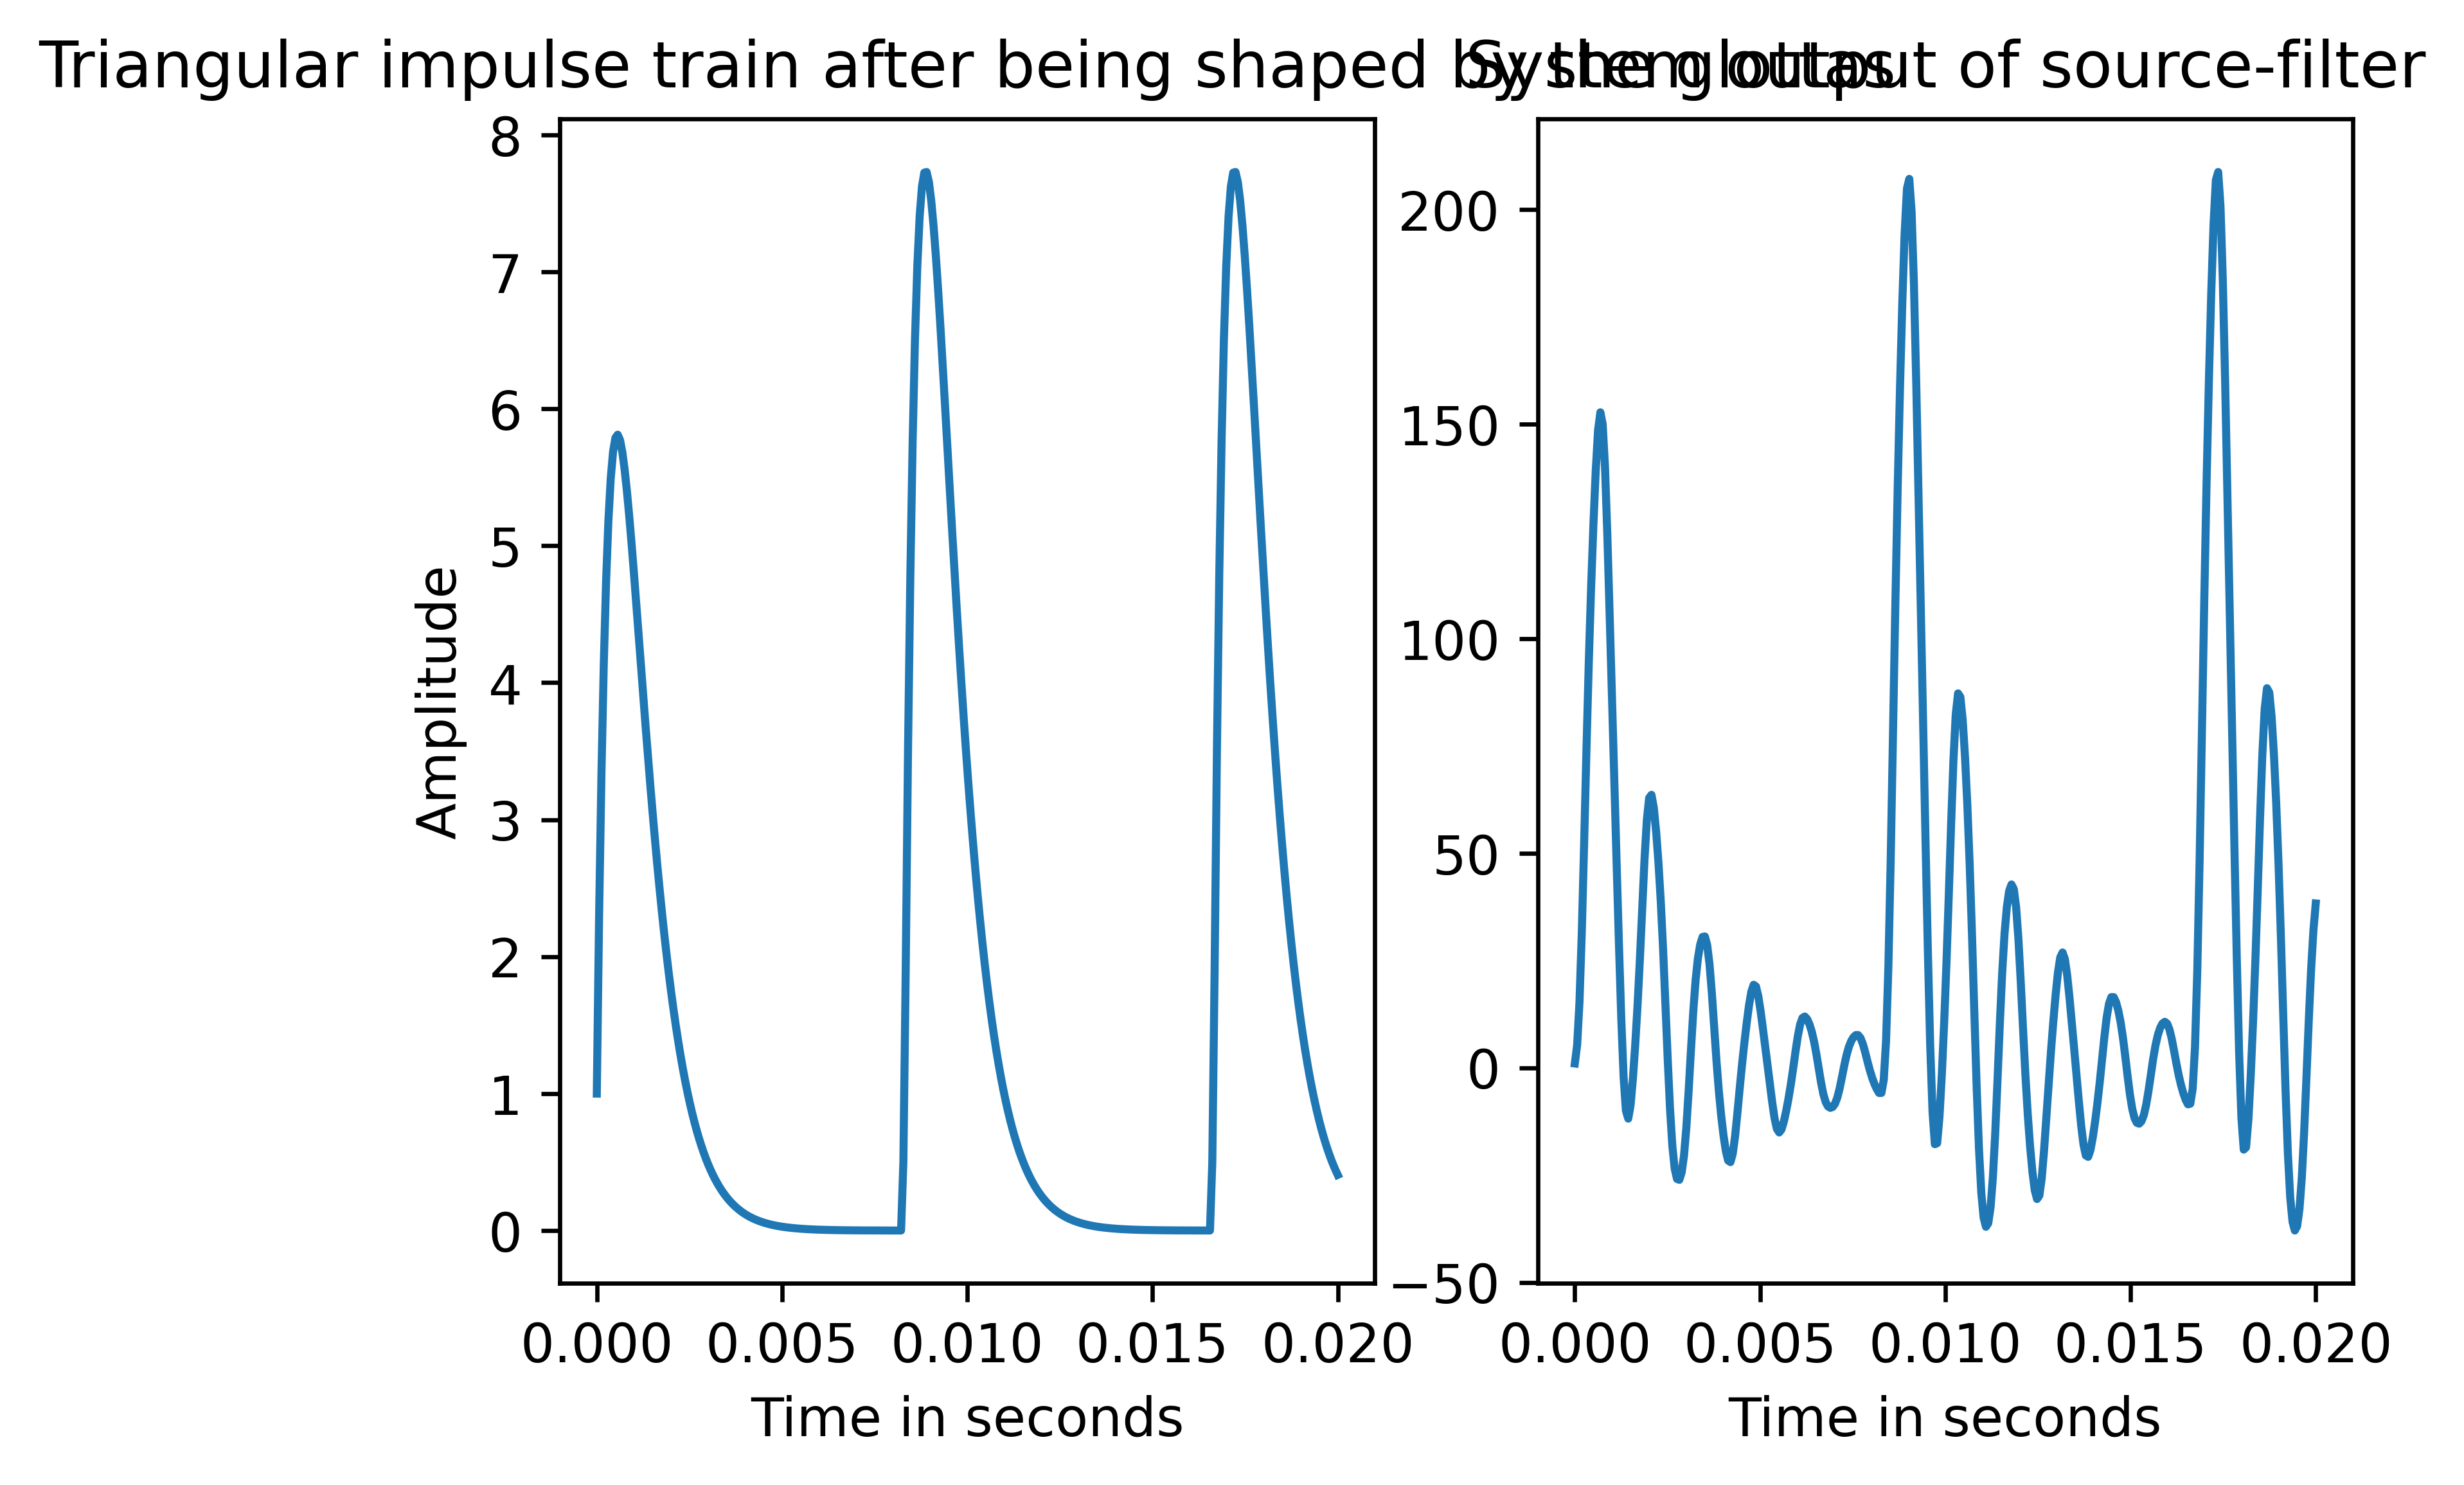

In [173]:
plt.subplot(1, 2, 1)
plt.plot(timeSpace, yI)
plt.xlabel("Time in seconds")
plt.ylabel("Amplitude")
plt.title("Triangular impulse train after being shaped by the glottas")
plt.subplot(1, 2, 2)
plt.plot(timeSpace, y3)
plt.xlabel("Time in seconds")
plt.title("System output of source-filter")

In [174]:
F0 = 120
dur = 0.5
timeSpace = np.linspace(0, dur, int(dur*fs))
P = fs//F0
samp = len(timeSpace)
width = 2#no of samples on either side of the peak for the triangular input
y1 = computeResponse(triagInput(P, samp, width = width), samp, r1, theta1)
y2 = computeResponse(y1, samp, r2, theta2)
y3 = computeResponse(y1, samp, r3, theta3)#computing the output
scaled = np.int16(y3/np.max(np.abs(y3)) * 32767)#scaling the output to 16bit integers for writing to wav file
write('qn4_a_120Hz_with_glottal.wav', fs, scaled)

Please listen to qn4_a_120Hz_with_glottal.wav

## Now with lip radiation added

In [175]:
def GlottalLip(input, a,b ):
    y = np.zeros_like(input)
    y[0] = input[0]
    y[1] = input[1] - b*input[0] + 2*a*y[0]
    y[2] = input[2] - b*input[1]+ 2*a*y[1] - (a*a*y[0])
    for i in range(3, len(input)):
        y[i] = input[i] - b*input[i-1] + 2*a*y[i-1] - (a*a*y[i-2])
    return y

In [176]:
f1 = 730 #formant frequency
f2 = 1090
f3 = 2440
b1 = 100 #bandwith
fs = 16000 #sampling frequency
T = 1.0/fs #samples
F0 = 120
dur = 0.02
timeSpace = np.linspace(0, dur, int(dur*fs))
P = fs//F0
samp = len(timeSpace)
width = 2#no of samples on either side of the peak for the triangular input
r1 = np.exp(-b1*pi*T)
theta1 = 2*pi*f1*T
r2 = np.exp(-b1*pi*T)
theta2 = 2*pi*f2*T
r3 = np.exp(-b1*pi*T)
theta3 = 2*pi*f3*T

In [177]:
yI = GlottalLip(triagInput(P, samp, width = width), 0.9, 0.8)
y1 = computeResponse(yI, samp, r1, theta1)
y2 = computeResponse(y1, samp, r2, theta2)
y3 = computeResponse(y1, samp, r3, theta3)

Text(0.5, 1.0, 'System output of source-filter')

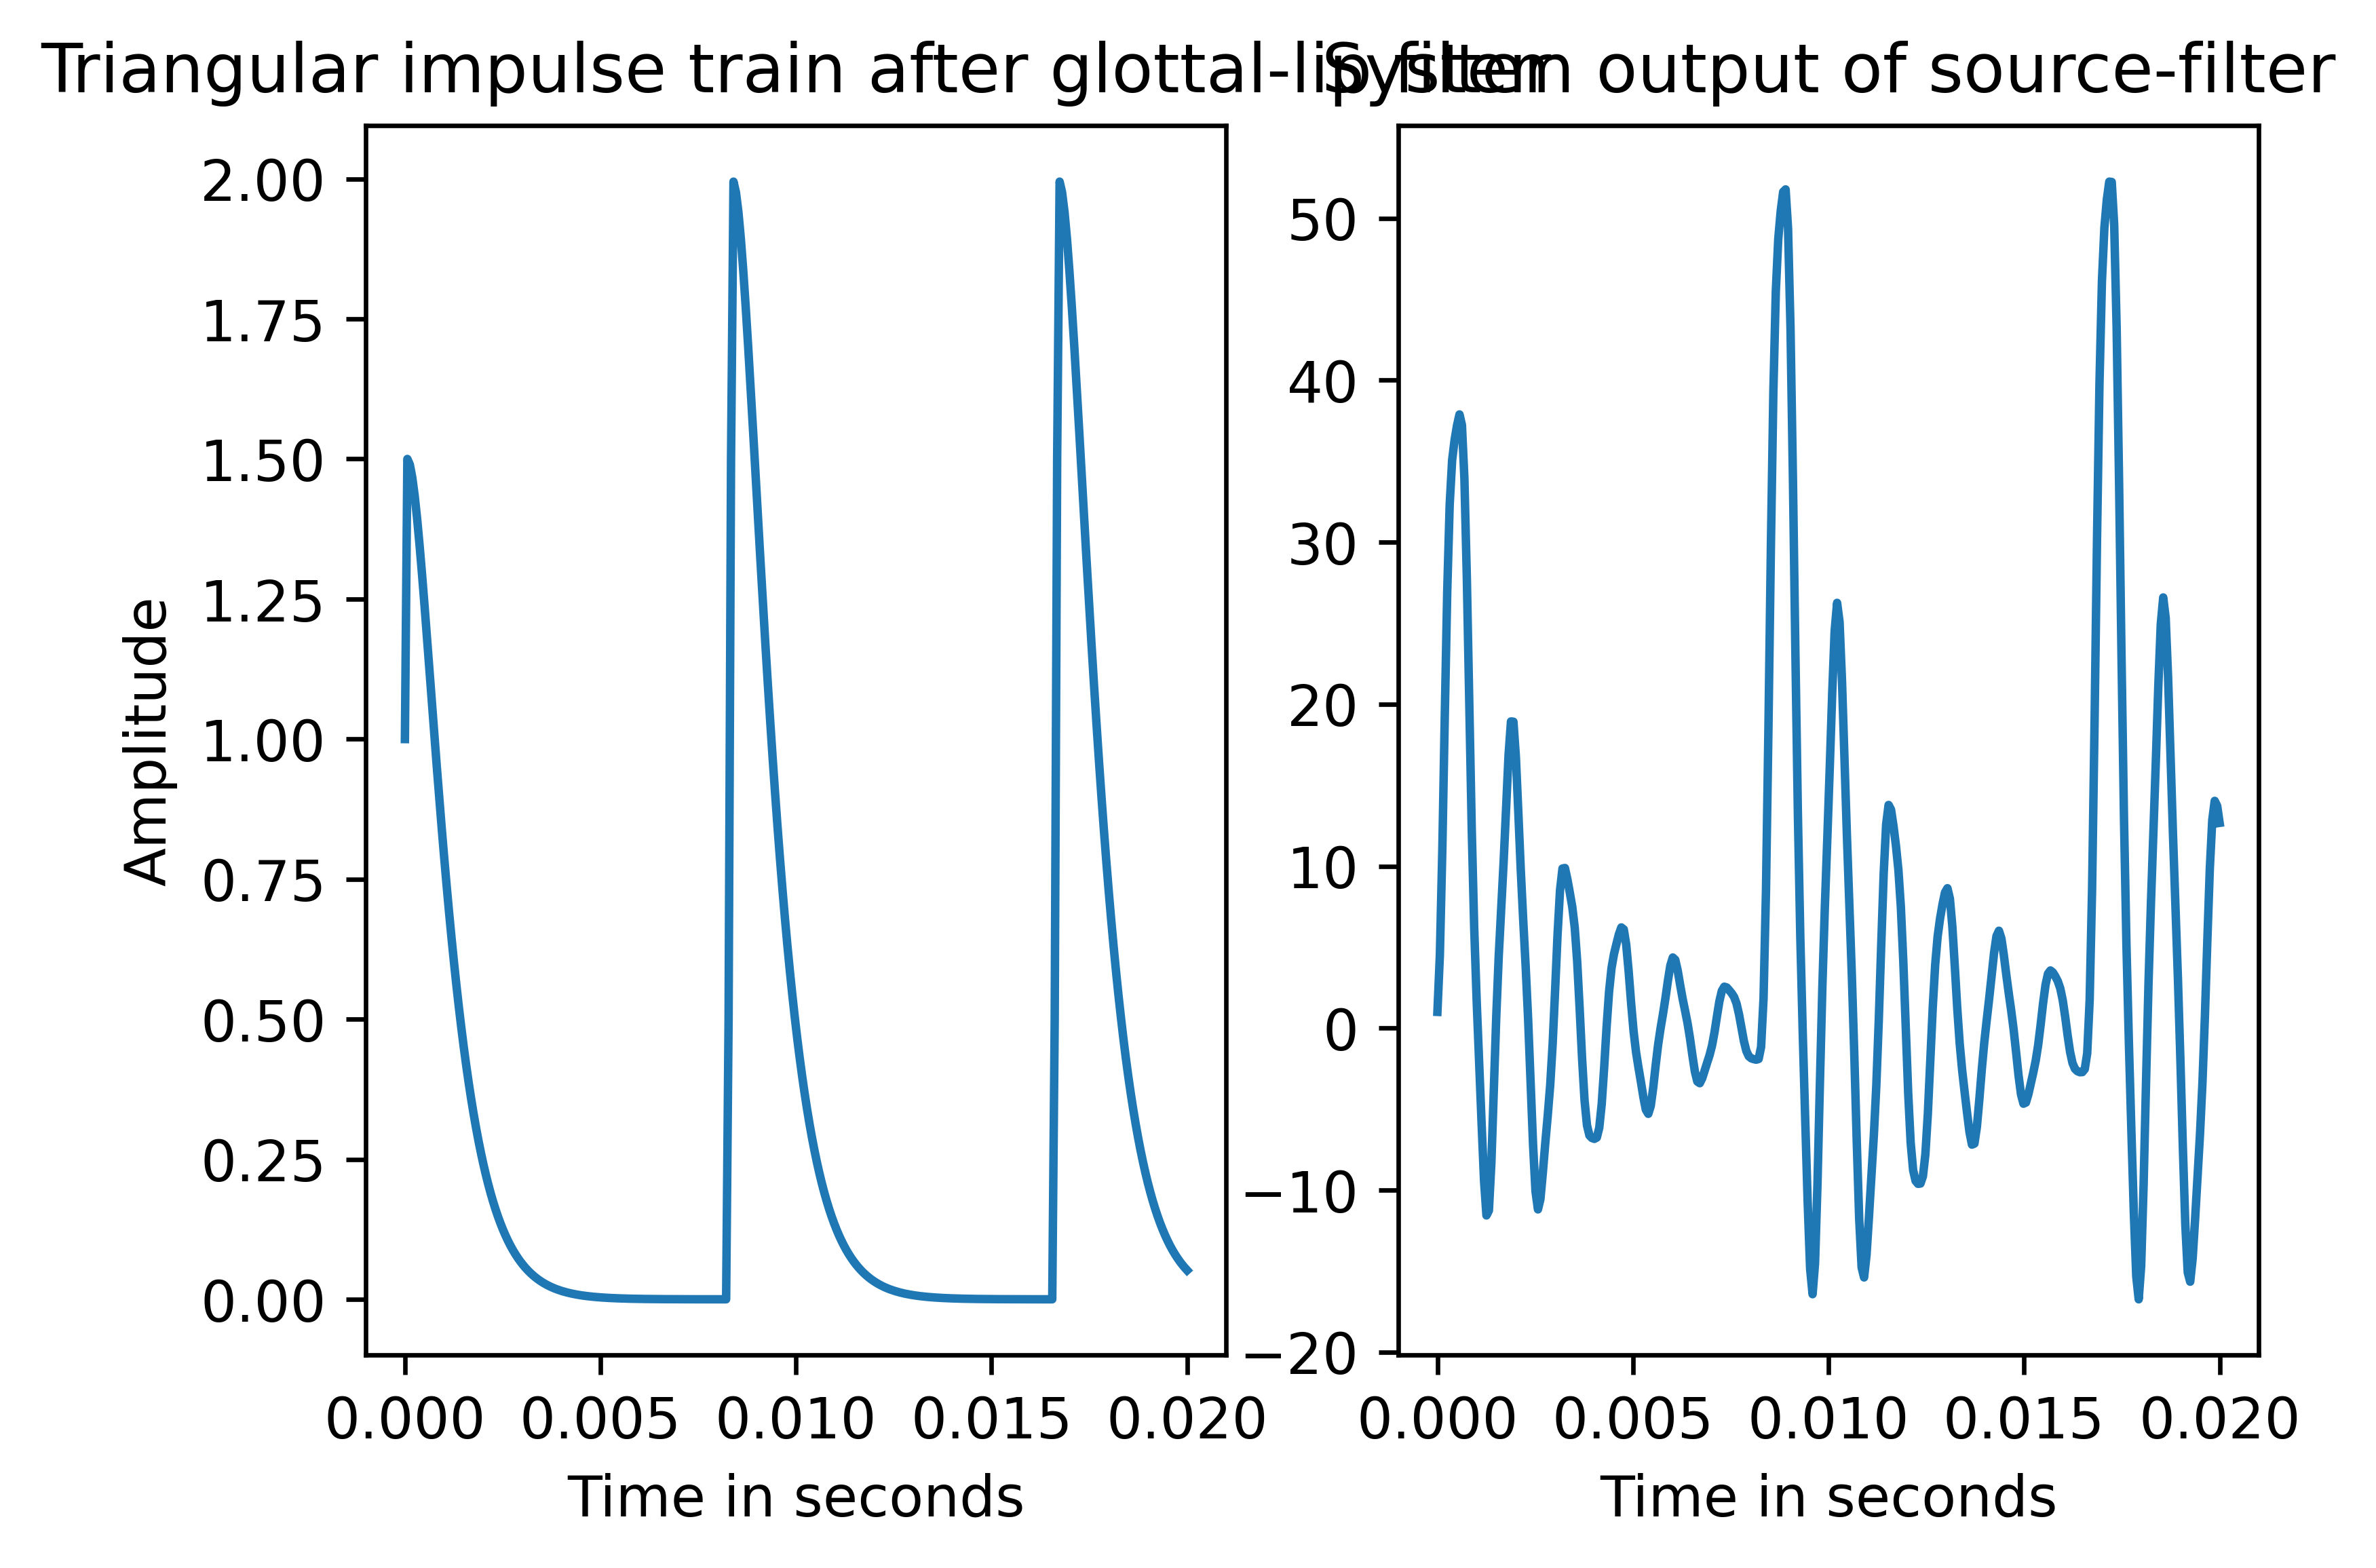

In [178]:
plt.subplot(1, 2, 1)
plt.plot(timeSpace, yI)
plt.xlabel("Time in seconds")
plt.ylabel("Amplitude")
plt.title("Triangular impulse train after glottal-lip filter")
plt.subplot(1, 2, 2)
plt.plot(timeSpace, y3)
plt.xlabel("Time in seconds")
plt.title("System output of source-filter")

In [179]:
F0 = 120
dur = 0.5
timeSpace = np.linspace(0, dur, int(dur*fs))
P = fs//F0
samp = len(timeSpace)
width = 2#no of samples on either side of the peak for the triangular input
y1 = computeResponse(triagInput(P, samp, width = width), samp, r1, theta1)
y2 = computeResponse(y1, samp, r2, theta2)
y3 = computeResponse(y1, samp, r3, theta3)#computing the output
scaled = np.int16(y3/np.max(np.abs(y3)) * 32767)#scaling the output to 16bit integers for writing to wav file
write('qn4_a_120Hz_with_glottallip.wav', fs, scaled)

Please listen to qn4_a_120Hz_with_glottallip.wav

Adding jitter to the sound

In [ ]:
freqDelta = np.random.rand(samp)